# Input
<br>
⊙ skeletal code: https://github.com/vitaldb/maic2020
<br>
⊙ 순서<br>
  † 1.1~1.2는 각각 pacu와 preop의 데이터 전처리 및 input을 만드는 과정 <br>
  † 1.3은 x_train, y_train, x_test, y_test를 불러오고 각 모델에 맞는 input 형성
  † 2부터 1D-CNN model<br>

## PACU 데이터

### 전처리 정보 저장 형태

In [132]:
import pickle

df_preprocess = pickle.load(open('../Preprocessing/cache/df_preprocess2','rb')).reset_index()
#df_preprocess.drop(['index'])
df_preprocess

index                     caseids  NRS  \
0         0   PACU1_2_190503_132609.csv  3.0   
1         1   PACU1_5_190723_131001.csv  8.0   
2         2  PACU1_12_200604_165543.csv  3.0   
3         3  PACU1_12_200528_152944.csv  6.0   
4         4  PACU1_12_201008_143103.csv  3.0   
...     ...                         ...  ...   
8289   8313   PACU1_1_200320_182139.csv  7.0   
8290   8314   PACU1_3_190723_083248.csv  6.0   
8291   8315   PACU1_3_200103_003134.csv  3.0   
8292   8316   PACU1_4_200317_113143.csv  7.0   
8293   8317   PACU1_7_200311_091556.csv  5.0   

                                file_path  \
0       3.0,249,PACU1_2_190503_132609.csv   
1      8.0,1444,PACU1_5_190723_131001.csv   
2     3.0,5650,PACU1_12_200604_165543.csv   
3     6.0,5450,PACU1_12_200528_152944.csv   
4     3.0,7909,PACU1_12_201008_143103.csv   
...                                   ...   
8289   7.0,4717,PACU1_1_200320_182139.csv   
8290   6.0,1424,PACU1_3_190723_083248.csv   
8291   3.0,2732,PACU1_3_200103_003134.csv   
8292   7.0,4548,PACU1_4_200317_113143.csv   
8293   5.0,4423,PACU1_7_200311_091556.csv   

                                                         1  \
0                 (False, [0.688, 0.688, 0.688], [-1, -1])   
1      (False, [0.0, 0.0, 0.0], [0.0, 0.8888888888888888])   
2                      (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3                      (True, [0.0, 0.0, 0.0], [0.3, 0.3])   
4                      (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                    ...   
8289                  (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
8290  (True, [0.0, 0.0, 0.0], [0.058823529411764705, 0.0])   
8291   (True, [0.0, 0.0, 0.0], [0.09090909090909091, 0.0])   
8292   (True, [0.0, 0.0, 0.0], [0.0, 0.07692307692307693])   
8293   (True, [0.0, 0.0, 0.0], [0.0, 0.14285714285714285])   

                                                                        2  \
0                                      (False, [1.0, 1.0, 1.0], [-1, -1])   
1                                    (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
2                                     (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3                     (False, [0.0, 0.0, 0.0], [0.5, 0.2727272727272727])   
4                                     (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                                   ...   
8289                                 (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
8290                                  (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8291                                  (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8292                   (True, [0.0, 0.0, 0.0], [0.0, 0.3076923076923077])   
8293  (True, [0.0, 0.0, 0.0], [0.23076923076923078, 0.07142857142857142])   

                                                                       3  \
0                                  (False, [0.95, 0.95, 0.95], [-1, -1])   
1                 (False, [0.0, 0.0, 0.0], [0.23076923076923078, 0.875])   
2                                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
3                     (True, [0.0, 0.0, 0.0], [0.3333333333333333, 0.0])   
4                                    (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
...                                                                  ...   
8289                                (False, [0.0, 0.0, 0.0], [0.0, 1.0])   
8290                                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8291                                 (True, [0.0, 0.0, 0.0], [0.0, 0.0])   
8292                  (True, [0.0, 0.0, 0.0], [0.0, 0.4166666666666667])   
8293  (True, [0.0, 0.0, 0.0], [0.4166666666666667, 0.06666666666666667])   

                                                                        4  \
0                                   (False, [0.45, 0.45, 0.45], [-1, -1])   
1                                 (False, [0.0, 0.0, 0.0], [0.25, 0.875])   
2                      (True, [0.0, 0.0, 0.0], [0.0, 0.1111111111111111]) 

### Train set, Test set 나누기

In [31]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
from sklearn.utils import shuffle


MINUTES_AHEAD = 5
SRATE = 100 # 100Hz
LEN_INPUT = 10 # input 길이는 10초

# 2초 moving average
def moving_average(a, n=200):
    ret = np.nancumsum(a, dtype=np.float32)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


# training set 로딩
if os.path.exists('x_train.npz'):
    print('loading train...', flush=True, end='')
    x_train = np.load('x_train.npz', allow_pickle=True)['arr_0']
    y_train = np.load('y_train.npz')['arr_0']
    x_test = np.load('x_test.npz', allow_pickle=True)['arr_0']
    y_test = np.load('y_test.npz')['arr_0']
    print('done', flush=True)
    
else:
    # 정의
    x_train, y_train = [], []
    x_test, y_test = [], []
    file_name_test = []
    
    
    # data의 전처리 통과 정보loading
    df_preprocess = pickle.load(open('../Preprocessing/cache/df_preprocess2', 'rb')).reset_index()
    vital_path = '../Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'
    
    
    ### case 별로 train, test set 나누기 ###
    # 환자별로 case를 나누기 위한 train, test mask
    caseids = np.unique(df_preprocess['caseids'])
    test_mask = shuffle(caseids, n_samples = int(len(caseids) * 0.1))
    train_mask = np.setdiff1d(caseids, test_mask)

    # 전처리 정보를 저장한 dataframe에서의 idx
    test_samp_idx = []
    for element in test_mask:
        test_samp_idx.extend(np.where(df_preprocess['file_path'].str.contains(element))[0])   
    train_samp_idx = np.setdiff1d(range(len(df_preprocess)), test_samp_idx)

    # df의 모든 행을 돌며 train set, test set 구성
    for row in range(len(df_preprocess)):
        print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')
        
        # vital data loading
        df_vital = pickle.load(open(vital_path+'/'+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
        
        # 한 NRS에 대해 23개의 input 확인
        for i in range(23):
            # input이 전처리 통과한 경우
            if df_preprocess.loc[row, str(i+1)][0]:
                start_idx = i*5*SRATE # 500i
                end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000
                
                # 해당 input의 vital data
                df_vital_input = df_vital.loc[start_idx:end_idx-1]
                
                # input 길이를 똑같에 맞춰주기 위한 작업
                pleth_inp, ecg_inp = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
                
                # input의 normalization
                pleth_inp[0:df_vital_input['Pleth'].size] = df_vital_input['Pleth'].tolist()
                pleth_inp -= np.nanmean(pleth_inp)
                
                ecg_inp[0:df_vital_input['ECG'].size] = (df_vital_input['ECG'].tolist())
                ecg_inp = (ecg_inp - np.nanmean(ecg_inp)) / np.nanstd(ecg_inp)
                
                if row in train_samp_idx:
                    x_train.append([pleth_inp, ecg_inp])
                    y_train.append(int(df_preprocess.loc[row,'file_path'][0]))
                elif row in test_samp_idx:
                    file_name_test.append(df_preprocess.loc[row,'file_path'])
                    x_test.append([pleth_inp, ecg_inp])
                    y_test.append(int(df_preprocess.loc[row,'file_path'][0]))
                    
        print('completed')
    
    x_train = np.array(x_train, np.float32)
    x_test = np.array(x_test, np.float32)
    y_train = np.array(y_train, int)
    y_test = np.array(y_test, int)
    
    print('saving...', end='', flush=True)
    np.savez_compressed('x_train.npz', x_train)
    np.savez_compressed('x_test.npz', x_test)
    np.savez_compressed('y_train.npz', y_train)
    np.savez_compressed('y_test.npz', y_test)
    print('done', flush=True)

    
# train set, test set를 구분하는 caseid 목록
caseid_test = np.unique(np.array(pd.Series(np.unique(file_name_test)).str.split(',').tolist())[:,2])
pickle.dump(caseid_test, open('../caseid_test', 'wb'))

    
print('size of training set:', len(x_train))
print('size of test set:', len(x_test))

loading data 1/8294 ...completed
loading data 2/8294 ...completed
loading data 3/8294 ...completed
loading data 4/8294 ...completed
loading data 5/8294 ...completed
loading data 6/8294 ...completed
loading data 7/8294 ...completed
loading data 8/8294 ...completed
loading data 9/8294 ...completed
loading data 10/8294 ...completed
loading data 11/8294 ...completed
loading data 12/8294 ...completed
loading data 13/8294 ...completed
loading data 14/8294 ...completed
loading data 15/8294 ...completed
loading data 16/8294 ...completed
loading data 17/8294 ...completed
loading data 18/8294 ...completed
loading data 19/8294 ...completed
loading data 20/8294 ...completed
loading data 21/8294 ...completed
loading data 22/8294 ...completed
loading data 23/8294 ...completed
loading data 24/8294 ...completed
loading data 25/8294 ...completed
loading data 26/8294 ...completed
loading data 27/8294 ...completed
loading data 28/8294 ...completed
loading data 29/8294 ...completed
loading data 30/8294 ..

loading data 240/8294 ...completed
loading data 241/8294 ...completed
loading data 242/8294 ...completed
loading data 243/8294 ...completed
loading data 244/8294 ...completed
loading data 245/8294 ...completed
loading data 246/8294 ...completed
loading data 247/8294 ...completed
loading data 248/8294 ...completed
loading data 249/8294 ...completed
loading data 250/8294 ...completed
loading data 251/8294 ...completed
loading data 252/8294 ...completed
loading data 253/8294 ...completed
loading data 254/8294 ...completed
loading data 255/8294 ...completed
loading data 256/8294 ...completed
loading data 257/8294 ...completed
loading data 258/8294 ...completed
loading data 259/8294 ...completed
loading data 260/8294 ...completed
loading data 261/8294 ...completed
loading data 262/8294 ...completed
loading data 263/8294 ...completed
loading data 264/8294 ...completed
loading data 265/8294 ...completed
loading data 266/8294 ...completed
loading data 267/8294 ...completed
loading data 268/829

loading data 478/8294 ...completed
loading data 479/8294 ...completed
loading data 480/8294 ...completed
loading data 481/8294 ...completed
loading data 482/8294 ...completed
loading data 483/8294 ...completed
loading data 484/8294 ...completed
loading data 485/8294 ...completed
loading data 486/8294 ...completed
loading data 487/8294 ...completed
loading data 488/8294 ...completed
loading data 489/8294 ...completed
loading data 490/8294 ...completed
loading data 491/8294 ...completed
loading data 492/8294 ...completed
loading data 493/8294 ...completed
loading data 494/8294 ...completed
loading data 495/8294 ...completed
loading data 496/8294 ...completed
loading data 497/8294 ...completed
loading data 498/8294 ...completed
loading data 499/8294 ...completed
loading data 500/8294 ...completed
loading data 501/8294 ...completed
loading data 502/8294 ...completed
loading data 503/8294 ...completed
loading data 504/8294 ...completed
loading data 505/8294 ...completed
loading data 506/829

loading data 715/8294 ...completed
loading data 716/8294 ...completed
loading data 717/8294 ...completed
loading data 718/8294 ...completed
loading data 719/8294 ...completed
loading data 720/8294 ...completed
loading data 721/8294 ...completed
loading data 722/8294 ...completed
loading data 723/8294 ...completed
loading data 724/8294 ...completed
loading data 725/8294 ...completed
loading data 726/8294 ...completed
loading data 727/8294 ...completed
loading data 728/8294 ...completed
loading data 729/8294 ...completed
loading data 730/8294 ...completed
loading data 731/8294 ...completed
loading data 732/8294 ...completed
loading data 733/8294 ...completed
loading data 734/8294 ...completed
loading data 735/8294 ...completed
loading data 736/8294 ...completed
loading data 737/8294 ...completed
loading data 738/8294 ...completed
loading data 739/8294 ...completed
loading data 740/8294 ...completed
loading data 741/8294 ...completed
loading data 742/8294 ...completed
loading data 743/829

loading data 951/8294 ...completed
loading data 952/8294 ...completed
loading data 953/8294 ...completed
loading data 954/8294 ...completed
loading data 955/8294 ...completed
loading data 956/8294 ...completed
loading data 957/8294 ...completed
loading data 958/8294 ...completed
loading data 959/8294 ...completed
loading data 960/8294 ...completed
loading data 961/8294 ...completed
loading data 962/8294 ...completed
loading data 963/8294 ...completed
loading data 964/8294 ...completed
loading data 965/8294 ...completed
loading data 966/8294 ...completed
loading data 967/8294 ...completed
loading data 968/8294 ...completed
loading data 969/8294 ...completed
loading data 970/8294 ...completed
loading data 971/8294 ...completed
loading data 972/8294 ...completed
loading data 973/8294 ...completed
loading data 974/8294 ...completed
loading data 975/8294 ...completed
loading data 976/8294 ...completed
loading data 977/8294 ...completed
loading data 978/8294 ...completed
loading data 979/829

loading data 1182/8294 ...completed
loading data 1183/8294 ...completed
loading data 1184/8294 ...completed
loading data 1185/8294 ...completed
loading data 1186/8294 ...completed
loading data 1187/8294 ...completed
loading data 1188/8294 ...completed
loading data 1189/8294 ...completed
loading data 1190/8294 ...completed
loading data 1191/8294 ...completed
loading data 1192/8294 ...completed
loading data 1193/8294 ...completed
loading data 1194/8294 ...completed
loading data 1195/8294 ...completed
loading data 1196/8294 ...completed
loading data 1197/8294 ...completed
loading data 1198/8294 ...completed
loading data 1199/8294 ...completed
loading data 1200/8294 ...completed
loading data 1201/8294 ...completed
loading data 1202/8294 ...completed
loading data 1203/8294 ...completed
loading data 1204/8294 ...completed
loading data 1205/8294 ...completed
loading data 1206/8294 ...completed
loading data 1207/8294 ...completed
loading data 1208/8294 ...completed
loading data 1209/8294 ...co

loading data 1412/8294 ...completed
loading data 1413/8294 ...completed
loading data 1414/8294 ...completed
loading data 1415/8294 ...completed
loading data 1416/8294 ...completed
loading data 1417/8294 ...completed
loading data 1418/8294 ...completed
loading data 1419/8294 ...completed
loading data 1420/8294 ...completed
loading data 1421/8294 ...completed
loading data 1422/8294 ...completed
loading data 1423/8294 ...completed
loading data 1424/8294 ...completed
loading data 1425/8294 ...completed
loading data 1426/8294 ...completed
loading data 1427/8294 ...completed
loading data 1428/8294 ...completed
loading data 1429/8294 ...completed
loading data 1430/8294 ...completed
loading data 1431/8294 ...completed
loading data 1432/8294 ...completed
loading data 1433/8294 ...completed
loading data 1434/8294 ...completed
loading data 1435/8294 ...completed
loading data 1436/8294 ...completed
loading data 1437/8294 ...completed
loading data 1438/8294 ...completed
loading data 1439/8294 ...co

loading data 1645/8294 ...completed
loading data 1646/8294 ...completed
loading data 1647/8294 ...completed
loading data 1648/8294 ...completed
loading data 1649/8294 ...completed
loading data 1650/8294 ...completed
loading data 1651/8294 ...completed
loading data 1652/8294 ...completed
loading data 1653/8294 ...completed
loading data 1654/8294 ...completed
loading data 1655/8294 ...completed
loading data 1656/8294 ...completed
loading data 1657/8294 ...completed
loading data 1658/8294 ...completed
loading data 1659/8294 ...completed
loading data 1660/8294 ...completed
loading data 1661/8294 ...completed
loading data 1662/8294 ...completed
loading data 1663/8294 ...completed
loading data 1664/8294 ...completed
loading data 1665/8294 ...completed
loading data 1666/8294 ...completed
loading data 1667/8294 ...completed
loading data 1668/8294 ...completed
loading data 1669/8294 ...completed
loading data 1670/8294 ...completed
loading data 1671/8294 ...completed
loading data 1672/8294 ...co

loading data 1876/8294 ...completed
loading data 1877/8294 ...completed
loading data 1878/8294 ...completed
loading data 1879/8294 ...completed
loading data 1880/8294 ...completed
loading data 1881/8294 ...completed
loading data 1882/8294 ...completed
loading data 1883/8294 ...completed
loading data 1884/8294 ...completed
loading data 1885/8294 ...completed
loading data 1886/8294 ...completed
loading data 1887/8294 ...completed
loading data 1888/8294 ...completed
loading data 1889/8294 ...completed
loading data 1890/8294 ...completed
loading data 1891/8294 ...completed
loading data 1892/8294 ...completed
loading data 1893/8294 ...completed
loading data 1894/8294 ...completed
loading data 1895/8294 ...completed
loading data 1896/8294 ...completed
loading data 1897/8294 ...completed
loading data 1898/8294 ...completed
loading data 1899/8294 ...completed
loading data 1900/8294 ...completed
loading data 1901/8294 ...completed
loading data 1902/8294 ...completed
loading data 1903/8294 ...co

loading data 2334/8294 ...completed
loading data 2335/8294 ...completed
loading data 2336/8294 ...completed
loading data 2337/8294 ...completed
loading data 2338/8294 ...completed
loading data 2339/8294 ...completed
loading data 2340/8294 ...completed
loading data 2341/8294 ...completed
loading data 2342/8294 ...completed
loading data 2343/8294 ...completed
loading data 2344/8294 ...completed
loading data 2345/8294 ...completed
loading data 2346/8294 ...completed
loading data 2347/8294 ...completed
loading data 2348/8294 ...completed
loading data 2349/8294 ...completed
loading data 2350/8294 ...completed
loading data 2351/8294 ...completed
loading data 2352/8294 ...completed
loading data 2353/8294 ...completed
loading data 2354/8294 ...completed
loading data 2355/8294 ...completed
loading data 2356/8294 ...completed
loading data 2357/8294 ...completed
loading data 2358/8294 ...completed
loading data 2359/8294 ...completed
loading data 2360/8294 ...completed
loading data 2361/8294 ...co

loading data 2569/8294 ...completed
loading data 2570/8294 ...completed
loading data 2571/8294 ...completed
loading data 2572/8294 ...completed
loading data 2573/8294 ...completed
loading data 2574/8294 ...completed
loading data 2575/8294 ...completed
loading data 2576/8294 ...completed
loading data 2577/8294 ...completed
loading data 2578/8294 ...completed
loading data 2579/8294 ...completed
loading data 2580/8294 ...completed
loading data 2581/8294 ...completed
loading data 2582/8294 ...completed
loading data 2583/8294 ...completed
loading data 2584/8294 ...completed
loading data 2585/8294 ...completed
loading data 2586/8294 ...completed
loading data 2587/8294 ...completed
loading data 2588/8294 ...completed
loading data 2589/8294 ...completed
loading data 2590/8294 ...completed
loading data 2591/8294 ...completed
loading data 2592/8294 ...completed
loading data 2593/8294 ...completed
loading data 2594/8294 ...completed
loading data 2595/8294 ...completed
loading data 2596/8294 ...co

loading data 2797/8294 ...completed
loading data 2798/8294 ...completed
loading data 2799/8294 ...completed
loading data 2800/8294 ...completed
loading data 2801/8294 ...completed
loading data 2802/8294 ...completed
loading data 2803/8294 ...completed
loading data 2804/8294 ...completed
loading data 2805/8294 ...completed
loading data 2806/8294 ...completed
loading data 2807/8294 ...completed
loading data 2808/8294 ...completed
loading data 2809/8294 ...completed
loading data 2810/8294 ...completed
loading data 2811/8294 ...completed
loading data 2812/8294 ...completed
loading data 2813/8294 ...completed
loading data 2814/8294 ...completed
loading data 2815/8294 ...completed
loading data 2816/8294 ...completed
loading data 2817/8294 ...completed
loading data 2818/8294 ...completed
loading data 2819/8294 ...completed
loading data 2820/8294 ...completed
loading data 2821/8294 ...completed
loading data 2822/8294 ...completed
loading data 2823/8294 ...completed
loading data 2824/8294 ...co

loading data 3257/8294 ...completed
loading data 3258/8294 ...completed
loading data 3259/8294 ...completed
loading data 3260/8294 ...completed
loading data 3261/8294 ...completed
loading data 3262/8294 ...completed
loading data 3263/8294 ...completed
loading data 3264/8294 ...completed
loading data 3265/8294 ...completed
loading data 3266/8294 ...completed
loading data 3267/8294 ...completed
loading data 3268/8294 ...completed
loading data 3269/8294 ...completed
loading data 3270/8294 ...completed
loading data 3271/8294 ...completed
loading data 3272/8294 ...completed
loading data 3273/8294 ...completed
loading data 3274/8294 ...completed
loading data 3275/8294 ...completed
loading data 3276/8294 ...completed
loading data 3277/8294 ...completed
loading data 3278/8294 ...completed
loading data 3279/8294 ...completed
loading data 3280/8294 ...completed
loading data 3281/8294 ...completed
loading data 3282/8294 ...completed
loading data 3283/8294 ...completed
loading data 3284/8294 ...co

loading data 3487/8294 ...completed
loading data 3488/8294 ...completed
loading data 3489/8294 ...completed
loading data 3490/8294 ...completed
loading data 3491/8294 ...completed
loading data 3492/8294 ...completed
loading data 3493/8294 ...completed
loading data 3494/8294 ...completed
loading data 3495/8294 ...completed
loading data 3496/8294 ...completed
loading data 3497/8294 ...completed
loading data 3498/8294 ...completed
loading data 3499/8294 ...completed
loading data 3500/8294 ...completed
loading data 3501/8294 ...completed
loading data 3502/8294 ...completed
loading data 3503/8294 ...completed
loading data 3504/8294 ...completed
loading data 3505/8294 ...completed
loading data 3506/8294 ...completed
loading data 3507/8294 ...completed
loading data 3508/8294 ...completed
loading data 3509/8294 ...completed
loading data 3510/8294 ...completed
loading data 3511/8294 ...completed
loading data 3512/8294 ...completed
loading data 3513/8294 ...completed
loading data 3514/8294 ...co

loading data 3719/8294 ...completed
loading data 3720/8294 ...completed
loading data 3721/8294 ...completed
loading data 3722/8294 ...completed
loading data 3723/8294 ...completed
loading data 3724/8294 ...completed
loading data 3725/8294 ...completed
loading data 3726/8294 ...completed
loading data 3727/8294 ...completed
loading data 3728/8294 ...completed
loading data 3729/8294 ...completed
loading data 3730/8294 ...completed
loading data 3731/8294 ...completed
loading data 3732/8294 ...completed
loading data 3733/8294 ...completed
loading data 3734/8294 ...completed
loading data 3735/8294 ...completed
loading data 3736/8294 ...completed
loading data 3737/8294 ...completed
loading data 3738/8294 ...completed
loading data 3739/8294 ...completed
loading data 3740/8294 ...completed
loading data 3741/8294 ...completed
loading data 3742/8294 ...completed
loading data 3743/8294 ...completed
loading data 3744/8294 ...completed
loading data 3745/8294 ...completed
loading data 3746/8294 ...co

loading data 3947/8294 ...completed
loading data 3948/8294 ...completed
loading data 3949/8294 ...completed
loading data 3950/8294 ...completed
loading data 3951/8294 ...completed
loading data 3952/8294 ...completed
loading data 3953/8294 ...completed
loading data 3954/8294 ...completed
loading data 3955/8294 ...completed
loading data 3956/8294 ...completed
loading data 3957/8294 ...completed
loading data 3958/8294 ...completed
loading data 3959/8294 ...completed
loading data 3960/8294 ...completed
loading data 3961/8294 ...completed
loading data 3962/8294 ...completed
loading data 3963/8294 ...completed
loading data 3964/8294 ...completed
loading data 3965/8294 ...completed
loading data 3966/8294 ...completed
loading data 3967/8294 ...completed
loading data 3968/8294 ...completed
loading data 3969/8294 ...completed
loading data 3970/8294 ...completed
loading data 3971/8294 ...completed
loading data 3972/8294 ...completed
loading data 3973/8294 ...completed
loading data 3974/8294 ...co

loading data 4176/8294 ...completed
loading data 4177/8294 ...completed
loading data 4178/8294 ...completed
loading data 4179/8294 ...completed
loading data 4180/8294 ...completed
loading data 4181/8294 ...completed
loading data 4182/8294 ...completed
loading data 4183/8294 ...completed
loading data 4184/8294 ...completed
loading data 4185/8294 ...completed
loading data 4186/8294 ...completed
loading data 4187/8294 ...completed
loading data 4188/8294 ...completed
loading data 4189/8294 ...completed
loading data 4190/8294 ...completed
loading data 4191/8294 ...completed
loading data 4192/8294 ...completed
loading data 4193/8294 ...completed
loading data 4194/8294 ...completed
loading data 4195/8294 ...completed
loading data 4196/8294 ...completed
loading data 4197/8294 ...completed
loading data 4198/8294 ...completed
loading data 4199/8294 ...completed
loading data 4200/8294 ...completed
loading data 4201/8294 ...completed
loading data 4202/8294 ...completed
loading data 4203/8294 ...co

loading data 4633/8294 ...completed
loading data 4634/8294 ...completed
loading data 4635/8294 ...completed
loading data 4636/8294 ...completed
loading data 4637/8294 ...completed
loading data 4638/8294 ...completed
loading data 4639/8294 ...completed
loading data 4640/8294 ...completed
loading data 4641/8294 ...completed
loading data 4642/8294 ...completed
loading data 4643/8294 ...completed
loading data 4644/8294 ...completed
loading data 4645/8294 ...completed
loading data 4646/8294 ...completed
loading data 4647/8294 ...completed
loading data 4648/8294 ...completed
loading data 4649/8294 ...completed
loading data 4650/8294 ...completed
loading data 4651/8294 ...completed
loading data 4652/8294 ...completed
loading data 4653/8294 ...completed
loading data 4654/8294 ...completed
loading data 4655/8294 ...completed
loading data 4656/8294 ...completed
loading data 4657/8294 ...completed
loading data 4658/8294 ...completed
loading data 4659/8294 ...completed
loading data 4660/8294 ...co

loading data 5087/8294 ...completed
loading data 5088/8294 ...completed
loading data 5089/8294 ...completed
loading data 5090/8294 ...completed
loading data 5091/8294 ...completed
loading data 5092/8294 ...completed
loading data 5093/8294 ...completed
loading data 5094/8294 ...completed
loading data 5095/8294 ...completed
loading data 5096/8294 ...completed
loading data 5097/8294 ...completed
loading data 5098/8294 ...completed
loading data 5099/8294 ...completed
loading data 5100/8294 ...completed
loading data 5101/8294 ...completed
loading data 5102/8294 ...completed
loading data 5103/8294 ...completed
loading data 5104/8294 ...completed
loading data 5105/8294 ...completed
loading data 5106/8294 ...completed
loading data 5107/8294 ...completed
loading data 5108/8294 ...completed
loading data 5109/8294 ...completed
loading data 5110/8294 ...completed
loading data 5111/8294 ...completed
loading data 5112/8294 ...completed
loading data 5113/8294 ...completed
loading data 5114/8294 ...co

loading data 5316/8294 ...completed
loading data 5317/8294 ...completed
loading data 5318/8294 ...completed
loading data 5319/8294 ...completed
loading data 5320/8294 ...completed
loading data 5321/8294 ...completed
loading data 5322/8294 ...completed
loading data 5323/8294 ...completed
loading data 5324/8294 ...completed
loading data 5325/8294 ...completed
loading data 5326/8294 ...completed
loading data 5327/8294 ...completed
loading data 5328/8294 ...completed
loading data 5329/8294 ...completed
loading data 5330/8294 ...completed
loading data 5331/8294 ...completed
loading data 5332/8294 ...completed
loading data 5333/8294 ...completed
loading data 5334/8294 ...completed
loading data 5335/8294 ...completed
loading data 5336/8294 ...completed
loading data 5337/8294 ...completed
loading data 5338/8294 ...completed
loading data 5339/8294 ...completed
loading data 5340/8294 ...completed
loading data 5341/8294 ...completed
loading data 5342/8294 ...completed
loading data 5343/8294 ...co

loading data 5549/8294 ...completed
loading data 5550/8294 ...completed
loading data 5551/8294 ...completed
loading data 5552/8294 ...completed
loading data 5553/8294 ...completed
loading data 5554/8294 ...completed
loading data 5555/8294 ...completed
loading data 5556/8294 ...completed
loading data 5557/8294 ...completed
loading data 5558/8294 ...completed
loading data 5559/8294 ...completed
loading data 5560/8294 ...completed
loading data 5561/8294 ...completed
loading data 5562/8294 ...completed
loading data 5563/8294 ...completed
loading data 5564/8294 ...completed
loading data 5565/8294 ...completed
loading data 5566/8294 ...completed
loading data 5567/8294 ...completed
loading data 5568/8294 ...completed
loading data 5569/8294 ...completed
loading data 5570/8294 ...completed
loading data 5571/8294 ...completed
loading data 5572/8294 ...completed
loading data 5573/8294 ...completed
loading data 5574/8294 ...completed
loading data 5575/8294 ...completed
loading data 5576/8294 ...co

loading data 5777/8294 ...completed
loading data 5778/8294 ...completed
loading data 5779/8294 ...completed
loading data 5780/8294 ...completed
loading data 5781/8294 ...completed
loading data 5782/8294 ...completed
loading data 5783/8294 ...completed
loading data 5784/8294 ...completed
loading data 5785/8294 ...completed
loading data 5786/8294 ...completed
loading data 5787/8294 ...completed
loading data 5788/8294 ...completed
loading data 5789/8294 ...completed
loading data 5790/8294 ...completed
loading data 5791/8294 ...completed
loading data 5792/8294 ...completed
loading data 5793/8294 ...completed
loading data 5794/8294 ...completed
loading data 5795/8294 ...completed
loading data 5796/8294 ...completed
loading data 5797/8294 ...completed
loading data 5798/8294 ...completed
loading data 5799/8294 ...completed
loading data 5800/8294 ...completed
loading data 5801/8294 ...completed
loading data 5802/8294 ...completed
loading data 5803/8294 ...completed
loading data 5804/8294 ...co

loading data 6010/8294 ...completed
loading data 6011/8294 ...completed
loading data 6012/8294 ...completed
loading data 6013/8294 ...completed
loading data 6014/8294 ...completed
loading data 6015/8294 ...completed
loading data 6016/8294 ...completed
loading data 6017/8294 ...completed
loading data 6018/8294 ...completed
loading data 6019/8294 ...completed
loading data 6020/8294 ...completed
loading data 6021/8294 ...completed
loading data 6022/8294 ...completed
loading data 6023/8294 ...completed
loading data 6024/8294 ...completed
loading data 6025/8294 ...completed
loading data 6026/8294 ...completed
loading data 6027/8294 ...completed
loading data 6028/8294 ...completed
loading data 6029/8294 ...completed
loading data 6030/8294 ...completed
loading data 6031/8294 ...completed
loading data 6032/8294 ...completed
loading data 6033/8294 ...completed
loading data 6034/8294 ...completed
loading data 6035/8294 ...completed
loading data 6036/8294 ...completed
loading data 6037/8294 ...co

loading data 6239/8294 ...completed
loading data 6240/8294 ...completed
loading data 6241/8294 ...completed
loading data 6242/8294 ...completed
loading data 6243/8294 ...completed
loading data 6244/8294 ...completed
loading data 6245/8294 ...completed
loading data 6246/8294 ...completed
loading data 6247/8294 ...completed
loading data 6248/8294 ...completed
loading data 6249/8294 ...completed
loading data 6250/8294 ...completed
loading data 6251/8294 ...completed
loading data 6252/8294 ...completed
loading data 6253/8294 ...completed
loading data 6254/8294 ...completed
loading data 6255/8294 ...completed
loading data 6256/8294 ...completed
loading data 6257/8294 ...completed
loading data 6258/8294 ...completed
loading data 6259/8294 ...completed
loading data 6260/8294 ...completed
loading data 6261/8294 ...completed
loading data 6262/8294 ...completed
loading data 6263/8294 ...completed
loading data 6264/8294 ...completed
loading data 6265/8294 ...completed
loading data 6266/8294 ...co

loading data 6471/8294 ...completed
loading data 6472/8294 ...completed
loading data 6473/8294 ...completed
loading data 6474/8294 ...completed
loading data 6475/8294 ...completed
loading data 6476/8294 ...completed
loading data 6477/8294 ...completed
loading data 6478/8294 ...completed
loading data 6479/8294 ...completed
loading data 6480/8294 ...completed
loading data 6481/8294 ...completed
loading data 6482/8294 ...completed
loading data 6483/8294 ...completed
loading data 6484/8294 ...completed
loading data 6485/8294 ...completed
loading data 6486/8294 ...completed
loading data 6487/8294 ...completed
loading data 6488/8294 ...completed
loading data 6489/8294 ...completed
loading data 6490/8294 ...completed
loading data 6491/8294 ...completed
loading data 6492/8294 ...completed
loading data 6493/8294 ...completed
loading data 6494/8294 ...completed
loading data 6495/8294 ...completed
loading data 6496/8294 ...completed
loading data 6497/8294 ...completed
loading data 6498/8294 ...co

loading data 6701/8294 ...completed
loading data 6702/8294 ...completed
loading data 6703/8294 ...completed
loading data 6704/8294 ...completed
loading data 6705/8294 ...completed
loading data 6706/8294 ...completed
loading data 6707/8294 ...completed
loading data 6708/8294 ...completed
loading data 6709/8294 ...completed
loading data 6710/8294 ...completed
loading data 6711/8294 ...completed
loading data 6712/8294 ...completed
loading data 6713/8294 ...completed
loading data 6714/8294 ...completed
loading data 6715/8294 ...completed
loading data 6716/8294 ...completed
loading data 6717/8294 ...completed
loading data 6718/8294 ...completed
loading data 6719/8294 ...completed
loading data 6720/8294 ...completed
loading data 6721/8294 ...completed
loading data 6722/8294 ...completed
loading data 6723/8294 ...completed
loading data 6724/8294 ...completed
loading data 6725/8294 ...completed
loading data 6726/8294 ...completed
loading data 6727/8294 ...completed
loading data 6728/8294 ...co

loading data 6933/8294 ...completed
loading data 6934/8294 ...completed
loading data 6935/8294 ...completed
loading data 6936/8294 ...completed
loading data 6937/8294 ...completed
loading data 6938/8294 ...completed
loading data 6939/8294 ...completed
loading data 6940/8294 ...completed
loading data 6941/8294 ...completed
loading data 6942/8294 ...completed
loading data 6943/8294 ...completed
loading data 6944/8294 ...completed
loading data 6945/8294 ...completed
loading data 6946/8294 ...completed
loading data 6947/8294 ...completed
loading data 6948/8294 ...completed
loading data 6949/8294 ...completed
loading data 6950/8294 ...completed
loading data 6951/8294 ...completed
loading data 6952/8294 ...completed
loading data 6953/8294 ...completed
loading data 6954/8294 ...completed
loading data 6955/8294 ...completed
loading data 6956/8294 ...completed
loading data 6957/8294 ...completed
loading data 6958/8294 ...completed
loading data 6959/8294 ...completed
loading data 6960/8294 ...co

loading data 7162/8294 ...completed
loading data 7163/8294 ...completed
loading data 7164/8294 ...completed
loading data 7165/8294 ...completed
loading data 7166/8294 ...completed
loading data 7167/8294 ...completed
loading data 7168/8294 ...completed
loading data 7169/8294 ...completed
loading data 7170/8294 ...completed
loading data 7171/8294 ...completed
loading data 7172/8294 ...completed
loading data 7173/8294 ...completed
loading data 7174/8294 ...completed
loading data 7175/8294 ...completed
loading data 7176/8294 ...completed
loading data 7177/8294 ...completed
loading data 7178/8294 ...completed
loading data 7179/8294 ...completed
loading data 7180/8294 ...completed
loading data 7181/8294 ...completed
loading data 7182/8294 ...completed
loading data 7183/8294 ...completed
loading data 7184/8294 ...completed
loading data 7185/8294 ...completed
loading data 7186/8294 ...completed
loading data 7187/8294 ...completed
loading data 7188/8294 ...completed
loading data 7189/8294 ...co

loading data 7394/8294 ...completed
loading data 7395/8294 ...completed
loading data 7396/8294 ...completed
loading data 7397/8294 ...completed
loading data 7398/8294 ...completed
loading data 7399/8294 ...completed
loading data 7400/8294 ...completed
loading data 7401/8294 ...completed
loading data 7402/8294 ...completed
loading data 7403/8294 ...completed
loading data 7404/8294 ...completed
loading data 7405/8294 ...completed
loading data 7406/8294 ...completed
loading data 7407/8294 ...completed
loading data 7408/8294 ...completed
loading data 7409/8294 ...completed
loading data 7410/8294 ...completed
loading data 7411/8294 ...completed
loading data 7412/8294 ...completed
loading data 7413/8294 ...completed
loading data 7414/8294 ...completed
loading data 7415/8294 ...completed
loading data 7416/8294 ...completed
loading data 7417/8294 ...completed
loading data 7418/8294 ...completed
loading data 7419/8294 ...completed
loading data 7420/8294 ...completed
loading data 7421/8294 ...co

loading data 7852/8294 ...completed
loading data 7853/8294 ...completed
loading data 7854/8294 ...completed
loading data 7855/8294 ...completed
loading data 7856/8294 ...completed
loading data 7857/8294 ...completed
loading data 7858/8294 ...completed
loading data 7859/8294 ...completed
loading data 7860/8294 ...completed
loading data 7861/8294 ...completed
loading data 7862/8294 ...completed
loading data 7863/8294 ...completed
loading data 7864/8294 ...completed
loading data 7865/8294 ...completed
loading data 7866/8294 ...completed
loading data 7867/8294 ...completed
loading data 7868/8294 ...completed
loading data 7869/8294 ...completed
loading data 7870/8294 ...completed
loading data 7871/8294 ...completed
loading data 7872/8294 ...completed
loading data 7873/8294 ...completed
loading data 7874/8294 ...completed
loading data 7875/8294 ...completed
loading data 7876/8294 ...completed
loading data 7877/8294 ...completed
loading data 7878/8294 ...completed
loading data 7879/8294 ...co

loading data 8080/8294 ...completed
loading data 8081/8294 ...completed
loading data 8082/8294 ...completed
loading data 8083/8294 ...completed
loading data 8084/8294 ...completed
loading data 8085/8294 ...completed
loading data 8086/8294 ...completed
loading data 8087/8294 ...completed
loading data 8088/8294 ...completed
loading data 8089/8294 ...completed
loading data 8090/8294 ...completed
loading data 8091/8294 ...completed
loading data 8092/8294 ...completed
loading data 8093/8294 ...completed
loading data 8094/8294 ...completed
loading data 8095/8294 ...completed
loading data 8096/8294 ...completed
loading data 8097/8294 ...completed
loading data 8098/8294 ...completed
loading data 8099/8294 ...completed
loading data 8100/8294 ...completed
loading data 8101/8294 ...completed
loading data 8102/8294 ...completed
loading data 8103/8294 ...completed
loading data 8104/8294 ...completed
loading data 8105/8294 ...completed
loading data 8106/8294 ...completed
loading data 8107/8294 ...co

#### Train mask 이용한 방법

In [24]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
from sklearn.utils import shuffle


SRATE = 100 # 100Hz
LEN_INPUT = 10 # input 길이는 10초


# training set 로딩
if os.path.exists('x_train.npz'):
    print('loading train...', flush=True, end='')
    x_train = np.load('x_train.npz', allow_pickle=True)['arr_0']
    y_train = np.load('y_train.npz')['arr_0']
    x_test = np.load('x_test.npz', allow_pickle=True)['arr_0']
    y_test = np.load('y_test.npz')['arr_0']
    print('done', flush=True)
    
else:
    # 정의
    x_train, y_train = [], []
    x_test, y_test = [], []
    file_name_test = []
    
    
    # data의 전처리 통과 정보loading
    df_preprocess = pickle.load(open('../Preprocessing/cache/df_preprocess2', 'rb')).reset_index()
    vital_path = '../Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'
    
    
    ### case 별로 train, test set 나누기 ###
    # 환자별로 case를 나누기 위한 train, test mask
    caseids = np.unique(np.array(df_preprocess['file_path'].str.split(',').tolist())[:,2])
    test_caseids = shuffle(caseids, n_samples = int(len(caseids) * 0.1))

    test_mask = np.array([caseid in test_caseids for caseid in df_preprocess['caseids']])
    train_mask = ~test_mask
    
    cnt = 0
    for _, test_row in df_preprocess.loc[test_mask].iterrows():
        cnt+=1
        print('loading test data {}/{} ...'.format(cnt, (np.sum(test_mask))), end='')
        df_vital = pickle.load(open(vital_path+'/'+test_row['file_path'], 'rb')).reset_index()
        
        # 23개의 열에 대해 input을 뽑아냄
        for i in range(23):
            if test_row[str(i+1)][0]:
                start_idx = i*5*SRATE # 500i
                end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000
                
                # vital data loading
                df_vital_input = df_vital.loc[start_idx:end_idx-1]
            
                # input 길이를 똑같에 맞춰주기 위한 작업
                pleth_inp, ecg_inp = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
                
                # input의 normalization
                pleth_inp[0:df_vital_input['Pleth'].size] = df_vital_input['Pleth'].tolist()
                pleth_inp -= np.nanmean(pleth_inp)
                
                ecg_inp[0:df_vital_input['ECG'].size] = (df_vital_input['ECG'].tolist())
                ecg_inp = (ecg_inp - np.nanmean(ecg_inp)) / np.nanstd(ecg_inp)

                file_name_test.append(test_row['file_path'])
                x_test.append([pleth_inp, ecg_inp])
                y_test.append(int(test_row['file_path'][0]))
        print('completed')
            

    cnt = 0
    for _, train_row in df_preprocess.loc[train_mask].iterrows():
        cnt+=1
        print('loading data {}/{} ...'.format(cnt, (np.sum(train_mask))), end='')
        df_vital = pickle.load(open(vital_path+'/'+train_row['file_path'], 'rb')).reset_index()
        
        # 23개의 열에 대해 input을 뽑아냄
        for i in range(23):
            if train_row[str(i+1)][0]:
                start_idx = i*5*SRATE # 500i
                end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000
                
                # vital data loading
                df_vital_input = df_vital.loc[start_idx:end_idx-1]
            
                # input 길이를 똑같에 맞춰주기 위한 작업
                pleth_inp, ecg_inp = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
                
                # input의 normalization
                pleth_inp[0:df_vital_input['Pleth'].size] = df_vital_input['Pleth'].tolist()
                pleth_inp -= np.nanmean(pleth_inp)
                
                ecg_inp[0:df_vital_input['ECG'].size] = (df_vital_input['ECG'].tolist())
                ecg_inp = (ecg_inp - np.nanmean(ecg_inp)) / np.nanstd(ecg_inp)
                

                x_train.append([pleth_inp, ecg_inp])
                y_train.append(int(train_row['file_path'][0]))
  
        print('completed')
    
    x_train = np.array(x_train, np.float32)
    x_test = np.array(x_test, np.float32)
    y_train = np.array(y_train, int)
    y_test = np.array(y_test, int)
'''    
    print('saving...', end='', flush=True)
    np.savez_compressed('x_train.npz', x_train)
    np.savez_compressed('x_test.npz', x_test)
    np.savez_compressed('y_train.npz', y_train)
    np.savez_compressed('y_test.npz', y_test)
    print('done', flush=True)
    
pickle.dump(file_name_test, open('../file_name_test', 'wb'))
'''    
print('size of training set:', len(x_train))
print('size of test set:', len(x_test))

loading test data 1/827 ...completed
loading test data 2/827 ...completed
loading test data 3/827 ...completed
loading test data 4/827 ...completed
loading test data 5/827 ...completed
loading test data 6/827 ...completed
loading test data 7/827 ...completed
loading test data 8/827 ...completed
loading test data 9/827 ...completed
loading test data 10/827 ...completed
loading test data 11/827 ...completed
loading test data 12/827 ...completed
loading test data 13/827 ...completed
loading test data 14/827 ...completed
loading test data 15/827 ...completed
loading test data 16/827 ...completed
loading test data 17/827 ...completed
loading test data 18/827 ...completed
loading test data 19/827 ...completed
loading test data 20/827 ...completed
loading test data 21/827 ...completed
loading test data 22/827 ...completed
loading test data 23/827 ...completed
loading test data 24/827 ...completed
loading test data 25/827 ...completed
loading test data 26/827 ...completed
loading test data 27/

loading test data 215/827 ...completed
loading test data 216/827 ...completed
loading test data 217/827 ...completed
loading test data 218/827 ...completed
loading test data 219/827 ...completed
loading test data 220/827 ...completed
loading test data 221/827 ...completed
loading test data 222/827 ...completed
loading test data 223/827 ...completed
loading test data 224/827 ...completed
loading test data 225/827 ...completed
loading test data 226/827 ...completed
loading test data 227/827 ...completed
loading test data 228/827 ...completed
loading test data 229/827 ...completed
loading test data 230/827 ...completed
loading test data 231/827 ...completed
loading test data 232/827 ...completed
loading test data 233/827 ...completed
loading test data 234/827 ...completed
loading test data 235/827 ...completed
loading test data 236/827 ...completed
loading test data 237/827 ...completed
loading test data 238/827 ...completed
loading test data 239/827 ...completed
loading test data 240/827

loading test data 428/827 ...completed
loading test data 429/827 ...completed
loading test data 430/827 ...completed
loading test data 431/827 ...completed
loading test data 432/827 ...completed
loading test data 433/827 ...completed
loading test data 434/827 ...completed
loading test data 435/827 ...completed
loading test data 436/827 ...completed
loading test data 437/827 ...completed
loading test data 438/827 ...completed
loading test data 439/827 ...completed
loading test data 440/827 ...completed
loading test data 441/827 ...completed
loading test data 442/827 ...completed
loading test data 443/827 ...completed
loading test data 444/827 ...completed
loading test data 445/827 ...completed
loading test data 446/827 ...completed
loading test data 447/827 ...completed
loading test data 448/827 ...completed
loading test data 449/827 ...completed
loading test data 450/827 ...completed
loading test data 451/827 ...completed
loading test data 452/827 ...completed
loading test data 453/827

loading test data 642/827 ...completed
loading test data 643/827 ...completed
loading test data 644/827 ...completed
loading test data 645/827 ...completed
loading test data 646/827 ...completed
loading test data 647/827 ...completed
loading test data 648/827 ...completed
loading test data 649/827 ...completed
loading test data 650/827 ...completed
loading test data 651/827 ...completed
loading test data 652/827 ...completed
loading test data 653/827 ...completed
loading test data 654/827 ...completed
loading test data 655/827 ...completed
loading test data 656/827 ...completed
loading test data 657/827 ...completed
loading test data 658/827 ...completed
loading test data 659/827 ...completed
loading test data 660/827 ...completed
loading test data 661/827 ...completed
loading test data 662/827 ...completed
loading test data 663/827 ...completed
loading test data 664/827 ...completed
loading test data 665/827 ...completed
loading test data 666/827 ...completed
loading test data 667/827

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading data 0/7467 ...completed
loading da

### 매칭이 중복된 케이스들 제거

In [163]:
df_duplicate_list = pd.read_csv('duplicates_list.csv')
print('매칭 중복 제거 전 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 전 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))

duplicate_list = np.array(df_duplicate_list['path'].str.split('.').tolist())[:,0]

for duplicate_file in duplicate_list:
    duplicate_file = duplicate_file + '.csv'
    index_list = df_preprocess[duplicate_file == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
print('\n매칭 중복 제거 후 df행 크기:', len(df_preprocess))
print('매칭 중복 제거 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))    

매칭 중복 제거 전 df행 크기: 8294
매칭 중복 제거 전 caseid수: 5229

매칭 중복 제거 후 df행 크기: 8160
매칭 중복 제거 후 caseid수: 5192


### 전처리 결과 input이 없는 case들 제거

#### 데이터 전처리 결과 빠지는 row 찾기
모든 input 23개가 false인 row 찾기<br>

In [167]:
file_name_test, file_name_train = [], []
case_name_test = []

false_row_list_pacu = []

# df의 모든 행을 돌며 train set, test set 구성
for row in range(len(df_preprocess)):
    print('loading data {}/{} ...'.format(row+1, len(df_preprocess)), end='')

    # vital data loading
    df_vital = pickle.load(open(vital_path+'/'+df_preprocess.loc[row,'file_path'], 'rb')).reset_index()
    
    switch = 0
    # 한 NRS에 대해 23개의 input 확인
    for i in range(23):
        # input이 전처리 통과한 경우
        if df_preprocess.loc[row, str(i+1)][0]:
            switch = 1
            if row in train_samp_idx:
                file_name_train.append(df_preprocess.loc[row,'file_path'])
            elif row in test_samp_idx:
                file_name_test.append(df_preprocess.loc[row,'file_path'])
                case_name_test.append(df_preprocess.loc[row,'caseids'])
                
    if switch == 0:
        false_row_list_pacu.append(df_preprocess.loc[row,'file_path'])

    print('completed')

loading data 1/8160 ...completed
loading data 2/8160 ...completed
loading data 3/8160 ...completed
loading data 4/8160 ...completed
loading data 5/8160 ...completed
loading data 6/8160 ...completed
loading data 7/8160 ...completed
loading data 8/8160 ...completed
loading data 9/8160 ...completed
loading data 10/8160 ...completed
loading data 11/8160 ...

KeyError: 10

In [174]:
false_row_caseid = np.unique(np.array(pd.Series(np.unique(false_row_list)).str.split(',').tolist())[:,2])
true_row_list = np.setdiff1d(df_preprocess['file_path'].tolist(), false_row_list)
false_caseid = []

for caseid in false_row_caseid:
    if caseid in df_preprocess['caseids'].values:
        ro = [caseid in true_file for true_file in true_row_list]
        if np.sum(ro) == 0:
            false_caseid.append(caseid)

print('회복실 데이터에서 전처리 통과 못한 file 수:', len(false_row_list))
print('회복실 데이터에서 전처리 통과한 input이 없는 caseid 수:', len(false_caseid))

회복실 데이터에서 전처리 통과 못한 file 수: 458
회복실 데이터에서 전처리 통과한 input이 없는 caseid 수: 182


**test_mask와 train_mask는 처음에 모둔 환자 caseid로 구한 것으로 train 4707, test 522(caseid는 total 5229개)로 나눠졌다. 매칭 중복 문제로 제거한 결과 caseid는 총 5129개 였다. 그 다음으로 전처리 결과 해당 caseid 환자의 input이 모두 사용할 수 없는 경우는 182개의 caseid이었다.**

In [184]:
for false_case in false_caseid:
    index_list = df_preprocess[false_case == df_preprocess['caseids']].index
    df_preprocess.drop(index_list, inplace=True)
    
print('전처리 통과 후 df행 크기:', len(df_preprocess))
print('전처리 통과 후 caseid수:', len(np.unique(df_preprocess['caseids'].tolist())))  


전처리 통과 후 df행 크기: 7939

전처리 통과 후 caseid수: 5010


## Preop 데이터 추가하기

In [91]:
import numpy as np
import pandas as pd
import os
import pickle
import sys

# settings
SRATE = 100 # 100Hz
LEN_INPUT = 10 # input 길이는 10초

# training set 로딩
'''
if os.path.exists('x_train.npz'):
    print('loading train...', flush=True, end='')
    x_train = np.load('x_train.npz', allow_pickle=True)['arr_0']
    y_train = np.load('y_train.npz')['arr_0']
    x_test = np.load('x_test.npz', allow_pickle=True)['arr_0']
    y_test = np.load('y_test.npz')['arr_0']
    print('done', flush=True)
'''
if False:
    0
else:
    false_row_list_preop = []
    
    vital_path = '../Preprocessing/preop_vital/preop'
    df_preprocess_preop = pickle.load(open('cache/df_preprocess_preop','rb')).reset_index()


    ### test set에 해당하는 file_path
    caseid_test = pickle.load(open('../caseid_test', 'rb'))

    x_train_preop, y_train_preop = [], []
    x_test_preop, y_test_preop = [], []

    cnt = 0
    for _, row in df_preprocess_preop.iterrows():
        cnt += 1
        print('loading data {}/{} ...'.format(cnt, len(df_preprocess_preop)), end='')

        # vital data loading
        df_vital = pickle.load(open(vital_path+'/'+row['file_path'], 'rb')).reset_index()

        switch = 0
        # 한 NRS에 대해 23개의 input 확인
        for i in range(23):
            # input이 전처리 통과한 경우
            if row[str(i+1)][0]:
                switch = 1
                start_idx = i*5*SRATE # 500i
                end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000

                # 해당 input의 vital data
                df_vital_input = df_vital.loc[start_idx:end_idx-1]

                # input 길이를 똑같에 맞춰주기 위한 작업
                pleth_inp, ecg_inp = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]

                # input의 normalization
                pleth_inp[0:df_vital_input['Pleth'].size] = df_vital_input['Pleth'].tolist()
                pleth_inp -= np.nanmean(pleth_inp)

                ecg_inp[0:df_vital_input['ECG'].size] = (df_vital_input['ECG'].tolist())
                ecg_inp = (ecg_inp - np.nanmean(ecg_inp)) / np.nanstd(ecg_inp)

                # 해당 caseid가 test set에 속하는 경우
                if row['caseids'] in file_name_test:
                    x_test_preop.append([pleth_inp, ecg_inp])
                    y_test_preop.append(0)

                # 해당 caseid가 train set에 해당하는 경우
                else:
                    x_train_preop.append([pleth_inp, ecg_inp])
                    y_train_preop.append(0)
        if switch == 0:
            false_row_list_preop.append(row['file_path'])
        print('completed')

    x_train_preop = np.array(x_train_preop, np.float32)
    x_test_preop = np.array(x_test_preop, np.float32)
    y_train_preop = np.array(y_train_preop, int)
    y_test_preop = np.array(y_test_preop, int)
        
        
        
    # 저장하기
    print('saving...', end='', flush=True)
    #np.savez_compressed('x_train_preop.npz', x_train_preop)
    #np.savez_compressed('x_test_preop.npz', x_test_preop)
    #np.savez_compressed('y_train_preop.npz', y_train_preop)
    #np.savez_compressed('y_test_preop.npz', y_test_preop)
    print('done', flush=True)

print('size of training set:', len(x_train_preop))
print('size of test set:', len(x_test_preop))

loading data 1/3879 ...completed
loading data 2/3879 ...completed
loading data 3/3879 ...completed
loading data 4/3879 ...completed
loading data 5/3879 ...completed
loading data 6/3879 ...completed
loading data 7/3879 ...completed
loading data 8/3879 ...completed
loading data 9/3879 ...completed
loading data 10/3879 ...completed
loading data 11/3879 ...completed
loading data 12/3879 ...completed
loading data 13/3879 ...completed
loading data 14/3879 ...completed
loading data 15/3879 ...completed
loading data 16/3879 ...completed
loading data 17/3879 ...completed
loading data 18/3879 ...completed
loading data 19/3879 ...completed
loading data 20/3879 ...completed
loading data 21/3879 ...completed
loading data 22/3879 ...completed
loading data 23/3879 ...completed
loading data 24/3879 ...completed
loading data 25/3879 ...completed
loading data 26/3879 ...completed
loading data 27/3879 ...completed
loading data 28/3879 ...completed
loading data 29/3879 ...completed
loading data 30/3879 ..

loading data 246/3879 ...completed
loading data 247/3879 ...completed
loading data 248/3879 ...completed
loading data 249/3879 ...completed
loading data 250/3879 ...completed
loading data 251/3879 ...completed
loading data 252/3879 ...completed
loading data 253/3879 ...completed
loading data 254/3879 ...completed
loading data 255/3879 ...completed
loading data 256/3879 ...completed
loading data 257/3879 ...completed
loading data 258/3879 ...completed
loading data 259/3879 ...completed
loading data 260/3879 ...completed
loading data 261/3879 ...completed
loading data 262/3879 ...completed
loading data 263/3879 ...completed
loading data 264/3879 ...completed
loading data 265/3879 ...completed
loading data 266/3879 ...completed
loading data 267/3879 ...completed
loading data 268/3879 ...completed
loading data 269/3879 ...completed
loading data 270/3879 ...completed
loading data 271/3879 ...completed
loading data 272/3879 ...completed
loading data 273/3879 ...completed
loading data 274/387

loading data 490/3879 ...completed
loading data 491/3879 ...completed
loading data 492/3879 ...completed
loading data 493/3879 ...completed
loading data 494/3879 ...completed
loading data 495/3879 ...completed
loading data 496/3879 ...completed
loading data 497/3879 ...completed
loading data 498/3879 ...completed
loading data 499/3879 ...completed
loading data 500/3879 ...completed
loading data 501/3879 ...completed
loading data 502/3879 ...completed
loading data 503/3879 ...completed
loading data 504/3879 ...completed
loading data 505/3879 ...completed
loading data 506/3879 ...completed
loading data 507/3879 ...completed
loading data 508/3879 ...completed
loading data 509/3879 ...completed
loading data 510/3879 ...completed
loading data 511/3879 ...completed
loading data 512/3879 ...completed
loading data 513/3879 ...completed
loading data 514/3879 ...completed
loading data 515/3879 ...completed
loading data 516/3879 ...completed
loading data 517/3879 ...completed
loading data 518/387

loading data 968/3879 ...completed
loading data 969/3879 ...completed
loading data 970/3879 ...completed
loading data 971/3879 ...completed
loading data 972/3879 ...completed
loading data 973/3879 ...completed
loading data 974/3879 ...completed
loading data 975/3879 ...completed
loading data 976/3879 ...completed
loading data 977/3879 ...completed
loading data 978/3879 ...completed
loading data 979/3879 ...completed
loading data 980/3879 ...completed
loading data 981/3879 ...completed
loading data 982/3879 ...completed
loading data 983/3879 ...completed
loading data 984/3879 ...completed
loading data 985/3879 ...completed
loading data 986/3879 ...completed
loading data 987/3879 ...completed
loading data 988/3879 ...completed
loading data 989/3879 ...completed
loading data 990/3879 ...completed
loading data 991/3879 ...completed
loading data 992/3879 ...completed
loading data 993/3879 ...completed
loading data 994/3879 ...completed
loading data 995/3879 ...completed
loading data 996/387

loading data 1203/3879 ...completed
loading data 1204/3879 ...completed
loading data 1205/3879 ...completed
loading data 1206/3879 ...completed
loading data 1207/3879 ...completed
loading data 1208/3879 ...completed
loading data 1209/3879 ...completed
loading data 1210/3879 ...completed
loading data 1211/3879 ...completed
loading data 1212/3879 ...completed
loading data 1213/3879 ...completed
loading data 1214/3879 ...completed
loading data 1215/3879 ...completed
loading data 1216/3879 ...completed
loading data 1217/3879 ...completed
loading data 1218/3879 ...completed
loading data 1219/3879 ...completed
loading data 1220/3879 ...completed
loading data 1221/3879 ...completed
loading data 1222/3879 ...completed
loading data 1223/3879 ...completed
loading data 1224/3879 ...completed
loading data 1225/3879 ...completed
loading data 1226/3879 ...completed
loading data 1227/3879 ...completed
loading data 1228/3879 ...completed
loading data 1229/3879 ...completed
loading data 1230/3879 ...co

loading data 1667/3879 ...completed
loading data 1668/3879 ...completed
loading data 1669/3879 ...completed
loading data 1670/3879 ...completed
loading data 1671/3879 ...completed
loading data 1672/3879 ...completed
loading data 1673/3879 ...completed
loading data 1674/3879 ...completed
loading data 1675/3879 ...completed
loading data 1676/3879 ...completed
loading data 1677/3879 ...completed
loading data 1678/3879 ...completed
loading data 1679/3879 ...completed
loading data 1680/3879 ...completed
loading data 1681/3879 ...completed
loading data 1682/3879 ...completed
loading data 1683/3879 ...completed
loading data 1684/3879 ...completed
loading data 1685/3879 ...completed
loading data 1686/3879 ...completed
loading data 1687/3879 ...completed
loading data 1688/3879 ...completed
loading data 1689/3879 ...completed
loading data 1690/3879 ...completed
loading data 1691/3879 ...completed
loading data 1692/3879 ...completed
loading data 1693/3879 ...completed
loading data 1694/3879 ...co

loading data 1900/3879 ...completed
loading data 1901/3879 ...completed
loading data 1902/3879 ...completed
loading data 1903/3879 ...completed
loading data 1904/3879 ...completed
loading data 1905/3879 ...completed
loading data 1906/3879 ...completed
loading data 1907/3879 ...completed
loading data 1908/3879 ...completed
loading data 1909/3879 ...completed
loading data 1910/3879 ...completed
loading data 1911/3879 ...completed
loading data 1912/3879 ...completed
loading data 1913/3879 ...completed
loading data 1914/3879 ...completed
loading data 1915/3879 ...completed
loading data 1916/3879 ...completed
loading data 1917/3879 ...completed
loading data 1918/3879 ...completed
loading data 1919/3879 ...completed
loading data 1920/3879 ...completed
loading data 1921/3879 ...completed
loading data 1922/3879 ...completed
loading data 1923/3879 ...completed
loading data 1924/3879 ...completed
loading data 1925/3879 ...completed
loading data 1926/3879 ...completed
loading data 1927/3879 ...co

loading data 2135/3879 ...completed
loading data 2136/3879 ...completed
loading data 2137/3879 ...completed
loading data 2138/3879 ...completed
loading data 2139/3879 ...completed
loading data 2140/3879 ...completed
loading data 2141/3879 ...completed
loading data 2142/3879 ...completed
loading data 2143/3879 ...completed
loading data 2144/3879 ...completed
loading data 2145/3879 ...completed
loading data 2146/3879 ...completed
loading data 2147/3879 ...completed
loading data 2148/3879 ...completed
loading data 2149/3879 ...completed
loading data 2150/3879 ...completed
loading data 2151/3879 ...completed
loading data 2152/3879 ...completed
loading data 2153/3879 ...completed
loading data 2154/3879 ...completed
loading data 2155/3879 ...completed
loading data 2156/3879 ...completed
loading data 2157/3879 ...completed
loading data 2158/3879 ...completed
loading data 2159/3879 ...completed
loading data 2160/3879 ...completed
loading data 2161/3879 ...completed
loading data 2162/3879 ...co

loading data 2367/3879 ...completed
loading data 2368/3879 ...completed
loading data 2369/3879 ...completed
loading data 2370/3879 ...completed
loading data 2371/3879 ...completed
loading data 2372/3879 ...completed
loading data 2373/3879 ...completed
loading data 2374/3879 ...completed
loading data 2375/3879 ...completed
loading data 2376/3879 ...completed
loading data 2377/3879 ...completed
loading data 2378/3879 ...completed
loading data 2379/3879 ...completed
loading data 2380/3879 ...completed
loading data 2381/3879 ...completed
loading data 2382/3879 ...completed
loading data 2383/3879 ...completed
loading data 2384/3879 ...completed
loading data 2385/3879 ...completed
loading data 2386/3879 ...completed
loading data 2387/3879 ...completed
loading data 2388/3879 ...completed
loading data 2389/3879 ...completed
loading data 2390/3879 ...completed
loading data 2391/3879 ...completed
loading data 2392/3879 ...completed
loading data 2393/3879 ...completed
loading data 2394/3879 ...co

loading data 2595/3879 ...completed
loading data 2596/3879 ...completed
loading data 2597/3879 ...completed
loading data 2598/3879 ...completed
loading data 2599/3879 ...completed
loading data 2600/3879 ...completed
loading data 2601/3879 ...completed
loading data 2602/3879 ...completed
loading data 2603/3879 ...completed
loading data 2604/3879 ...completed
loading data 2605/3879 ...completed
loading data 2606/3879 ...completed
loading data 2607/3879 ...completed
loading data 2608/3879 ...completed
loading data 2609/3879 ...completed
loading data 2610/3879 ...completed
loading data 2611/3879 ...completed
loading data 2612/3879 ...completed
loading data 2613/3879 ...completed
loading data 2614/3879 ...completed
loading data 2615/3879 ...completed
loading data 2616/3879 ...completed
loading data 2617/3879 ...completed
loading data 2618/3879 ...completed
loading data 2619/3879 ...completed
loading data 2620/3879 ...completed
loading data 2621/3879 ...completed
loading data 2622/3879 ...co

loading data 2826/3879 ...completed
loading data 2827/3879 ...completed
loading data 2828/3879 ...completed
loading data 2829/3879 ...completed
loading data 2830/3879 ...completed
loading data 2831/3879 ...completed
loading data 2832/3879 ...completed
loading data 2833/3879 ...completed
loading data 2834/3879 ...completed
loading data 2835/3879 ...completed
loading data 2836/3879 ...completed
loading data 2837/3879 ...completed
loading data 2838/3879 ...completed
loading data 2839/3879 ...completed
loading data 2840/3879 ...completed
loading data 2841/3879 ...completed
loading data 2842/3879 ...completed
loading data 2843/3879 ...completed
loading data 2844/3879 ...completed
loading data 2845/3879 ...completed
loading data 2846/3879 ...completed
loading data 2847/3879 ...completed
loading data 2848/3879 ...completed
loading data 2849/3879 ...completed
loading data 2850/3879 ...completed
loading data 2851/3879 ...completed
loading data 2852/3879 ...completed
loading data 2853/3879 ...co

loading data 3058/3879 ...completed
loading data 3059/3879 ...completed
loading data 3060/3879 ...completed
loading data 3061/3879 ...completed
loading data 3062/3879 ...completed
loading data 3063/3879 ...completed
loading data 3064/3879 ...completed
loading data 3065/3879 ...completed
loading data 3066/3879 ...completed
loading data 3067/3879 ...completed
loading data 3068/3879 ...completed
loading data 3069/3879 ...completed
loading data 3070/3879 ...completed
loading data 3071/3879 ...completed
loading data 3072/3879 ...completed
loading data 3073/3879 ...completed
loading data 3074/3879 ...completed
loading data 3075/3879 ...completed
loading data 3076/3879 ...completed
loading data 3077/3879 ...completed
loading data 3078/3879 ...completed
loading data 3079/3879 ...completed
loading data 3080/3879 ...completed
loading data 3081/3879 ...completed
loading data 3082/3879 ...completed
loading data 3083/3879 ...completed
loading data 3084/3879 ...completed
loading data 3085/3879 ...co

loading data 3288/3879 ...completed
loading data 3289/3879 ...completed
loading data 3290/3879 ...completed
loading data 3291/3879 ...completed
loading data 3292/3879 ...completed
loading data 3293/3879 ...completed
loading data 3294/3879 ...completed
loading data 3295/3879 ...completed
loading data 3296/3879 ...completed
loading data 3297/3879 ...completed
loading data 3298/3879 ...completed
loading data 3299/3879 ...completed
loading data 3300/3879 ...completed
loading data 3301/3879 ...completed
loading data 3302/3879 ...completed
loading data 3303/3879 ...completed
loading data 3304/3879 ...completed
loading data 3305/3879 ...completed
loading data 3306/3879 ...completed
loading data 3307/3879 ...completed
loading data 3308/3879 ...completed
loading data 3309/3879 ...completed
loading data 3310/3879 ...completed
loading data 3311/3879 ...completed
loading data 3312/3879 ...completed
loading data 3313/3879 ...completed
loading data 3314/3879 ...completed
loading data 3315/3879 ...co

loading data 3522/3879 ...completed
loading data 3523/3879 ...completed
loading data 3524/3879 ...completed
loading data 3525/3879 ...completed
loading data 3526/3879 ...completed
loading data 3527/3879 ...completed
loading data 3528/3879 ...completed
loading data 3529/3879 ...completed
loading data 3530/3879 ...completed
loading data 3531/3879 ...completed
loading data 3532/3879 ...completed
loading data 3533/3879 ...completed
loading data 3534/3879 ...completed
loading data 3535/3879 ...completed
loading data 3536/3879 ...completed
loading data 3537/3879 ...completed
loading data 3538/3879 ...completed
loading data 3539/3879 ...completed
loading data 3540/3879 ...completed
loading data 3541/3879 ...completed
loading data 3542/3879 ...completed
loading data 3543/3879 ...completed
loading data 3544/3879 ...completed
loading data 3545/3879 ...completed
loading data 3546/3879 ...completed
loading data 3547/3879 ...completed
loading data 3548/3879 ...completed
loading data 3549/3879 ...co

loading data 3754/3879 ...completed
loading data 3755/3879 ...completed
loading data 3756/3879 ...completed
loading data 3757/3879 ...completed
loading data 3758/3879 ...completed
loading data 3759/3879 ...completed
loading data 3760/3879 ...completed
loading data 3761/3879 ...completed
loading data 3762/3879 ...completed
loading data 3763/3879 ...completed
loading data 3764/3879 ...completed
loading data 3765/3879 ...completed
loading data 3766/3879 ...completed
loading data 3767/3879 ...completed
loading data 3768/3879 ...completed
loading data 3769/3879 ...completed
loading data 3770/3879 ...completed
loading data 3771/3879 ...completed
loading data 3772/3879 ...completed
loading data 3773/3879 ...completed
loading data 3774/3879 ...completed
loading data 3775/3879 ...completed
loading data 3776/3879 ...completed
loading data 3777/3879 ...completed
loading data 3778/3879 ...completed
loading data 3779/3879 ...completed
loading data 3780/3879 ...completed
loading data 3781/3879 ...co

### 매칭이 중복된 케이스들 제거

In [115]:
preop_caseids = (np.unique(df_preprocess_preop['caseids'].tolist())) 
strange_id = []

for caseid in preop_caseids:
    ro = [caseid in row for row in df_preprocess_preop['file_path']]
    if np.sum(ro) > 1:
        strange_id.append((caseid, np.sum(ro)))
        
strange_id

[('PACU1_10_190502_161852.csv', 2),
 ('PACU1_11_190705_131344.csv', 2),
 ('PACU1_1_190711_085134.csv', 4),
 ('PACU1_1_190718_083748.csv', 2),
 ('PACU1_1_190816_154204.csv', 2),
 ('PACU1_1_190820_170051.csv', 2),
 ('PACU1_1_190821_085554.csv', 2),
 ('PACU1_1_200213_204423.csv', 2),
 ('PACU1_2_190711_085132.csv', 3),
 ('PACU1_3_190412_113039.csv', 2),
 ('PACU1_3_190417_234040.csv', 2),
 ('PACU1_3_190603_162235.csv', 2),
 ('PACU1_3_190711_085132.csv', 5),
 ('PACU1_3_200814_004111.csv', 2),
 ('PACU1_4_190820_112553.csv', 2),
 ('PACU1_4_200102_192623.csv', 2),
 ('PACU1_4_201029_000016.csv', 2),
 ('PACU1_5_190711_085132.csv', 3),
 ('PACU1_5_190906_083816.csv', 2),
 ('PACU1_6_190502_162531.csv', 2),
 ('PACU1_6_190718_135114.csv', 2),
 ('PACU1_7_190710_164056.csv', 2),
 ('PACU1_9_190718_104039.csv', 2)]

In [197]:
print('매칭 중복 제거 전 크기:', len(df_preprocess_preop))
for duplicate_id_preop in np.array(strange_id)[:,0]:
    index_list = df_preprocess_preop[df_preprocess_preop['caseids']==duplicate_id_preop].index
    df_preprocess_preop.drop(index_list, inplace=True)

print('매칭이 중복된 case들 제거한 후의 크기:', len(df_preprocess_preop))

매칭 중복 제거 전 크기: 3879
매칭이 중복된 case들 제거한 후의 크기: 3826


### 전처리 결과 input이 없는 case들 제거

In [177]:
false_row_caseid_preop = np.unique(np.array(pd.Series(np.unique(false_row_list_preop)).str.split(',').tolist())[:,2])
true_row_list_preop = np.setdiff1d(df_preprocess_preop['file_path'].tolist(), false_row_list_preop)
false_caseid_preop = []

for caseid in false_row_caseid_preop:
    if caseid in df_preprocess_preop['caseids'].values:
        ro = [caseid in true_file for true_file in true_row_list_preop]
        if np.sum(ro) == 0:
            false_caseid_preop.append(caseid)

print('preop 데이터에서 전처리 통과한 input이 없는 caseid 수:', len(false_caseid_preop))

preop 데이터에서 전처리 통과한 input이 없는 caseid 수: 1064


In [178]:
# 회복실 데이터와 preop 데이터 모두 전처리 통과 못한 caseid
false_caseid_common = set(false_caseid_preop) & set(false_caseid)
print('PACU와 preop 데이터 모두에서 전처리 후 input이 없는 caseid수:', len(false_caseid_common))

PACU와 preop 데이터 모두에서 전처리 후 input이 없는 caseid수: 40


In [187]:
for false_case in false_caseid_preop:
    index_list = df_preprocess_preop[false_case == df_preprocess_preop['caseids']].index
    df_preprocess_preop.drop(index_list, inplace=True)
    
print('전처리 통과 후 df행 크기:', len(df_preprocess_preop))
print('전처리 통과 후 caseid수:', len(np.unique(df_preprocess_preop['caseids'].tolist())))  

전처리 통과 후 df행 크기: 2762
전처리 통과 후 caseid수: 2762


In [189]:
set_caseid_pacu = set(df_preprocess['caseids'])
set_caseid_preop = set(df_preprocess_preop['caseids'])
print('모든 전처리 결과 pacu의 caseid수:', len(set_caseid_pacu))
print('모든 전처리 결과 preop의 caseid수:', len(set_caseid_preop))
print('=> 모든 전처리 결과 최종 caseid수:', len(set_caseid_pacu | set_caseid_preop))
print('=> 모든 전처리 결과 제거된 caseid수:', 5229-len(set_caseid_pacu | set_caseid_preop))
print('cf) 모든 전처리 결과 pacu, preop 모두가 있는 caseid수:', len(set_caseid_pacu & set_caseid_preop))

모든 전처리 결과 pacu의 caseid수: 5010
모든 전처리 결과 preop의 caseid수: 2762
=> 모든 전처리 결과 최종 caseid수: 5135
=> 모든 전처리 결과 제거된 caseid수: 94
cf) 모든 전처리 결과 pacu, preop 모두가 있는 caseid수: 2637


### **최종 결론으로 pacu 데이터가 있는 caseid를 사용하기로 함. 즉 preop 데이터 중 pacu 데이터가 없는 caseid는 제외**

In [200]:
(df_preprocess_preop['caseids'])

0       PACU1_3_200909_132401.csv
1       PACU1_1_200514_104348.csv
3       PACU1_5_190531_124635.csv
4       PACU1_1_190409_133948.csv
5       PACU1_6_200902_103630.csv
                  ...            
3870    PACU1_1_200203_160529.csv
3871    PACU1_9_200629_102732.csv
3872    PACU1_1_200514_144525.csv
3874    PACU1_7_200318_173159.csv
3875    PACU1_2_200302_092759.csv
Name: caseids, Length: 2762, dtype: object

In [201]:
df_preprocess['caseids']

0        PACU1_2_190503_132609.csv
2       PACU1_12_200604_165543.csv
3       PACU1_12_200528_152944.csv
4       PACU1_12_201008_143103.csv
5       PACU1_12_200109_150545.csv
                   ...            
8288     PACU1_3_200219_150005.csv
8290     PACU1_3_190723_083248.csv
8291     PACU1_3_200103_003134.csv
8292     PACU1_4_200317_113143.csv
8293     PACU1_7_200311_091556.csv
Name: caseids, Length: 7939, dtype: object

In [206]:
for caseid in df_preprocess_preop['caseids']:
    if caseid not in df_preprocess['caseids'].values:
        index_list = df_preprocess_preop[df_preprocess_preop['caseids']==caseid].index
        df_preprocess_preop.drop(index_list, inplace=True)

        
print('최종 전처리 결과 preop의 caseid수:', len(df_preprocess_preop))

최종 전처리 결과 preop의 caseid수: 2637


In [211]:
df_preprocess = df_preprocess.reset_index()
df_preprocess_preop = df_preprocess_preop.reset_index()

pickle.dump(df_preprocess, open('df_preprocess_pacu_final','wb'))
pickle.dump(df_preprocess_preop, open('df_preprocess_preop_final','wb'))

## train, test set 나누기

In [215]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
from sklearn.utils import shuffle


MINUTES_AHEAD = 5
SRATE = 100 # 100Hz
LEN_INPUT = 10 # input 길이는 10초


# training set 로딩
if os.path.exists('x_train.npz'):
    print('loading train...', flush=True, end='')
    x_train = np.load('x_train.npz', allow_pickle=True)['arr_0']
    y_train = np.load('y_train.npz')['arr_0']
    x_test = np.load('x_test.npz', allow_pickle=True)['arr_0']
    y_test = np.load('y_test.npz')['arr_0']
    print('done', flush=True)
    
else:
    # 정의
    x_train, y_train = [], []
    x_test, y_test = [], []
    filepath_test = []
    
    
    # data의 전처리 통과 정보loading
    df_preprocess_pacu = pickle.load(open('cache/df_preprocess_pacu_final', 'rb'))
    vital_path = '../Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'
    
    
    ### case 별로 train, test set 나누기 ###
    # 환자별로 case를 나누기 위한 train, test mask
    caseids = np.unique(df_preprocess_pacu['caseids'])
    test_mask = shuffle(caseids, n_samples = int(len(caseids) * 0.1))
    train_mask = np.setdiff1d(caseids, test_mask)

    # 전처리 정보를 저장한 dataframe에서의 idx
    test_samp_idx = []
    for element in test_mask:
        test_samp_idx.extend(np.where(df_preprocess_pacu['file_path'].str.contains(element))[0])   
    train_samp_idx = np.setdiff1d(range(len(df_preprocess_pacu)), test_samp_idx)

    # df의 모든 행을 돌며 train set, test set 구성
    for row in range(len(df_preprocess_pacu)):
        print('loading data {}/{} ...'.format(row+1, len(df_preprocess_pacu)), end='')
        
        # vital data loading
        df_vital = pickle.load(open(vital_path+'/'+df_preprocess_pacu.loc[row,'file_path'], 'rb')).reset_index()
        
        # 한 NRS에 대해 23개의 input 확인
        for i in range(23):
            # input이 전처리 통과한 경우
            if df_preprocess_pacu.loc[row, str(i+1)][0]:
                start_idx = i*5*SRATE # 500i
                end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000
                
                # 해당 input의 vital data
                df_vital_input = df_vital.loc[start_idx:end_idx-1]
                
                # input 길이를 똑같에 맞춰주기 위한 작업
                pleth_inp, ecg_inp = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
                
                # input의 normalization
                pleth_inp[0:df_vital_input['Pleth'].size] = df_vital_input['Pleth'].tolist()
                pleth_inp -= np.nanmean(pleth_inp)
                
                ecg_inp[0:df_vital_input['ECG'].size] = (df_vital_input['ECG'].tolist())
                ecg_inp = (ecg_inp - np.nanmean(ecg_inp)) / np.nanstd(ecg_inp)
                
                if row in train_samp_idx:
                    x_train.append([pleth_inp, ecg_inp])
                    y_train.append(int(float(df_preprocess_pacu.loc[row,'NRS'])))
                    
                    
                    
                elif row in test_samp_idx:
                    file_name_test.append(df_preprocess_pacu.loc[row,'file_path'])
                    x_test.append([pleth_inp, ecg_inp])
                    y_test.append(int(float(df_preprocess_pacu.loc[row,'NRS'])))
                    
        if row in test_samp_idx:
            filepath_test.append(df_preprocess_pacu.loc[row,'file_path'])
        print('completed')
    
    
    x_train = np.array(x_train, np.float32)
    x_test = np.array(x_test, np.float32)
    y_train = np.array(y_train, np.float32)
    y_test = np.array(y_test, np.float32)
    
    print('saving...', end='', flush=True)
    np.savez_compressed('x_train.npz', x_train)
    np.savez_compressed('x_test.npz', x_test)
    np.savez_compressed('y_train.npz', y_train)
    np.savez_compressed('y_test.npz', y_test)
    print('done', flush=True)

    
# train set, test set를 구분하는 caseid 목록
#caseid_test = np.unique(np.array(pd.Series(np.unique(file_name_test)).str.split(',').tolist())[:,2])
pickle.dump(filepath_test, open('filepath_test', 'wb'))

    
print('size of training set:', len(x_train))
print('size of test set:', len(x_test))

loading data 1/7939 ...completed
loading data 2/7939 ...completed
loading data 3/7939 ...completed
loading data 4/7939 ...completed
loading data 5/7939 ...completed
loading data 6/7939 ...completed
loading data 7/7939 ...completed
loading data 8/7939 ...completed
loading data 9/7939 ...completed
loading data 10/7939 ...completed
loading data 11/7939 ...completed
loading data 12/7939 ...completed
loading data 13/7939 ...completed
loading data 14/7939 ...completed
loading data 15/7939 ...completed
loading data 16/7939 ...completed
loading data 17/7939 ...completed
loading data 18/7939 ...completed
loading data 19/7939 ...completed
loading data 20/7939 ...completed
loading data 21/7939 ...completed
loading data 22/7939 ...completed
loading data 23/7939 ...completed
loading data 24/7939 ...completed
loading data 25/7939 ...completed
loading data 26/7939 ...completed
loading data 27/7939 ...completed
loading data 28/7939 ...completed
loading data 29/7939 ...completed
loading data 30/7939 ..

loading data 242/7939 ...completed
loading data 243/7939 ...completed
loading data 244/7939 ...completed
loading data 245/7939 ...completed
loading data 246/7939 ...completed
loading data 247/7939 ...completed
loading data 248/7939 ...completed
loading data 249/7939 ...completed
loading data 250/7939 ...completed
loading data 251/7939 ...completed
loading data 252/7939 ...completed
loading data 253/7939 ...completed
loading data 254/7939 ...completed
loading data 255/7939 ...completed
loading data 256/7939 ...completed
loading data 257/7939 ...completed
loading data 258/7939 ...completed
loading data 259/7939 ...completed
loading data 260/7939 ...completed
loading data 261/7939 ...completed
loading data 262/7939 ...completed
loading data 263/7939 ...completed
loading data 264/7939 ...completed
loading data 265/7939 ...completed
loading data 266/7939 ...completed
loading data 267/7939 ...completed
loading data 268/7939 ...completed
loading data 269/7939 ...completed
loading data 270/793

loading data 477/7939 ...completed
loading data 478/7939 ...completed
loading data 479/7939 ...completed
loading data 480/7939 ...completed
loading data 481/7939 ...completed
loading data 482/7939 ...completed
loading data 483/7939 ...completed
loading data 484/7939 ...completed
loading data 485/7939 ...completed
loading data 486/7939 ...completed
loading data 487/7939 ...completed
loading data 488/7939 ...completed
loading data 489/7939 ...completed
loading data 490/7939 ...completed
loading data 491/7939 ...completed
loading data 492/7939 ...completed
loading data 493/7939 ...completed
loading data 494/7939 ...completed
loading data 495/7939 ...completed
loading data 496/7939 ...completed
loading data 497/7939 ...completed
loading data 498/7939 ...completed
loading data 499/7939 ...completed
loading data 500/7939 ...completed
loading data 501/7939 ...completed
loading data 502/7939 ...completed
loading data 503/7939 ...completed
loading data 504/7939 ...completed
loading data 505/793

loading data 714/7939 ...completed
loading data 715/7939 ...completed
loading data 716/7939 ...completed
loading data 717/7939 ...completed
loading data 718/7939 ...completed
loading data 719/7939 ...completed
loading data 720/7939 ...completed
loading data 721/7939 ...completed
loading data 722/7939 ...completed
loading data 723/7939 ...completed
loading data 724/7939 ...completed
loading data 725/7939 ...completed
loading data 726/7939 ...completed
loading data 727/7939 ...completed
loading data 728/7939 ...completed
loading data 729/7939 ...completed
loading data 730/7939 ...completed
loading data 731/7939 ...completed
loading data 732/7939 ...completed
loading data 733/7939 ...completed
loading data 734/7939 ...completed
loading data 735/7939 ...completed
loading data 736/7939 ...completed
loading data 737/7939 ...completed
loading data 738/7939 ...completed
loading data 739/7939 ...completed
loading data 740/7939 ...completed
loading data 741/7939 ...completed
loading data 742/793

loading data 951/7939 ...completed
loading data 952/7939 ...completed
loading data 953/7939 ...completed
loading data 954/7939 ...completed
loading data 955/7939 ...completed
loading data 956/7939 ...completed
loading data 957/7939 ...completed
loading data 958/7939 ...completed
loading data 959/7939 ...completed
loading data 960/7939 ...completed
loading data 961/7939 ...completed
loading data 962/7939 ...completed
loading data 963/7939 ...completed
loading data 964/7939 ...completed
loading data 965/7939 ...completed
loading data 966/7939 ...completed
loading data 967/7939 ...completed
loading data 968/7939 ...completed
loading data 969/7939 ...completed
loading data 970/7939 ...completed
loading data 971/7939 ...completed
loading data 972/7939 ...completed
loading data 973/7939 ...completed
loading data 974/7939 ...completed
loading data 975/7939 ...completed
loading data 976/7939 ...completed
loading data 977/7939 ...completed
loading data 978/7939 ...completed
loading data 979/793

loading data 1184/7939 ...completed
loading data 1185/7939 ...completed
loading data 1186/7939 ...completed
loading data 1187/7939 ...completed
loading data 1188/7939 ...completed
loading data 1189/7939 ...completed
loading data 1190/7939 ...completed
loading data 1191/7939 ...completed
loading data 1192/7939 ...completed
loading data 1193/7939 ...completed
loading data 1194/7939 ...completed
loading data 1195/7939 ...completed
loading data 1196/7939 ...completed
loading data 1197/7939 ...completed
loading data 1198/7939 ...completed
loading data 1199/7939 ...completed
loading data 1200/7939 ...completed
loading data 1201/7939 ...completed
loading data 1202/7939 ...completed
loading data 1203/7939 ...completed
loading data 1204/7939 ...completed
loading data 1205/7939 ...completed
loading data 1206/7939 ...completed
loading data 1207/7939 ...completed
loading data 1208/7939 ...completed
loading data 1209/7939 ...completed
loading data 1210/7939 ...completed
loading data 1211/7939 ...co

loading data 1415/7939 ...completed
loading data 1416/7939 ...completed
loading data 1417/7939 ...completed
loading data 1418/7939 ...completed
loading data 1419/7939 ...completed
loading data 1420/7939 ...completed
loading data 1421/7939 ...completed
loading data 1422/7939 ...completed
loading data 1423/7939 ...completed
loading data 1424/7939 ...completed
loading data 1425/7939 ...completed
loading data 1426/7939 ...completed
loading data 1427/7939 ...completed
loading data 1428/7939 ...completed
loading data 1429/7939 ...completed
loading data 1430/7939 ...completed
loading data 1431/7939 ...completed
loading data 1432/7939 ...completed
loading data 1433/7939 ...completed
loading data 1434/7939 ...completed
loading data 1435/7939 ...completed
loading data 1436/7939 ...completed
loading data 1437/7939 ...completed
loading data 1438/7939 ...completed
loading data 1439/7939 ...completed
loading data 1440/7939 ...completed
loading data 1441/7939 ...completed
loading data 1442/7939 ...co

loading data 1647/7939 ...completed
loading data 1648/7939 ...completed
loading data 1649/7939 ...completed
loading data 1650/7939 ...completed
loading data 1651/7939 ...completed
loading data 1652/7939 ...completed
loading data 1653/7939 ...completed
loading data 1654/7939 ...completed
loading data 1655/7939 ...completed
loading data 1656/7939 ...completed
loading data 1657/7939 ...completed
loading data 1658/7939 ...completed
loading data 1659/7939 ...completed
loading data 1660/7939 ...completed
loading data 1661/7939 ...completed
loading data 1662/7939 ...completed
loading data 1663/7939 ...completed
loading data 1664/7939 ...completed
loading data 1665/7939 ...completed
loading data 1666/7939 ...completed
loading data 1667/7939 ...completed
loading data 1668/7939 ...completed
loading data 1669/7939 ...completed
loading data 1670/7939 ...completed
loading data 1671/7939 ...completed
loading data 1672/7939 ...completed
loading data 1673/7939 ...completed
loading data 1674/7939 ...co

loading data 2106/7939 ...completed
loading data 2107/7939 ...completed
loading data 2108/7939 ...completed
loading data 2109/7939 ...completed
loading data 2110/7939 ...completed
loading data 2111/7939 ...completed
loading data 2112/7939 ...completed
loading data 2113/7939 ...completed
loading data 2114/7939 ...completed
loading data 2115/7939 ...completed
loading data 2116/7939 ...completed
loading data 2117/7939 ...completed
loading data 2118/7939 ...completed
loading data 2119/7939 ...completed
loading data 2120/7939 ...completed
loading data 2121/7939 ...completed
loading data 2122/7939 ...completed
loading data 2123/7939 ...completed
loading data 2124/7939 ...completed
loading data 2125/7939 ...completed
loading data 2126/7939 ...completed
loading data 2127/7939 ...completed
loading data 2128/7939 ...completed
loading data 2129/7939 ...completed
loading data 2130/7939 ...completed
loading data 2131/7939 ...completed
loading data 2132/7939 ...completed
loading data 2133/7939 ...co

loading data 2335/7939 ...completed
loading data 2336/7939 ...completed
loading data 2337/7939 ...completed
loading data 2338/7939 ...completed
loading data 2339/7939 ...completed
loading data 2340/7939 ...completed
loading data 2341/7939 ...completed
loading data 2342/7939 ...completed
loading data 2343/7939 ...completed
loading data 2344/7939 ...completed
loading data 2345/7939 ...completed
loading data 2346/7939 ...completed
loading data 2347/7939 ...completed
loading data 2348/7939 ...completed
loading data 2349/7939 ...completed
loading data 2350/7939 ...completed
loading data 2351/7939 ...completed
loading data 2352/7939 ...completed
loading data 2353/7939 ...completed
loading data 2354/7939 ...completed
loading data 2355/7939 ...completed
loading data 2356/7939 ...completed
loading data 2357/7939 ...completed
loading data 2358/7939 ...completed
loading data 2359/7939 ...completed
loading data 2360/7939 ...completed
loading data 2361/7939 ...completed
loading data 2362/7939 ...co

loading data 2567/7939 ...completed
loading data 2568/7939 ...completed
loading data 2569/7939 ...completed
loading data 2570/7939 ...completed
loading data 2571/7939 ...completed
loading data 2572/7939 ...completed
loading data 2573/7939 ...completed
loading data 2574/7939 ...completed
loading data 2575/7939 ...completed
loading data 2576/7939 ...completed
loading data 2577/7939 ...completed
loading data 2578/7939 ...completed
loading data 2579/7939 ...completed
loading data 2580/7939 ...completed
loading data 2581/7939 ...completed
loading data 2582/7939 ...completed
loading data 2583/7939 ...completed
loading data 2584/7939 ...completed
loading data 2585/7939 ...completed
loading data 2586/7939 ...completed
loading data 2587/7939 ...completed
loading data 2588/7939 ...completed
loading data 2589/7939 ...completed
loading data 2590/7939 ...completed
loading data 2591/7939 ...completed
loading data 2592/7939 ...completed
loading data 2593/7939 ...completed
loading data 2594/7939 ...co

loading data 2800/7939 ...completed
loading data 2801/7939 ...completed
loading data 2802/7939 ...completed
loading data 2803/7939 ...completed
loading data 2804/7939 ...completed
loading data 2805/7939 ...completed
loading data 2806/7939 ...completed
loading data 2807/7939 ...completed
loading data 2808/7939 ...completed
loading data 2809/7939 ...completed
loading data 2810/7939 ...completed
loading data 2811/7939 ...completed
loading data 2812/7939 ...completed
loading data 2813/7939 ...completed
loading data 2814/7939 ...completed
loading data 2815/7939 ...completed
loading data 2816/7939 ...completed
loading data 2817/7939 ...completed
loading data 2818/7939 ...completed
loading data 2819/7939 ...completed
loading data 2820/7939 ...completed
loading data 2821/7939 ...completed
loading data 2822/7939 ...completed
loading data 2823/7939 ...completed
loading data 2824/7939 ...completed
loading data 2825/7939 ...completed
loading data 2826/7939 ...completed
loading data 2827/7939 ...co

loading data 3031/7939 ...completed
loading data 3032/7939 ...completed
loading data 3033/7939 ...completed
loading data 3034/7939 ...completed
loading data 3035/7939 ...completed
loading data 3036/7939 ...completed
loading data 3037/7939 ...completed
loading data 3038/7939 ...completed
loading data 3039/7939 ...completed
loading data 3040/7939 ...completed
loading data 3041/7939 ...completed
loading data 3042/7939 ...completed
loading data 3043/7939 ...completed
loading data 3044/7939 ...completed
loading data 3045/7939 ...completed
loading data 3046/7939 ...completed
loading data 3047/7939 ...completed
loading data 3048/7939 ...completed
loading data 3049/7939 ...completed
loading data 3050/7939 ...completed
loading data 3051/7939 ...completed
loading data 3052/7939 ...completed
loading data 3053/7939 ...completed
loading data 3054/7939 ...completed
loading data 3055/7939 ...completed
loading data 3056/7939 ...completed
loading data 3057/7939 ...completed
loading data 3058/7939 ...co

loading data 3263/7939 ...completed
loading data 3264/7939 ...completed
loading data 3265/7939 ...completed
loading data 3266/7939 ...completed
loading data 3267/7939 ...completed
loading data 3268/7939 ...completed
loading data 3269/7939 ...completed
loading data 3270/7939 ...completed
loading data 3271/7939 ...completed
loading data 3272/7939 ...completed
loading data 3273/7939 ...completed
loading data 3274/7939 ...completed
loading data 3275/7939 ...completed
loading data 3276/7939 ...completed
loading data 3277/7939 ...completed
loading data 3278/7939 ...completed
loading data 3279/7939 ...completed
loading data 3280/7939 ...completed
loading data 3281/7939 ...completed
loading data 3282/7939 ...completed
loading data 3283/7939 ...completed
loading data 3284/7939 ...completed
loading data 3285/7939 ...completed
loading data 3286/7939 ...completed
loading data 3287/7939 ...completed
loading data 3288/7939 ...completed
loading data 3289/7939 ...completed
loading data 3290/7939 ...co

loading data 3497/7939 ...completed
loading data 3498/7939 ...completed
loading data 3499/7939 ...completed
loading data 3500/7939 ...completed
loading data 3501/7939 ...completed
loading data 3502/7939 ...completed
loading data 3503/7939 ...completed
loading data 3504/7939 ...completed
loading data 3505/7939 ...completed
loading data 3506/7939 ...completed
loading data 3507/7939 ...completed
loading data 3508/7939 ...completed
loading data 3509/7939 ...completed
loading data 3510/7939 ...completed
loading data 3511/7939 ...completed
loading data 3512/7939 ...completed
loading data 3513/7939 ...completed
loading data 3514/7939 ...completed
loading data 3515/7939 ...completed
loading data 3516/7939 ...completed
loading data 3517/7939 ...completed
loading data 3518/7939 ...completed
loading data 3519/7939 ...completed
loading data 3520/7939 ...completed
loading data 3521/7939 ...completed
loading data 3522/7939 ...completed
loading data 3523/7939 ...completed
loading data 3524/7939 ...co

loading data 3956/7939 ...completed
loading data 3957/7939 ...completed
loading data 3958/7939 ...completed
loading data 3959/7939 ...completed
loading data 3960/7939 ...completed
loading data 3961/7939 ...completed
loading data 3962/7939 ...completed
loading data 3963/7939 ...completed
loading data 3964/7939 ...completed
loading data 3965/7939 ...completed
loading data 3966/7939 ...completed
loading data 3967/7939 ...completed
loading data 3968/7939 ...completed
loading data 3969/7939 ...completed
loading data 3970/7939 ...completed
loading data 3971/7939 ...completed
loading data 3972/7939 ...completed
loading data 3973/7939 ...completed
loading data 3974/7939 ...completed
loading data 3975/7939 ...completed
loading data 3976/7939 ...completed
loading data 3977/7939 ...completed
loading data 3978/7939 ...completed
loading data 3979/7939 ...completed
loading data 3980/7939 ...completed
loading data 3981/7939 ...completed
loading data 3982/7939 ...completed
loading data 3983/7939 ...co

loading data 4188/7939 ...completed
loading data 4189/7939 ...completed
loading data 4190/7939 ...completed
loading data 4191/7939 ...completed
loading data 4192/7939 ...completed
loading data 4193/7939 ...completed
loading data 4194/7939 ...completed
loading data 4195/7939 ...completed
loading data 4196/7939 ...completed
loading data 4197/7939 ...completed
loading data 4198/7939 ...completed
loading data 4199/7939 ...completed
loading data 4200/7939 ...completed
loading data 4201/7939 ...completed
loading data 4202/7939 ...completed
loading data 4203/7939 ...completed
loading data 4204/7939 ...completed
loading data 4205/7939 ...completed
loading data 4206/7939 ...completed
loading data 4207/7939 ...completed
loading data 4208/7939 ...completed
loading data 4209/7939 ...completed
loading data 4210/7939 ...completed
loading data 4211/7939 ...completed
loading data 4212/7939 ...completed
loading data 4213/7939 ...completed
loading data 4214/7939 ...completed
loading data 4215/7939 ...co

loading data 4418/7939 ...completed
loading data 4419/7939 ...completed
loading data 4420/7939 ...completed
loading data 4421/7939 ...completed
loading data 4422/7939 ...completed
loading data 4423/7939 ...completed
loading data 4424/7939 ...completed
loading data 4425/7939 ...completed
loading data 4426/7939 ...completed
loading data 4427/7939 ...completed
loading data 4428/7939 ...completed
loading data 4429/7939 ...completed
loading data 4430/7939 ...completed
loading data 4431/7939 ...completed
loading data 4432/7939 ...completed
loading data 4433/7939 ...completed
loading data 4434/7939 ...completed
loading data 4435/7939 ...completed
loading data 4436/7939 ...completed
loading data 4437/7939 ...completed
loading data 4438/7939 ...completed
loading data 4439/7939 ...completed
loading data 4440/7939 ...completed
loading data 4441/7939 ...completed
loading data 4442/7939 ...completed
loading data 4443/7939 ...completed
loading data 4444/7939 ...completed
loading data 4445/7939 ...co

loading data 4650/7939 ...completed
loading data 4651/7939 ...completed
loading data 4652/7939 ...completed
loading data 4653/7939 ...completed
loading data 4654/7939 ...completed
loading data 4655/7939 ...completed
loading data 4656/7939 ...completed
loading data 4657/7939 ...completed
loading data 4658/7939 ...completed
loading data 4659/7939 ...completed
loading data 4660/7939 ...completed
loading data 4661/7939 ...completed
loading data 4662/7939 ...completed
loading data 4663/7939 ...completed
loading data 4664/7939 ...completed
loading data 4665/7939 ...completed
loading data 4666/7939 ...completed
loading data 4667/7939 ...completed
loading data 4668/7939 ...completed
loading data 4669/7939 ...completed
loading data 4670/7939 ...completed
loading data 4671/7939 ...completed
loading data 4672/7939 ...completed
loading data 4673/7939 ...completed
loading data 4674/7939 ...completed
loading data 4675/7939 ...completed
loading data 4676/7939 ...completed
loading data 4677/7939 ...co

loading data 4879/7939 ...completed
loading data 4880/7939 ...completed
loading data 4881/7939 ...completed
loading data 4882/7939 ...completed
loading data 4883/7939 ...completed
loading data 4884/7939 ...completed
loading data 4885/7939 ...completed
loading data 4886/7939 ...completed
loading data 4887/7939 ...completed
loading data 4888/7939 ...completed
loading data 4889/7939 ...completed
loading data 4890/7939 ...completed
loading data 4891/7939 ...completed
loading data 4892/7939 ...completed
loading data 4893/7939 ...completed
loading data 4894/7939 ...completed
loading data 4895/7939 ...completed
loading data 4896/7939 ...completed
loading data 4897/7939 ...completed
loading data 4898/7939 ...completed
loading data 4899/7939 ...completed
loading data 4900/7939 ...completed
loading data 4901/7939 ...completed
loading data 4902/7939 ...completed
loading data 4903/7939 ...completed
loading data 4904/7939 ...completed
loading data 4905/7939 ...completed
loading data 4906/7939 ...co

loading data 5110/7939 ...completed
loading data 5111/7939 ...completed
loading data 5112/7939 ...completed
loading data 5113/7939 ...completed
loading data 5114/7939 ...completed
loading data 5115/7939 ...completed
loading data 5116/7939 ...completed
loading data 5117/7939 ...completed
loading data 5118/7939 ...completed
loading data 5119/7939 ...completed
loading data 5120/7939 ...completed
loading data 5121/7939 ...completed
loading data 5122/7939 ...completed
loading data 5123/7939 ...completed
loading data 5124/7939 ...completed
loading data 5125/7939 ...completed
loading data 5126/7939 ...completed
loading data 5127/7939 ...completed
loading data 5128/7939 ...completed
loading data 5129/7939 ...completed
loading data 5130/7939 ...completed
loading data 5131/7939 ...completed
loading data 5132/7939 ...completed
loading data 5133/7939 ...completed
loading data 5134/7939 ...completed
loading data 5135/7939 ...completed
loading data 5136/7939 ...completed
loading data 5137/7939 ...co

loading data 5342/7939 ...completed
loading data 5343/7939 ...completed
loading data 5344/7939 ...completed
loading data 5345/7939 ...completed
loading data 5346/7939 ...completed
loading data 5347/7939 ...completed
loading data 5348/7939 ...completed
loading data 5349/7939 ...completed
loading data 5350/7939 ...completed
loading data 5351/7939 ...completed
loading data 5352/7939 ...completed
loading data 5353/7939 ...completed
loading data 5354/7939 ...completed
loading data 5355/7939 ...completed
loading data 5356/7939 ...completed
loading data 5357/7939 ...completed
loading data 5358/7939 ...completed
loading data 5359/7939 ...completed
loading data 5360/7939 ...completed
loading data 5361/7939 ...completed
loading data 5362/7939 ...completed
loading data 5363/7939 ...completed
loading data 5364/7939 ...completed
loading data 5365/7939 ...completed
loading data 5366/7939 ...completed
loading data 5367/7939 ...completed
loading data 5368/7939 ...completed
loading data 5369/7939 ...co

loading data 5575/7939 ...completed
loading data 5576/7939 ...completed
loading data 5577/7939 ...completed
loading data 5578/7939 ...completed
loading data 5579/7939 ...completed
loading data 5580/7939 ...completed
loading data 5581/7939 ...completed
loading data 5582/7939 ...completed
loading data 5583/7939 ...completed
loading data 5584/7939 ...completed
loading data 5585/7939 ...completed
loading data 5586/7939 ...completed
loading data 5587/7939 ...completed
loading data 5588/7939 ...completed
loading data 5589/7939 ...completed
loading data 5590/7939 ...completed
loading data 5591/7939 ...completed
loading data 5592/7939 ...completed
loading data 5593/7939 ...completed
loading data 5594/7939 ...completed
loading data 5595/7939 ...completed
loading data 5596/7939 ...completed
loading data 5597/7939 ...completed
loading data 5598/7939 ...completed
loading data 5599/7939 ...completed
loading data 5600/7939 ...completed
loading data 5601/7939 ...completed
loading data 5602/7939 ...co

loading data 5808/7939 ...completed
loading data 5809/7939 ...completed
loading data 5810/7939 ...completed
loading data 5811/7939 ...completed
loading data 5812/7939 ...completed
loading data 5813/7939 ...completed
loading data 5814/7939 ...completed
loading data 5815/7939 ...completed
loading data 5816/7939 ...completed
loading data 5817/7939 ...completed
loading data 5818/7939 ...completed
loading data 5819/7939 ...completed
loading data 5820/7939 ...completed
loading data 5821/7939 ...completed
loading data 5822/7939 ...completed
loading data 5823/7939 ...completed
loading data 5824/7939 ...completed
loading data 5825/7939 ...completed
loading data 5826/7939 ...completed
loading data 5827/7939 ...completed
loading data 5828/7939 ...completed
loading data 5829/7939 ...completed
loading data 5830/7939 ...completed
loading data 5831/7939 ...completed
loading data 5832/7939 ...completed
loading data 5833/7939 ...completed
loading data 5834/7939 ...completed
loading data 5835/7939 ...co

loading data 6039/7939 ...completed
loading data 6040/7939 ...completed
loading data 6041/7939 ...completed
loading data 6042/7939 ...completed
loading data 6043/7939 ...completed
loading data 6044/7939 ...completed
loading data 6045/7939 ...completed
loading data 6046/7939 ...completed
loading data 6047/7939 ...completed
loading data 6048/7939 ...completed
loading data 6049/7939 ...completed
loading data 6050/7939 ...completed
loading data 6051/7939 ...completed
loading data 6052/7939 ...completed
loading data 6053/7939 ...completed
loading data 6054/7939 ...completed
loading data 6055/7939 ...completed
loading data 6056/7939 ...completed
loading data 6057/7939 ...completed
loading data 6058/7939 ...completed
loading data 6059/7939 ...completed
loading data 6060/7939 ...completed
loading data 6061/7939 ...completed
loading data 6062/7939 ...completed
loading data 6063/7939 ...completed
loading data 6064/7939 ...completed
loading data 6065/7939 ...completed
loading data 6066/7939 ...co

loading data 6273/7939 ...completed
loading data 6274/7939 ...completed
loading data 6275/7939 ...completed
loading data 6276/7939 ...completed
loading data 6277/7939 ...completed
loading data 6278/7939 ...completed
loading data 6279/7939 ...completed
loading data 6280/7939 ...completed
loading data 6281/7939 ...completed
loading data 6282/7939 ...completed
loading data 6283/7939 ...completed
loading data 6284/7939 ...completed
loading data 6285/7939 ...completed
loading data 6286/7939 ...completed
loading data 6287/7939 ...completed
loading data 6288/7939 ...completed
loading data 6289/7939 ...completed
loading data 6290/7939 ...completed
loading data 6291/7939 ...completed
loading data 6292/7939 ...completed
loading data 6293/7939 ...completed
loading data 6294/7939 ...completed
loading data 6295/7939 ...completed
loading data 6296/7939 ...completed
loading data 6297/7939 ...completed
loading data 6298/7939 ...completed
loading data 6299/7939 ...completed
loading data 6300/7939 ...co

loading data 6501/7939 ...completed
loading data 6502/7939 ...completed
loading data 6503/7939 ...completed
loading data 6504/7939 ...completed
loading data 6505/7939 ...completed
loading data 6506/7939 ...completed
loading data 6507/7939 ...completed
loading data 6508/7939 ...completed
loading data 6509/7939 ...completed
loading data 6510/7939 ...completed
loading data 6511/7939 ...completed
loading data 6512/7939 ...completed
loading data 6513/7939 ...completed
loading data 6514/7939 ...completed
loading data 6515/7939 ...completed
loading data 6516/7939 ...completed
loading data 6517/7939 ...completed
loading data 6518/7939 ...completed
loading data 6519/7939 ...completed
loading data 6520/7939 ...completed
loading data 6521/7939 ...completed
loading data 6522/7939 ...completed
loading data 6523/7939 ...completed
loading data 6524/7939 ...completed
loading data 6525/7939 ...completed
loading data 6526/7939 ...completed
loading data 6527/7939 ...completed
loading data 6528/7939 ...co

loading data 6733/7939 ...completed
loading data 6734/7939 ...completed
loading data 6735/7939 ...completed
loading data 6736/7939 ...completed
loading data 6737/7939 ...completed
loading data 6738/7939 ...completed
loading data 6739/7939 ...completed
loading data 6740/7939 ...completed
loading data 6741/7939 ...completed
loading data 6742/7939 ...completed
loading data 6743/7939 ...completed
loading data 6744/7939 ...completed
loading data 6745/7939 ...completed
loading data 6746/7939 ...completed
loading data 6747/7939 ...completed
loading data 6748/7939 ...completed
loading data 6749/7939 ...completed
loading data 6750/7939 ...completed
loading data 6751/7939 ...completed
loading data 6752/7939 ...completed
loading data 6753/7939 ...completed
loading data 6754/7939 ...completed
loading data 6755/7939 ...completed
loading data 6756/7939 ...completed
loading data 6757/7939 ...completed
loading data 6758/7939 ...completed
loading data 6759/7939 ...completed
loading data 6760/7939 ...co

loading data 6965/7939 ...completed
loading data 6966/7939 ...completed
loading data 6967/7939 ...completed
loading data 6968/7939 ...completed
loading data 6969/7939 ...completed
loading data 6970/7939 ...completed
loading data 6971/7939 ...completed
loading data 6972/7939 ...completed
loading data 6973/7939 ...completed
loading data 6974/7939 ...completed
loading data 6975/7939 ...completed
loading data 6976/7939 ...completed
loading data 6977/7939 ...completed
loading data 6978/7939 ...completed
loading data 6979/7939 ...completed
loading data 6980/7939 ...completed
loading data 6981/7939 ...completed
loading data 6982/7939 ...completed
loading data 6983/7939 ...completed
loading data 6984/7939 ...completed
loading data 6985/7939 ...completed
loading data 6986/7939 ...completed
loading data 6987/7939 ...completed
loading data 6988/7939 ...completed
loading data 6989/7939 ...completed
loading data 6990/7939 ...completed
loading data 6991/7939 ...completed
loading data 6992/7939 ...co

loading data 7197/7939 ...completed
loading data 7198/7939 ...completed
loading data 7199/7939 ...completed
loading data 7200/7939 ...completed
loading data 7201/7939 ...completed
loading data 7202/7939 ...completed
loading data 7203/7939 ...completed
loading data 7204/7939 ...completed
loading data 7205/7939 ...completed
loading data 7206/7939 ...completed
loading data 7207/7939 ...completed
loading data 7208/7939 ...completed
loading data 7209/7939 ...completed
loading data 7210/7939 ...completed
loading data 7211/7939 ...completed
loading data 7212/7939 ...completed
loading data 7213/7939 ...completed
loading data 7214/7939 ...completed
loading data 7215/7939 ...completed
loading data 7216/7939 ...completed
loading data 7217/7939 ...completed
loading data 7218/7939 ...completed
loading data 7219/7939 ...completed
loading data 7220/7939 ...completed
loading data 7221/7939 ...completed
loading data 7222/7939 ...completed
loading data 7223/7939 ...completed
loading data 7224/7939 ...co

loading data 7427/7939 ...completed
loading data 7428/7939 ...completed
loading data 7429/7939 ...completed
loading data 7430/7939 ...completed
loading data 7431/7939 ...completed
loading data 7432/7939 ...completed
loading data 7433/7939 ...completed
loading data 7434/7939 ...completed
loading data 7435/7939 ...completed
loading data 7436/7939 ...completed
loading data 7437/7939 ...completed
loading data 7438/7939 ...completed
loading data 7439/7939 ...completed
loading data 7440/7939 ...completed
loading data 7441/7939 ...completed
loading data 7442/7939 ...completed
loading data 7443/7939 ...completed
loading data 7444/7939 ...completed
loading data 7445/7939 ...completed
loading data 7446/7939 ...completed
loading data 7447/7939 ...completed
loading data 7448/7939 ...completed
loading data 7449/7939 ...completed
loading data 7450/7939 ...completed
loading data 7451/7939 ...completed
loading data 7452/7939 ...completed
loading data 7453/7939 ...completed
loading data 7454/7939 ...co

loading data 7656/7939 ...completed
loading data 7657/7939 ...completed
loading data 7658/7939 ...completed
loading data 7659/7939 ...completed
loading data 7660/7939 ...completed
loading data 7661/7939 ...completed
loading data 7662/7939 ...completed
loading data 7663/7939 ...completed
loading data 7664/7939 ...completed
loading data 7665/7939 ...completed
loading data 7666/7939 ...completed
loading data 7667/7939 ...completed
loading data 7668/7939 ...completed
loading data 7669/7939 ...completed
loading data 7670/7939 ...completed
loading data 7671/7939 ...completed
loading data 7672/7939 ...completed
loading data 7673/7939 ...completed
loading data 7674/7939 ...completed
loading data 7675/7939 ...completed
loading data 7676/7939 ...completed
loading data 7677/7939 ...completed
loading data 7678/7939 ...completed
loading data 7679/7939 ...completed
loading data 7680/7939 ...completed
loading data 7681/7939 ...completed
loading data 7682/7939 ...completed
loading data 7683/7939 ...co

loading data 7887/7939 ...completed
loading data 7888/7939 ...completed
loading data 7889/7939 ...completed
loading data 7890/7939 ...completed
loading data 7891/7939 ...completed
loading data 7892/7939 ...completed
loading data 7893/7939 ...completed
loading data 7894/7939 ...completed
loading data 7895/7939 ...completed
loading data 7896/7939 ...completed
loading data 7897/7939 ...completed
loading data 7898/7939 ...completed
loading data 7899/7939 ...completed
loading data 7900/7939 ...completed
loading data 7901/7939 ...completed
loading data 7902/7939 ...completed
loading data 7903/7939 ...completed
loading data 7904/7939 ...completed
loading data 7905/7939 ...completed
loading data 7906/7939 ...completed
loading data 7907/7939 ...completed
loading data 7908/7939 ...completed
loading data 7909/7939 ...completed
loading data 7910/7939 ...completed
loading data 7911/7939 ...completed
loading data 7912/7939 ...completed
loading data 7913/7939 ...completed
loading data 7914/7939 ...co

In [223]:
import numpy as np
import pandas as pd
import os
import pickle
import sys

# settings
SRATE = 100 # 100Hz
LEN_INPUT = 10 # input 길이는 10초

# training set 로딩

if os.path.exists('x_train_preop.npz'):
    print('loading train...', flush=True, end='')
    x_train_preop = np.load('x_train_preop.npz', allow_pickle=True)['arr_0']
    y_train_preop = np.load('y_train_preop.npz')['arr_0']
    x_test_preop = np.load('x_test_preop.npz', allow_pickle=True)['arr_0']
    y_test_preop = np.load('y_test_preop.npz')['arr_0']
    print('done', flush=True)

else:
    false_row_list_preop = []
    
    vital_path = '../Preprocessing/preop_vital/preop'
    df_preprocess_preop = pickle.load(open('cache/df_preprocess_preop_final','rb'))
    

    ### test set에 해당하는 file_path
    filepath_test = pickle.load(open('filepath_test', 'rb'))
    caseid_test = np.unique(np.array(pd.Series(filepath_test).str.split(',').tolist())[:,2])

    x_train_preop, y_train_preop = [], []
    x_test_preop, y_test_preop = [], []

    cnt = 0
    for _, row in df_preprocess_preop.iterrows():
        cnt += 1
        print('loading data {}/{} ...'.format(cnt, len(df_preprocess_preop)), end='')

        # vital data loading
        df_vital = pickle.load(open(vital_path+'/'+row['file_path'], 'rb')).reset_index()

        # 한 NRS에 대해 23개의 input 확인
        for i in range(23):
            # input이 전처리 통과한 경우
            if row[str(i+1)][0]:
                switch = 1
                start_idx = i*5*SRATE # 500i
                end_idx = (i*5 + LEN_INPUT)*SRATE # 500i + 1000

                # 해당 input의 vital data
                df_vital_input = df_vital.loc[start_idx:end_idx-1]

                # input 길이를 똑같에 맞춰주기 위한 작업
                pleth_inp, ecg_inp = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]

                # input의 normalization
                pleth_inp[0:df_vital_input['Pleth'].size] = df_vital_input['Pleth'].tolist()
                pleth_inp -= np.nanmean(pleth_inp)

                ecg_inp[0:df_vital_input['ECG'].size] = (df_vital_input['ECG'].tolist())
                ecg_inp = (ecg_inp - np.nanmean(ecg_inp)) / np.nanstd(ecg_inp)

                # 해당 caseid가 test set에 속하는 경우
                if row['caseids'] in caseid_test:
                    x_test_preop.append([pleth_inp, ecg_inp])
                    y_test_preop.append(0)

                # 해당 caseid가 train set에 해당하는 경우
                else:
                    x_train_preop.append([pleth_inp, ecg_inp])
                    y_train_preop.append(0)

    x_train_preop = np.array(x_train_preop, np.float32)
    x_test_preop = np.array(x_test_preop, np.float32)
    y_train_preop = np.array(y_train_preop, int)
    y_test_preop = np.array(y_test_preop, int)
        
        
        
    # 저장하기
    print('saving...', end='', flush=True)
    np.savez_compressed('x_train_preop.npz', x_train_preop)
    np.savez_compressed('x_test_preop.npz', x_test_preop)
    np.savez_compressed('y_train_preop.npz', y_train_preop)
    np.savez_compressed('y_test_preop.npz', y_test_preop)
    print('done', flush=True)

print('size of training set:', len(x_train_preop))
print('size of test set:', len(x_test_preop))

loading data 1/2637 ...completed
loading data 2/2637 ...completed
loading data 3/2637 ...completed
loading data 4/2637 ...completed
loading data 5/2637 ...completed
loading data 6/2637 ...completed
loading data 7/2637 ...completed
loading data 8/2637 ...completed
loading data 9/2637 ...completed
loading data 10/2637 ...completed
loading data 11/2637 ...completed
loading data 12/2637 ...completed
loading data 13/2637 ...completed
loading data 14/2637 ...completed
loading data 15/2637 ...completed
loading data 16/2637 ...completed
loading data 17/2637 ...completed
loading data 18/2637 ...completed
loading data 19/2637 ...completed
loading data 20/2637 ...completed
loading data 21/2637 ...completed
loading data 22/2637 ...completed
loading data 23/2637 ...completed
loading data 24/2637 ...completed
loading data 25/2637 ...completed
loading data 26/2637 ...completed
loading data 27/2637 ...completed
loading data 28/2637 ...completed
loading data 29/2637 ...completed
loading data 30/2637 ..

loading data 240/2637 ...completed
loading data 241/2637 ...completed
loading data 242/2637 ...completed
loading data 243/2637 ...completed
loading data 244/2637 ...completed
loading data 245/2637 ...completed
loading data 246/2637 ...completed
loading data 247/2637 ...completed
loading data 248/2637 ...completed
loading data 249/2637 ...completed
loading data 250/2637 ...completed
loading data 251/2637 ...completed
loading data 252/2637 ...completed
loading data 253/2637 ...completed
loading data 254/2637 ...completed
loading data 255/2637 ...completed
loading data 256/2637 ...completed
loading data 257/2637 ...completed
loading data 258/2637 ...completed
loading data 259/2637 ...completed
loading data 260/2637 ...completed
loading data 261/2637 ...completed
loading data 262/2637 ...completed
loading data 263/2637 ...completed
loading data 264/2637 ...completed
loading data 265/2637 ...completed
loading data 266/2637 ...completed
loading data 267/2637 ...completed
loading data 268/263

loading data 479/2637 ...completed
loading data 480/2637 ...completed
loading data 481/2637 ...completed
loading data 482/2637 ...completed
loading data 483/2637 ...completed
loading data 484/2637 ...completed
loading data 485/2637 ...completed
loading data 486/2637 ...completed
loading data 487/2637 ...completed
loading data 488/2637 ...completed
loading data 489/2637 ...completed
loading data 490/2637 ...completed
loading data 491/2637 ...completed
loading data 492/2637 ...completed
loading data 493/2637 ...completed
loading data 494/2637 ...completed
loading data 495/2637 ...completed
loading data 496/2637 ...completed
loading data 497/2637 ...completed
loading data 498/2637 ...completed
loading data 499/2637 ...completed
loading data 500/2637 ...completed
loading data 501/2637 ...completed
loading data 502/2637 ...completed
loading data 503/2637 ...completed
loading data 504/2637 ...completed
loading data 505/2637 ...completed
loading data 506/2637 ...completed
loading data 507/263

loading data 721/2637 ...completed
loading data 722/2637 ...completed
loading data 723/2637 ...completed
loading data 724/2637 ...completed
loading data 725/2637 ...completed
loading data 726/2637 ...completed
loading data 727/2637 ...completed
loading data 728/2637 ...completed
loading data 729/2637 ...completed
loading data 730/2637 ...completed
loading data 731/2637 ...completed
loading data 732/2637 ...completed
loading data 733/2637 ...completed
loading data 734/2637 ...completed
loading data 735/2637 ...completed
loading data 736/2637 ...completed
loading data 737/2637 ...completed
loading data 738/2637 ...completed
loading data 739/2637 ...completed
loading data 740/2637 ...completed
loading data 741/2637 ...completed
loading data 742/2637 ...completed
loading data 743/2637 ...completed
loading data 744/2637 ...completed
loading data 745/2637 ...completed
loading data 746/2637 ...completed
loading data 747/2637 ...completed
loading data 748/2637 ...completed
loading data 749/263

loading data 1184/2637 ...completed
loading data 1185/2637 ...completed
loading data 1186/2637 ...completed
loading data 1187/2637 ...completed
loading data 1188/2637 ...completed
loading data 1189/2637 ...completed
loading data 1190/2637 ...completed
loading data 1191/2637 ...completed
loading data 1192/2637 ...completed
loading data 1193/2637 ...completed
loading data 1194/2637 ...completed
loading data 1195/2637 ...completed
loading data 1196/2637 ...completed
loading data 1197/2637 ...completed
loading data 1198/2637 ...completed
loading data 1199/2637 ...completed
loading data 1200/2637 ...completed
loading data 1201/2637 ...completed
loading data 1202/2637 ...completed
loading data 1203/2637 ...completed
loading data 1204/2637 ...completed
loading data 1205/2637 ...completed
loading data 1206/2637 ...completed
loading data 1207/2637 ...completed
loading data 1208/2637 ...completed
loading data 1209/2637 ...completed
loading data 1210/2637 ...completed
loading data 1211/2637 ...co

loading data 1414/2637 ...completed
loading data 1415/2637 ...completed
loading data 1416/2637 ...completed
loading data 1417/2637 ...completed
loading data 1418/2637 ...completed
loading data 1419/2637 ...completed
loading data 1420/2637 ...completed
loading data 1421/2637 ...completed
loading data 1422/2637 ...completed
loading data 1423/2637 ...completed
loading data 1424/2637 ...completed
loading data 1425/2637 ...completed
loading data 1426/2637 ...completed
loading data 1427/2637 ...completed
loading data 1428/2637 ...completed
loading data 1429/2637 ...completed
loading data 1430/2637 ...completed
loading data 1431/2637 ...completed
loading data 1432/2637 ...completed
loading data 1433/2637 ...completed
loading data 1434/2637 ...completed
loading data 1435/2637 ...completed
loading data 1436/2637 ...completed
loading data 1437/2637 ...completed
loading data 1438/2637 ...completed
loading data 1439/2637 ...completed
loading data 1440/2637 ...completed
loading data 1441/2637 ...co

loading data 1649/2637 ...completed
loading data 1650/2637 ...completed
loading data 1651/2637 ...completed
loading data 1652/2637 ...completed
loading data 1653/2637 ...completed
loading data 1654/2637 ...completed
loading data 1655/2637 ...completed
loading data 1656/2637 ...completed
loading data 1657/2637 ...completed
loading data 1658/2637 ...completed
loading data 1659/2637 ...completed
loading data 1660/2637 ...completed
loading data 1661/2637 ...completed
loading data 1662/2637 ...completed
loading data 1663/2637 ...completed
loading data 1664/2637 ...completed
loading data 1665/2637 ...completed
loading data 1666/2637 ...completed
loading data 1667/2637 ...completed
loading data 1668/2637 ...completed
loading data 1669/2637 ...completed
loading data 1670/2637 ...completed
loading data 1671/2637 ...completed
loading data 1672/2637 ...completed
loading data 1673/2637 ...completed
loading data 1674/2637 ...completed
loading data 1675/2637 ...completed
loading data 1676/2637 ...co

loading data 1885/2637 ...completed
loading data 1886/2637 ...completed
loading data 1887/2637 ...completed
loading data 1888/2637 ...completed
loading data 1889/2637 ...completed
loading data 1890/2637 ...completed
loading data 1891/2637 ...completed
loading data 1892/2637 ...completed
loading data 1893/2637 ...completed
loading data 1894/2637 ...completed
loading data 1895/2637 ...completed
loading data 1896/2637 ...completed
loading data 1897/2637 ...completed
loading data 1898/2637 ...completed
loading data 1899/2637 ...completed
loading data 1900/2637 ...completed
loading data 1901/2637 ...completed
loading data 1902/2637 ...completed
loading data 1903/2637 ...completed
loading data 1904/2637 ...completed
loading data 1905/2637 ...completed
loading data 1906/2637 ...completed
loading data 1907/2637 ...completed
loading data 1908/2637 ...completed
loading data 1909/2637 ...completed
loading data 1910/2637 ...completed
loading data 1911/2637 ...completed
loading data 1912/2637 ...co

loading data 2342/2637 ...completed
loading data 2343/2637 ...completed
loading data 2344/2637 ...completed
loading data 2345/2637 ...completed
loading data 2346/2637 ...completed
loading data 2347/2637 ...completed
loading data 2348/2637 ...completed
loading data 2349/2637 ...completed
loading data 2350/2637 ...completed
loading data 2351/2637 ...completed
loading data 2352/2637 ...completed
loading data 2353/2637 ...completed
loading data 2354/2637 ...completed
loading data 2355/2637 ...completed
loading data 2356/2637 ...completed
loading data 2357/2637 ...completed
loading data 2358/2637 ...completed
loading data 2359/2637 ...completed
loading data 2360/2637 ...completed
loading data 2361/2637 ...completed
loading data 2362/2637 ...completed
loading data 2363/2637 ...completed
loading data 2364/2637 ...completed
loading data 2365/2637 ...completed
loading data 2366/2637 ...completed
loading data 2367/2637 ...completed
loading data 2368/2637 ...completed
loading data 2369/2637 ...co

loading data 2570/2637 ...completed
loading data 2571/2637 ...completed
loading data 2572/2637 ...completed
loading data 2573/2637 ...completed
loading data 2574/2637 ...completed
loading data 2575/2637 ...completed
loading data 2576/2637 ...completed
loading data 2577/2637 ...completed
loading data 2578/2637 ...completed
loading data 2579/2637 ...completed
loading data 2580/2637 ...completed
loading data 2581/2637 ...completed
loading data 2582/2637 ...completed
loading data 2583/2637 ...completed
loading data 2584/2637 ...completed
loading data 2585/2637 ...completed
loading data 2586/2637 ...completed
loading data 2587/2637 ...completed
loading data 2588/2637 ...completed
loading data 2589/2637 ...completed
loading data 2590/2637 ...completed
loading data 2591/2637 ...completed
loading data 2592/2637 ...completed
loading data 2593/2637 ...completed
loading data 2594/2637 ...completed
loading data 2595/2637 ...completed
loading data 2596/2637 ...completed
loading data 2597/2637 ...co

In [225]:
### test set에 해당하는 file_path
filepath_test = pickle.load(open('filepath_test', 'rb'))
case_test = np.unique(np.array(pd.Series(np.unique(file_name_test)).str.split(',').tolist())[:,2])
case_total = np.unique(df_preprocess['caseids'].tolist())
print('test: {}/{} ({:.2f}%)'.format(len(case_test), len(case_total), len(case_test)/len(case_total)*100))

test: 501/5010 (10.00%)


## 저장된 test set의 caseid로 train, test set 뽑기

In [9]:
import numpy as np
import pandas as pd
import os
import pickle
import sys

# settings
SRATE = 100 # 100Hz
LEN_INPUT = 10 # input 길이는 10초

vital_path = '../Preprocessing/NRS_vital_pickle_unzip/NRS_vital_pickle'
df_preprocess = pickle.load(open('cache/df_preprocess_pacu_final','rb'))


### test set에 해당하는 file_path
filepath_test = pickle.load(open('filepath_test', 'rb'))
file_spi_test, filepath_check = [], []
#case_test = np.unique(np.array(pd.Series(np.unique(file_name_test)).str.split(',').tolist())[:,2])


cnt = -1
for _, row in df_preprocess.iterrows():
    cnt += 1
    print('loading data {}/{} ...'.format(cnt+1, len(df_preprocess)), end='')

    # vital data loading
    df_vital = pickle.load(open(vital_path+'/'+row['file_path'], 'rb')).reset_index()

    # 한 NRS에 대해 23개의 input 확인
    for i in range(23):
        # input이 전처리 통과한 경우
        if row[str(i+1)][0]:
            # 해당 caseid가 test set에 속하는 경우
            if row['file_path'] in filepath_test:
                file_spi_test.append(row['file_path'])

    if row['file_path'] in filepath_test:
        filepath_check.append(row['file_path'])
    print('completed')

    

loading data 1/7939 ...completed
loading data 2/7939 ...completed
loading data 3/7939 ...completed
loading data 4/7939 ...completed
loading data 5/7939 ...completed
loading data 6/7939 ...completed
loading data 7/7939 ...completed
loading data 8/7939 ...completed
loading data 9/7939 ...completed
loading data 10/7939 ...completed
loading data 11/7939 ...completed
loading data 12/7939 ...completed
loading data 13/7939 ...completed
loading data 14/7939 ...completed
loading data 15/7939 ...completed
loading data 16/7939 ...completed
loading data 17/7939 ...completed
loading data 18/7939 ...completed
loading data 19/7939 ...completed
loading data 20/7939 ...completed
loading data 21/7939 ...completed
loading data 22/7939 ...completed
loading data 23/7939 ...completed
loading data 24/7939 ...completed
loading data 25/7939 ...completed
loading data 26/7939 ...completed
loading data 27/7939 ...completed
loading data 28/7939 ...completed
loading data 29/7939 ...completed
loading data 30/7939 ..

loading data 260/7939 ...completed
loading data 261/7939 ...completed
loading data 262/7939 ...completed
loading data 263/7939 ...completed
loading data 264/7939 ...completed
loading data 265/7939 ...completed
loading data 266/7939 ...completed
loading data 267/7939 ...completed
loading data 268/7939 ...completed
loading data 269/7939 ...completed
loading data 270/7939 ...completed
loading data 271/7939 ...completed
loading data 272/7939 ...completed
loading data 273/7939 ...completed
loading data 274/7939 ...completed
loading data 275/7939 ...completed
loading data 276/7939 ...completed
loading data 277/7939 ...completed
loading data 278/7939 ...completed
loading data 279/7939 ...completed
loading data 280/7939 ...completed
loading data 281/7939 ...completed
loading data 282/7939 ...completed
loading data 283/7939 ...completed
loading data 284/7939 ...completed
loading data 285/7939 ...completed
loading data 286/7939 ...completed
loading data 287/7939 ...completed
loading data 288/793

loading data 516/7939 ...completed
loading data 517/7939 ...completed
loading data 518/7939 ...completed
loading data 519/7939 ...completed
loading data 520/7939 ...completed
loading data 521/7939 ...completed
loading data 522/7939 ...completed
loading data 523/7939 ...completed
loading data 524/7939 ...completed
loading data 525/7939 ...completed
loading data 526/7939 ...completed
loading data 527/7939 ...completed
loading data 528/7939 ...completed
loading data 529/7939 ...completed
loading data 530/7939 ...completed
loading data 531/7939 ...completed
loading data 532/7939 ...completed
loading data 533/7939 ...completed
loading data 534/7939 ...completed
loading data 535/7939 ...completed
loading data 536/7939 ...completed
loading data 537/7939 ...completed
loading data 538/7939 ...completed
loading data 539/7939 ...completed
loading data 540/7939 ...completed
loading data 541/7939 ...completed
loading data 542/7939 ...completed
loading data 543/7939 ...completed
loading data 544/793

loading data 777/7939 ...completed
loading data 778/7939 ...completed
loading data 779/7939 ...completed
loading data 780/7939 ...completed
loading data 781/7939 ...completed
loading data 782/7939 ...completed
loading data 783/7939 ...completed
loading data 784/7939 ...completed
loading data 785/7939 ...completed
loading data 786/7939 ...completed
loading data 787/7939 ...completed
loading data 788/7939 ...completed
loading data 789/7939 ...completed
loading data 790/7939 ...completed
loading data 791/7939 ...completed
loading data 792/7939 ...completed
loading data 793/7939 ...completed
loading data 794/7939 ...completed
loading data 795/7939 ...completed
loading data 796/7939 ...completed
loading data 797/7939 ...completed
loading data 798/7939 ...completed
loading data 799/7939 ...completed
loading data 800/7939 ...completed
loading data 801/7939 ...completed
loading data 802/7939 ...completed
loading data 803/7939 ...completed
loading data 804/7939 ...completed
loading data 805/793

loading data 1038/7939 ...completed
loading data 1039/7939 ...completed
loading data 1040/7939 ...completed
loading data 1041/7939 ...completed
loading data 1042/7939 ...completed
loading data 1043/7939 ...completed
loading data 1044/7939 ...completed
loading data 1045/7939 ...completed
loading data 1046/7939 ...completed
loading data 1047/7939 ...completed
loading data 1048/7939 ...completed
loading data 1049/7939 ...completed
loading data 1050/7939 ...completed
loading data 1051/7939 ...completed
loading data 1052/7939 ...completed
loading data 1053/7939 ...completed
loading data 1054/7939 ...completed
loading data 1055/7939 ...completed
loading data 1056/7939 ...completed
loading data 1057/7939 ...completed
loading data 1058/7939 ...completed
loading data 1059/7939 ...completed
loading data 1060/7939 ...completed
loading data 1061/7939 ...completed
loading data 1062/7939 ...completed
loading data 1063/7939 ...completed
loading data 1064/7939 ...completed
loading data 1065/7939 ...co

loading data 1299/7939 ...completed
loading data 1300/7939 ...completed
loading data 1301/7939 ...completed
loading data 1302/7939 ...completed
loading data 1303/7939 ...completed
loading data 1304/7939 ...completed
loading data 1305/7939 ...completed
loading data 1306/7939 ...completed
loading data 1307/7939 ...completed
loading data 1308/7939 ...completed
loading data 1309/7939 ...completed
loading data 1310/7939 ...completed
loading data 1311/7939 ...completed
loading data 1312/7939 ...completed
loading data 1313/7939 ...completed
loading data 1314/7939 ...completed
loading data 1315/7939 ...completed
loading data 1316/7939 ...completed
loading data 1317/7939 ...completed
loading data 1318/7939 ...completed
loading data 1319/7939 ...completed
loading data 1320/7939 ...completed
loading data 1321/7939 ...completed
loading data 1322/7939 ...completed
loading data 1323/7939 ...completed
loading data 1324/7939 ...completed
loading data 1325/7939 ...completed
loading data 1326/7939 ...co

loading data 1559/7939 ...completed
loading data 1560/7939 ...completed
loading data 1561/7939 ...completed
loading data 1562/7939 ...completed
loading data 1563/7939 ...completed
loading data 1564/7939 ...completed
loading data 1565/7939 ...completed
loading data 1566/7939 ...completed
loading data 1567/7939 ...completed
loading data 1568/7939 ...completed
loading data 1569/7939 ...completed
loading data 1570/7939 ...completed
loading data 1571/7939 ...completed
loading data 1572/7939 ...completed
loading data 1573/7939 ...completed
loading data 1574/7939 ...completed
loading data 1575/7939 ...completed
loading data 1576/7939 ...completed
loading data 1577/7939 ...completed
loading data 1578/7939 ...completed
loading data 1579/7939 ...completed
loading data 1580/7939 ...completed
loading data 1581/7939 ...completed
loading data 1582/7939 ...completed
loading data 1583/7939 ...completed
loading data 1584/7939 ...completed
loading data 1585/7939 ...completed
loading data 1586/7939 ...co

loading data 1818/7939 ...completed
loading data 1819/7939 ...completed
loading data 1820/7939 ...completed
loading data 1821/7939 ...completed
loading data 1822/7939 ...completed
loading data 1823/7939 ...completed
loading data 1824/7939 ...completed
loading data 1825/7939 ...completed
loading data 1826/7939 ...completed
loading data 1827/7939 ...completed
loading data 1828/7939 ...completed
loading data 1829/7939 ...completed
loading data 1830/7939 ...completed
loading data 1831/7939 ...completed
loading data 1832/7939 ...completed
loading data 1833/7939 ...completed
loading data 1834/7939 ...completed
loading data 1835/7939 ...completed
loading data 1836/7939 ...completed
loading data 1837/7939 ...completed
loading data 1838/7939 ...completed
loading data 1839/7939 ...completed
loading data 1840/7939 ...completed
loading data 1841/7939 ...completed
loading data 1842/7939 ...completed
loading data 1843/7939 ...completed
loading data 1844/7939 ...completed
loading data 1845/7939 ...co

loading data 2075/7939 ...completed
loading data 2076/7939 ...completed
loading data 2077/7939 ...completed
loading data 2078/7939 ...completed
loading data 2079/7939 ...completed
loading data 2080/7939 ...completed
loading data 2081/7939 ...completed
loading data 2082/7939 ...completed
loading data 2083/7939 ...completed
loading data 2084/7939 ...completed
loading data 2085/7939 ...completed
loading data 2086/7939 ...completed
loading data 2087/7939 ...completed
loading data 2088/7939 ...completed
loading data 2089/7939 ...completed
loading data 2090/7939 ...completed
loading data 2091/7939 ...completed
loading data 2092/7939 ...completed
loading data 2093/7939 ...completed
loading data 2094/7939 ...completed
loading data 2095/7939 ...completed
loading data 2096/7939 ...completed
loading data 2097/7939 ...completed
loading data 2098/7939 ...completed
loading data 2099/7939 ...completed
loading data 2100/7939 ...completed
loading data 2101/7939 ...completed
loading data 2102/7939 ...co

loading data 2337/7939 ...completed
loading data 2338/7939 ...completed
loading data 2339/7939 ...completed
loading data 2340/7939 ...completed
loading data 2341/7939 ...completed
loading data 2342/7939 ...completed
loading data 2343/7939 ...completed
loading data 2344/7939 ...completed
loading data 2345/7939 ...completed
loading data 2346/7939 ...completed
loading data 2347/7939 ...completed
loading data 2348/7939 ...completed
loading data 2349/7939 ...completed
loading data 2350/7939 ...completed
loading data 2351/7939 ...completed
loading data 2352/7939 ...completed
loading data 2353/7939 ...completed
loading data 2354/7939 ...completed
loading data 2355/7939 ...completed
loading data 2356/7939 ...completed
loading data 2357/7939 ...completed
loading data 2358/7939 ...completed
loading data 2359/7939 ...completed
loading data 2360/7939 ...completed
loading data 2361/7939 ...completed
loading data 2362/7939 ...completed
loading data 2363/7939 ...completed
loading data 2364/7939 ...co

loading data 2598/7939 ...completed
loading data 2599/7939 ...completed
loading data 2600/7939 ...completed
loading data 2601/7939 ...completed
loading data 2602/7939 ...completed
loading data 2603/7939 ...completed
loading data 2604/7939 ...completed
loading data 2605/7939 ...completed
loading data 2606/7939 ...completed
loading data 2607/7939 ...completed
loading data 2608/7939 ...completed
loading data 2609/7939 ...completed
loading data 2610/7939 ...completed
loading data 2611/7939 ...completed
loading data 2612/7939 ...completed
loading data 2613/7939 ...completed
loading data 2614/7939 ...completed
loading data 2615/7939 ...completed
loading data 2616/7939 ...completed
loading data 2617/7939 ...completed
loading data 2618/7939 ...completed
loading data 2619/7939 ...completed
loading data 2620/7939 ...completed
loading data 2621/7939 ...completed
loading data 2622/7939 ...completed
loading data 2623/7939 ...completed
loading data 2624/7939 ...completed
loading data 2625/7939 ...co

loading data 2857/7939 ...completed
loading data 2858/7939 ...completed
loading data 2859/7939 ...completed
loading data 2860/7939 ...completed
loading data 2861/7939 ...completed
loading data 2862/7939 ...completed
loading data 2863/7939 ...completed
loading data 2864/7939 ...completed
loading data 2865/7939 ...completed
loading data 2866/7939 ...completed
loading data 2867/7939 ...completed
loading data 2868/7939 ...completed
loading data 2869/7939 ...completed
loading data 2870/7939 ...completed
loading data 2871/7939 ...completed
loading data 2872/7939 ...completed
loading data 2873/7939 ...completed
loading data 2874/7939 ...completed
loading data 2875/7939 ...completed
loading data 2876/7939 ...completed
loading data 2877/7939 ...completed
loading data 2878/7939 ...completed
loading data 2879/7939 ...completed
loading data 2880/7939 ...completed
loading data 2881/7939 ...completed
loading data 2882/7939 ...completed
loading data 2883/7939 ...completed
loading data 2884/7939 ...co

loading data 3117/7939 ...completed
loading data 3118/7939 ...completed
loading data 3119/7939 ...completed
loading data 3120/7939 ...completed
loading data 3121/7939 ...completed
loading data 3122/7939 ...completed
loading data 3123/7939 ...completed
loading data 3124/7939 ...completed
loading data 3125/7939 ...completed
loading data 3126/7939 ...completed
loading data 3127/7939 ...completed
loading data 3128/7939 ...completed
loading data 3129/7939 ...completed
loading data 3130/7939 ...completed
loading data 3131/7939 ...completed
loading data 3132/7939 ...completed
loading data 3133/7939 ...completed
loading data 3134/7939 ...completed
loading data 3135/7939 ...completed
loading data 3136/7939 ...completed
loading data 3137/7939 ...completed
loading data 3138/7939 ...completed
loading data 3139/7939 ...completed
loading data 3140/7939 ...completed
loading data 3141/7939 ...completed
loading data 3142/7939 ...completed
loading data 3143/7939 ...completed
loading data 3144/7939 ...co

loading data 3377/7939 ...completed
loading data 3378/7939 ...completed
loading data 3379/7939 ...completed
loading data 3380/7939 ...completed
loading data 3381/7939 ...completed
loading data 3382/7939 ...completed
loading data 3383/7939 ...completed
loading data 3384/7939 ...completed
loading data 3385/7939 ...completed
loading data 3386/7939 ...completed
loading data 3387/7939 ...completed
loading data 3388/7939 ...completed
loading data 3389/7939 ...completed
loading data 3390/7939 ...completed
loading data 3391/7939 ...completed
loading data 3392/7939 ...completed
loading data 3393/7939 ...completed
loading data 3394/7939 ...completed
loading data 3395/7939 ...completed
loading data 3396/7939 ...completed
loading data 3397/7939 ...completed
loading data 3398/7939 ...completed
loading data 3399/7939 ...completed
loading data 3400/7939 ...completed
loading data 3401/7939 ...completed
loading data 3402/7939 ...completed
loading data 3403/7939 ...completed
loading data 3404/7939 ...co

loading data 3637/7939 ...completed
loading data 3638/7939 ...completed
loading data 3639/7939 ...completed
loading data 3640/7939 ...completed
loading data 3641/7939 ...completed
loading data 3642/7939 ...completed
loading data 3643/7939 ...completed
loading data 3644/7939 ...completed
loading data 3645/7939 ...completed
loading data 3646/7939 ...completed
loading data 3647/7939 ...completed
loading data 3648/7939 ...completed
loading data 3649/7939 ...completed
loading data 3650/7939 ...completed
loading data 3651/7939 ...completed
loading data 3652/7939 ...completed
loading data 3653/7939 ...completed
loading data 3654/7939 ...completed
loading data 3655/7939 ...completed
loading data 3656/7939 ...completed
loading data 3657/7939 ...completed
loading data 3658/7939 ...completed
loading data 3659/7939 ...completed
loading data 3660/7939 ...completed
loading data 3661/7939 ...completed
loading data 3662/7939 ...completed
loading data 3663/7939 ...completed
loading data 3664/7939 ...co

loading data 3896/7939 ...completed
loading data 3897/7939 ...completed
loading data 3898/7939 ...completed
loading data 3899/7939 ...completed
loading data 3900/7939 ...completed
loading data 3901/7939 ...completed
loading data 3902/7939 ...completed
loading data 3903/7939 ...completed
loading data 3904/7939 ...completed
loading data 3905/7939 ...completed
loading data 3906/7939 ...completed
loading data 3907/7939 ...completed
loading data 3908/7939 ...completed
loading data 3909/7939 ...completed
loading data 3910/7939 ...completed
loading data 3911/7939 ...completed
loading data 3912/7939 ...completed
loading data 3913/7939 ...completed
loading data 3914/7939 ...completed
loading data 3915/7939 ...completed
loading data 3916/7939 ...completed
loading data 3917/7939 ...completed
loading data 3918/7939 ...completed
loading data 3919/7939 ...completed
loading data 3920/7939 ...completed
loading data 3921/7939 ...completed
loading data 3922/7939 ...completed
loading data 3923/7939 ...co

loading data 4154/7939 ...completed
loading data 4155/7939 ...completed
loading data 4156/7939 ...completed
loading data 4157/7939 ...completed
loading data 4158/7939 ...completed
loading data 4159/7939 ...completed
loading data 4160/7939 ...completed
loading data 4161/7939 ...completed
loading data 4162/7939 ...completed
loading data 4163/7939 ...completed
loading data 4164/7939 ...completed
loading data 4165/7939 ...completed
loading data 4166/7939 ...completed
loading data 4167/7939 ...completed
loading data 4168/7939 ...completed
loading data 4169/7939 ...completed
loading data 4170/7939 ...completed
loading data 4171/7939 ...completed
loading data 4172/7939 ...completed
loading data 4173/7939 ...completed
loading data 4174/7939 ...completed
loading data 4175/7939 ...completed
loading data 4176/7939 ...completed
loading data 4177/7939 ...completed
loading data 4178/7939 ...completed
loading data 4179/7939 ...completed
loading data 4180/7939 ...completed
loading data 4181/7939 ...co

loading data 4411/7939 ...completed
loading data 4412/7939 ...completed
loading data 4413/7939 ...completed
loading data 4414/7939 ...completed
loading data 4415/7939 ...completed
loading data 4416/7939 ...completed
loading data 4417/7939 ...completed
loading data 4418/7939 ...completed
loading data 4419/7939 ...completed
loading data 4420/7939 ...completed
loading data 4421/7939 ...completed
loading data 4422/7939 ...completed
loading data 4423/7939 ...completed
loading data 4424/7939 ...completed
loading data 4425/7939 ...completed
loading data 4426/7939 ...completed
loading data 4427/7939 ...completed
loading data 4428/7939 ...completed
loading data 4429/7939 ...completed
loading data 4430/7939 ...completed
loading data 4431/7939 ...completed
loading data 4432/7939 ...completed
loading data 4433/7939 ...completed
loading data 4434/7939 ...completed
loading data 4435/7939 ...completed
loading data 4436/7939 ...completed
loading data 4437/7939 ...completed
loading data 4438/7939 ...co

loading data 4669/7939 ...completed
loading data 4670/7939 ...completed
loading data 4671/7939 ...completed
loading data 4672/7939 ...completed
loading data 4673/7939 ...completed
loading data 4674/7939 ...completed
loading data 4675/7939 ...completed
loading data 4676/7939 ...completed
loading data 4677/7939 ...completed
loading data 4678/7939 ...completed
loading data 4679/7939 ...completed
loading data 4680/7939 ...completed
loading data 4681/7939 ...completed
loading data 4682/7939 ...completed
loading data 4683/7939 ...completed
loading data 4684/7939 ...completed
loading data 4685/7939 ...completed
loading data 4686/7939 ...completed
loading data 4687/7939 ...completed
loading data 4688/7939 ...completed
loading data 4689/7939 ...completed
loading data 4690/7939 ...completed
loading data 4691/7939 ...completed
loading data 4692/7939 ...completed
loading data 4693/7939 ...completed
loading data 4694/7939 ...completed
loading data 4695/7939 ...completed
loading data 4696/7939 ...co

loading data 4927/7939 ...completed
loading data 4928/7939 ...completed
loading data 4929/7939 ...completed
loading data 4930/7939 ...completed
loading data 4931/7939 ...completed
loading data 4932/7939 ...completed
loading data 4933/7939 ...completed
loading data 4934/7939 ...completed
loading data 4935/7939 ...completed
loading data 4936/7939 ...completed
loading data 4937/7939 ...completed
loading data 4938/7939 ...completed
loading data 4939/7939 ...completed
loading data 4940/7939 ...completed
loading data 4941/7939 ...completed
loading data 4942/7939 ...completed
loading data 4943/7939 ...completed
loading data 4944/7939 ...completed
loading data 4945/7939 ...completed
loading data 4946/7939 ...completed
loading data 4947/7939 ...completed
loading data 4948/7939 ...completed
loading data 4949/7939 ...completed
loading data 4950/7939 ...completed
loading data 4951/7939 ...completed
loading data 4952/7939 ...completed
loading data 4953/7939 ...completed
loading data 4954/7939 ...co

loading data 5186/7939 ...completed
loading data 5187/7939 ...completed
loading data 5188/7939 ...completed
loading data 5189/7939 ...completed
loading data 5190/7939 ...completed
loading data 5191/7939 ...completed
loading data 5192/7939 ...completed
loading data 5193/7939 ...completed
loading data 5194/7939 ...completed
loading data 5195/7939 ...completed
loading data 5196/7939 ...completed
loading data 5197/7939 ...completed
loading data 5198/7939 ...completed
loading data 5199/7939 ...completed
loading data 5200/7939 ...completed
loading data 5201/7939 ...completed
loading data 5202/7939 ...completed
loading data 5203/7939 ...completed
loading data 5204/7939 ...completed
loading data 5205/7939 ...completed
loading data 5206/7939 ...completed
loading data 5207/7939 ...completed
loading data 5208/7939 ...completed
loading data 5209/7939 ...completed
loading data 5210/7939 ...completed
loading data 5211/7939 ...completed
loading data 5212/7939 ...completed
loading data 5213/7939 ...co

loading data 5443/7939 ...completed
loading data 5444/7939 ...completed
loading data 5445/7939 ...completed
loading data 5446/7939 ...completed
loading data 5447/7939 ...completed
loading data 5448/7939 ...completed
loading data 5449/7939 ...completed
loading data 5450/7939 ...completed
loading data 5451/7939 ...completed
loading data 5452/7939 ...completed
loading data 5453/7939 ...completed
loading data 5454/7939 ...completed
loading data 5455/7939 ...completed
loading data 5456/7939 ...completed
loading data 5457/7939 ...completed
loading data 5458/7939 ...completed
loading data 5459/7939 ...completed
loading data 5460/7939 ...completed
loading data 5461/7939 ...completed
loading data 5462/7939 ...completed
loading data 5463/7939 ...completed
loading data 5464/7939 ...completed
loading data 5465/7939 ...completed
loading data 5466/7939 ...completed
loading data 5467/7939 ...completed
loading data 5468/7939 ...completed
loading data 5469/7939 ...completed
loading data 5470/7939 ...co

loading data 5703/7939 ...completed
loading data 5704/7939 ...completed
loading data 5705/7939 ...completed
loading data 5706/7939 ...completed
loading data 5707/7939 ...completed
loading data 5708/7939 ...completed
loading data 5709/7939 ...completed
loading data 5710/7939 ...completed
loading data 5711/7939 ...completed
loading data 5712/7939 ...completed
loading data 5713/7939 ...completed
loading data 5714/7939 ...completed
loading data 5715/7939 ...completed
loading data 5716/7939 ...completed
loading data 5717/7939 ...completed
loading data 5718/7939 ...completed
loading data 5719/7939 ...completed
loading data 5720/7939 ...completed
loading data 5721/7939 ...completed
loading data 5722/7939 ...completed
loading data 5723/7939 ...completed
loading data 5724/7939 ...completed
loading data 5725/7939 ...completed
loading data 5726/7939 ...completed
loading data 5727/7939 ...completed
loading data 5728/7939 ...completed
loading data 5729/7939 ...completed
loading data 5730/7939 ...co

loading data 5961/7939 ...completed
loading data 5962/7939 ...completed
loading data 5963/7939 ...completed
loading data 5964/7939 ...completed
loading data 5965/7939 ...completed
loading data 5966/7939 ...completed
loading data 5967/7939 ...completed
loading data 5968/7939 ...completed
loading data 5969/7939 ...completed
loading data 5970/7939 ...completed
loading data 5971/7939 ...completed
loading data 5972/7939 ...completed
loading data 5973/7939 ...completed
loading data 5974/7939 ...completed
loading data 5975/7939 ...completed
loading data 5976/7939 ...completed
loading data 5977/7939 ...completed
loading data 5978/7939 ...completed
loading data 5979/7939 ...completed
loading data 5980/7939 ...completed
loading data 5981/7939 ...completed
loading data 5982/7939 ...completed
loading data 5983/7939 ...completed
loading data 5984/7939 ...completed
loading data 5985/7939 ...completed
loading data 5986/7939 ...completed
loading data 5987/7939 ...completed
loading data 5988/7939 ...co

loading data 6220/7939 ...completed
loading data 6221/7939 ...completed
loading data 6222/7939 ...completed
loading data 6223/7939 ...completed
loading data 6224/7939 ...completed
loading data 6225/7939 ...completed
loading data 6226/7939 ...completed
loading data 6227/7939 ...completed
loading data 6228/7939 ...completed
loading data 6229/7939 ...completed
loading data 6230/7939 ...completed
loading data 6231/7939 ...completed
loading data 6232/7939 ...completed
loading data 6233/7939 ...completed
loading data 6234/7939 ...completed
loading data 6235/7939 ...completed
loading data 6236/7939 ...completed
loading data 6237/7939 ...completed
loading data 6238/7939 ...completed
loading data 6239/7939 ...completed
loading data 6240/7939 ...completed
loading data 6241/7939 ...completed
loading data 6242/7939 ...completed
loading data 6243/7939 ...completed
loading data 6244/7939 ...completed
loading data 6245/7939 ...completed
loading data 6246/7939 ...completed
loading data 6247/7939 ...co

loading data 6480/7939 ...completed
loading data 6481/7939 ...completed
loading data 6482/7939 ...completed
loading data 6483/7939 ...completed
loading data 6484/7939 ...completed
loading data 6485/7939 ...completed
loading data 6486/7939 ...completed
loading data 6487/7939 ...completed
loading data 6488/7939 ...completed
loading data 6489/7939 ...completed
loading data 6490/7939 ...completed
loading data 6491/7939 ...completed
loading data 6492/7939 ...completed
loading data 6493/7939 ...completed
loading data 6494/7939 ...completed
loading data 6495/7939 ...completed
loading data 6496/7939 ...completed
loading data 6497/7939 ...completed
loading data 6498/7939 ...completed
loading data 6499/7939 ...completed
loading data 6500/7939 ...completed
loading data 6501/7939 ...completed
loading data 6502/7939 ...completed
loading data 6503/7939 ...completed
loading data 6504/7939 ...completed
loading data 6505/7939 ...completed
loading data 6506/7939 ...completed
loading data 6507/7939 ...co

loading data 6738/7939 ...completed
loading data 6739/7939 ...completed
loading data 6740/7939 ...completed
loading data 6741/7939 ...completed
loading data 6742/7939 ...completed
loading data 6743/7939 ...completed
loading data 6744/7939 ...completed
loading data 6745/7939 ...completed
loading data 6746/7939 ...completed
loading data 6747/7939 ...completed
loading data 6748/7939 ...completed
loading data 6749/7939 ...completed
loading data 6750/7939 ...completed
loading data 6751/7939 ...completed
loading data 6752/7939 ...completed
loading data 6753/7939 ...completed
loading data 6754/7939 ...completed
loading data 6755/7939 ...completed
loading data 6756/7939 ...completed
loading data 6757/7939 ...completed
loading data 6758/7939 ...completed
loading data 6759/7939 ...completed
loading data 6760/7939 ...completed
loading data 6761/7939 ...completed
loading data 6762/7939 ...completed
loading data 6763/7939 ...completed
loading data 6764/7939 ...completed
loading data 6765/7939 ...co

loading data 6996/7939 ...completed
loading data 6997/7939 ...completed
loading data 6998/7939 ...completed
loading data 6999/7939 ...completed
loading data 7000/7939 ...completed
loading data 7001/7939 ...completed
loading data 7002/7939 ...completed
loading data 7003/7939 ...completed
loading data 7004/7939 ...completed
loading data 7005/7939 ...completed
loading data 7006/7939 ...completed
loading data 7007/7939 ...completed
loading data 7008/7939 ...completed
loading data 7009/7939 ...completed
loading data 7010/7939 ...completed
loading data 7011/7939 ...completed
loading data 7012/7939 ...completed
loading data 7013/7939 ...completed
loading data 7014/7939 ...completed
loading data 7015/7939 ...completed
loading data 7016/7939 ...completed
loading data 7017/7939 ...completed
loading data 7018/7939 ...completed
loading data 7019/7939 ...completed
loading data 7020/7939 ...completed
loading data 7021/7939 ...completed
loading data 7022/7939 ...completed
loading data 7023/7939 ...co

loading data 7254/7939 ...completed
loading data 7255/7939 ...completed
loading data 7256/7939 ...completed
loading data 7257/7939 ...completed
loading data 7258/7939 ...completed
loading data 7259/7939 ...completed
loading data 7260/7939 ...completed
loading data 7261/7939 ...completed
loading data 7262/7939 ...completed
loading data 7263/7939 ...completed
loading data 7264/7939 ...completed
loading data 7265/7939 ...completed
loading data 7266/7939 ...completed
loading data 7267/7939 ...completed
loading data 7268/7939 ...completed
loading data 7269/7939 ...completed
loading data 7270/7939 ...completed
loading data 7271/7939 ...completed
loading data 7272/7939 ...completed
loading data 7273/7939 ...completed
loading data 7274/7939 ...completed
loading data 7275/7939 ...completed
loading data 7276/7939 ...completed
loading data 7277/7939 ...completed
loading data 7278/7939 ...completed
loading data 7279/7939 ...completed
loading data 7280/7939 ...completed
loading data 7281/7939 ...co

loading data 7514/7939 ...completed
loading data 7515/7939 ...completed
loading data 7516/7939 ...completed
loading data 7517/7939 ...completed
loading data 7518/7939 ...completed
loading data 7519/7939 ...completed
loading data 7520/7939 ...completed
loading data 7521/7939 ...completed
loading data 7522/7939 ...completed
loading data 7523/7939 ...completed
loading data 7524/7939 ...completed
loading data 7525/7939 ...completed
loading data 7526/7939 ...completed
loading data 7527/7939 ...completed
loading data 7528/7939 ...completed
loading data 7529/7939 ...completed
loading data 7530/7939 ...completed
loading data 7531/7939 ...completed
loading data 7532/7939 ...completed
loading data 7533/7939 ...completed
loading data 7534/7939 ...completed
loading data 7535/7939 ...completed
loading data 7536/7939 ...completed
loading data 7537/7939 ...completed
loading data 7538/7939 ...completed
loading data 7539/7939 ...completed
loading data 7540/7939 ...completed
loading data 7541/7939 ...co

loading data 7773/7939 ...completed
loading data 7774/7939 ...completed
loading data 7775/7939 ...completed
loading data 7776/7939 ...completed
loading data 7777/7939 ...completed
loading data 7778/7939 ...completed
loading data 7779/7939 ...completed
loading data 7780/7939 ...completed
loading data 7781/7939 ...completed
loading data 7782/7939 ...completed
loading data 7783/7939 ...completed
loading data 7784/7939 ...completed
loading data 7785/7939 ...completed
loading data 7786/7939 ...completed
loading data 7787/7939 ...completed
loading data 7788/7939 ...completed
loading data 7789/7939 ...completed
loading data 7790/7939 ...completed
loading data 7791/7939 ...completed
loading data 7792/7939 ...completed
loading data 7793/7939 ...completed
loading data 7794/7939 ...completed
loading data 7795/7939 ...completed
loading data 7796/7939 ...completed
loading data 7797/7939 ...completed
loading data 7798/7939 ...completed
loading data 7799/7939 ...completed
loading data 7800/7939 ...co

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import sys

# settings
SRATE = 100 # 100Hz
LEN_INPUT = 10 # input 길이는 10초

df_preprocess_preop = pickle.load(open('cache/df_preprocess_preop_final','rb'))


### test set에 해당하는 file_path
filepath_test = pickle.load(open('filepath_test', 'rb'))
caseid_test = np.unique(np.array(pd.Series(filepath_test).str.split(',').tolist())[:,2])
file_spi_test_preop= []


cnt = -1
for _, row in df_preprocess_preop.iterrows():
    cnt += 1
    print('loading data {}/{} ...'.format(cnt+1, len(df_preprocess_preop)), end='')

    # 한 NRS에 대해 23개의 input 확인
    for i in range(23):
        # input이 전처리 통과한 경우
        if row[str(i+1)][0]:
            # 해당 caseid가 test set에 속하는 경우
            if row['caseids'] in caseid_test:
                file_spi_test_preop.append(row['file_path'])

    print('completed')
    

loading data 1/2637 ...completed
loading data 2/2637 ...completed
loading data 3/2637 ...completed
loading data 4/2637 ...completed
loading data 5/2637 ...completed
loading data 6/2637 ...completed
loading data 7/2637 ...completed
loading data 8/2637 ...completed
loading data 9/2637 ...completed
loading data 10/2637 ...completed
loading data 11/2637 ...completed
loading data 12/2637 ...completed
loading data 13/2637 ...completed
loading data 14/2637 ...completed
loading data 15/2637 ...completed
loading data 16/2637 ...completed
loading data 17/2637 ...completed
loading data 18/2637 ...completed
loading data 19/2637 ...completed
loading data 20/2637 ...completed
loading data 21/2637 ...completed
loading data 22/2637 ...completed
loading data 23/2637 ...completed
loading data 24/2637 ...completed
loading data 25/2637 ...completed
loading data 26/2637 ...completed
loading data 27/2637 ...completed
loading data 28/2637 ...completed
loading data 29/2637 ...completed
loading data 30/2637 ..

loading data 488/2637 ...completed
loading data 489/2637 ...completed
loading data 490/2637 ...completed
loading data 491/2637 ...completed
loading data 492/2637 ...completed
loading data 493/2637 ...completed
loading data 494/2637 ...completed
loading data 495/2637 ...completed
loading data 496/2637 ...completed
loading data 497/2637 ...completed
loading data 498/2637 ...completed
loading data 499/2637 ...completed
loading data 500/2637 ...completed
loading data 501/2637 ...completed
loading data 502/2637 ...completed
loading data 503/2637 ...completed
loading data 504/2637 ...completed
loading data 505/2637 ...completed
loading data 506/2637 ...completed
loading data 507/2637 ...completed
loading data 508/2637 ...completed
loading data 509/2637 ...completed
loading data 510/2637 ...completed
loading data 511/2637 ...completed
loading data 512/2637 ...completed
loading data 513/2637 ...completed
loading data 514/2637 ...completed
loading data 515/2637 ...completed
loading data 516/263

loading data 867/2637 ...completed
loading data 868/2637 ...completed
loading data 869/2637 ...completed
loading data 870/2637 ...completed
loading data 871/2637 ...completed
loading data 872/2637 ...completed
loading data 873/2637 ...completed
loading data 874/2637 ...completed
loading data 875/2637 ...completed
loading data 876/2637 ...completed
loading data 877/2637 ...completed
loading data 878/2637 ...completed
loading data 879/2637 ...completed
loading data 880/2637 ...completed
loading data 881/2637 ...completed
loading data 882/2637 ...completed
loading data 883/2637 ...completed
loading data 884/2637 ...completed
loading data 885/2637 ...completed
loading data 886/2637 ...completed
loading data 887/2637 ...completed
loading data 888/2637 ...completed
loading data 889/2637 ...completed
loading data 890/2637 ...completed
loading data 891/2637 ...completed
loading data 892/2637 ...completed
loading data 893/2637 ...completed
loading data 894/2637 ...completed
loading data 895/263

loading data 1117/2637 ...completed
loading data 1118/2637 ...completed
loading data 1119/2637 ...completed
loading data 1120/2637 ...completed
loading data 1121/2637 ...completed
loading data 1122/2637 ...completed
loading data 1123/2637 ...completed
loading data 1124/2637 ...completed
loading data 1125/2637 ...completed
loading data 1126/2637 ...completed
loading data 1127/2637 ...completed
loading data 1128/2637 ...completed
loading data 1129/2637 ...completed
loading data 1130/2637 ...completed
loading data 1131/2637 ...completed
loading data 1132/2637 ...completed
loading data 1133/2637 ...completed
loading data 1134/2637 ...completed
loading data 1135/2637 ...completed
loading data 1136/2637 ...completed
loading data 1137/2637 ...completed
loading data 1138/2637 ...completed
loading data 1139/2637 ...completed
loading data 1140/2637 ...completed
loading data 1141/2637 ...completed
loading data 1142/2637 ...completed
loading data 1143/2637 ...completed
loading data 1144/2637 ...co

loading data 1787/2637 ...completed
loading data 1788/2637 ...completed
loading data 1789/2637 ...completed
loading data 1790/2637 ...completed
loading data 1791/2637 ...completed
loading data 1792/2637 ...completed
loading data 1793/2637 ...completed
loading data 1794/2637 ...completed
loading data 1795/2637 ...completed
loading data 1796/2637 ...completed
loading data 1797/2637 ...completed
loading data 1798/2637 ...completed
loading data 1799/2637 ...completed
loading data 1800/2637 ...completed
loading data 1801/2637 ...completed
loading data 1802/2637 ...completed
loading data 1803/2637 ...completed
loading data 1804/2637 ...completed
loading data 1805/2637 ...completed
loading data 1806/2637 ...completed
loading data 1807/2637 ...completed
loading data 1808/2637 ...completed
loading data 1809/2637 ...completed
loading data 1810/2637 ...completed
loading data 1811/2637 ...completed
loading data 1812/2637 ...completed
loading data 1813/2637 ...completed
loading data 1814/2637 ...co

loading data 2237/2637 ...completed
loading data 2238/2637 ...completed
loading data 2239/2637 ...completed
loading data 2240/2637 ...completed
loading data 2241/2637 ...completed
loading data 2242/2637 ...completed
loading data 2243/2637 ...completed
loading data 2244/2637 ...completed
loading data 2245/2637 ...completed
loading data 2246/2637 ...completed
loading data 2247/2637 ...completed
loading data 2248/2637 ...completed
loading data 2249/2637 ...completed
loading data 2250/2637 ...completed
loading data 2251/2637 ...completed
loading data 2252/2637 ...completed
loading data 2253/2637 ...completed
loading data 2254/2637 ...completed
loading data 2255/2637 ...completed
loading data 2256/2637 ...completed
loading data 2257/2637 ...completed
loading data 2258/2637 ...completed
loading data 2259/2637 ...completed
loading data 2260/2637 ...completed
loading data 2261/2637 ...completed
loading data 2262/2637 ...completed
loading data 2263/2637 ...completed
loading data 2264/2637 ...co

In [2]:
#pickle.dump(file_spi_test,open('file_spi_test_pacu', 'wb'))
pickle.dump(file_spi_test_preop, open('file_spi_test_preop', 'wb'))

## 모델별 input 구성

### ECG+PPG

In [238]:
# loading pacu
print('loading pacu data...', flush=True, end='')
x_train = np.load('dataset/x_train.npz', allow_pickle=True)['arr_0']
y_train = np.load('dataset/y_train.npz')['arr_0']
x_test = np.load('dataset/x_test.npz', allow_pickle=True)['arr_0']
y_test = np.load('dataset/y_test.npz')['arr_0']
print('done', flush=True)

print('x_train_pacu shape:', x_train.shape)
print('x_test_pacu shape:', x_test.shape)

# loading preop
print('loading preop data...', flush=True, end='')
x_train_preop = np.load('dataset/x_train_preop.npz', allow_pickle=True)['arr_0']
y_train_preop = np.load('dataset/y_train_preop.npz')['arr_0']
x_test_preop = np.load('dataset/x_test_preop.npz', allow_pickle=True)['arr_0']
y_test_preop = np.load('dataset/y_test_preop.npz')['arr_0']
print('done', flush=True)

print('x_train_preop shape:', x_train_preop.shape)
print('x_test_preop shape:', x_test_preop.shape)


# PACU와 preop 데이터 합치기
x_train = np.concatenate((x_train, x_train_preop), axis = 0)
y_train = np.concatenate((y_train, y_train_preop), axis = 0)
x_test = np.concatenate((x_test, x_test_preop), axis = 0)
y_test = np.concatenate((y_test, y_test_preop), axis = 0)


# 알맞게 input 변환
x_train = np.transpose(x_train, [0,2,1])
x_test = np.transpose(x_test, [0,2,1])

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# binary classification
y_train_bin = y_train >= 5
y_test_bin = y_test >= 5

loading pacu data...done
x_train_pacu shape: (137516, 2, 1000)
x_test_pacu shape: (15140, 2, 1000)
loading preop data...done
x_train_preop shape: (36083, 2, 1000)
x_test_preop shape: (3888, 2, 1000)
x_train shape: (173599, 1000, 2)
x_test shape: (19028, 1000, 2)


In [240]:
### 결측치 처리: nan 을 이전 값으로 채움 ###
# x_train[:,0]은 pleth값, x_train[:,1]은 ecg값
x_train[:,:,0] = pd.DataFrame(x_train[:,:,0]).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
x_train[:,:,1] = pd.DataFrame(x_train[:,:,1]).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
x_test[:,:,0] = pd.DataFrame(x_test[:,:,0]).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
x_test[:,:,1] = pd.DataFrame(x_test[:,:,1]).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values


print('train {} ({} events {:.1f}%), test {}'.format(len(y_train_bin), sum(y_train_bin), 100*np.mean(y_train_bin), len(x_test)))

train 173599 (85621 events 49.3%), test 19028


In [242]:
# 저장하기 - completed train, test set
print('saving...', end='', flush=True)
np.savez_compressed('dataset/x_train_comp.npz', x_train)
np.savez_compressed('dataset/x_test_comp.npz', x_test)
np.savez_compressed('dataset/y_train_comp.npz', y_train)
np.savez_compressed('dataset/y_test_comp.npz', y_test)
print('done', flush=True)

saving...done


### train, test set 불러오기

In [ ]:
print('loading data...', flush=True, end='')
x_train = np.load('dataset/x_train_comp.npz', allow_pickle=True)['arr_0']
y_train = np.load('dataset/y_train_comp.npz')['arr_0']
x_test = np.load('dataset/x_test_comp.npz', allow_pickle=True)['arr_0']
y_test = np.load('dataset/y_test_comp.npz')['arr_0']
print('done', flush=True)

### ECG, PPG 분리하기

In [37]:
x_train_ppg, x_train_ecg = x_train[:,:,0], x_train[:,:,1]
x_test_ppg, x_test_ecg = x_test[:,:,0], x_test[:,:,1]

# 1D-CNN model using Keras

### training set, testing set

In [2]:
print('loading train...', flush=True, end='')

# x를 loading해서 (batch_size, step, channel)
input_path = 'dataset/preprocess2/input3-2/'
x_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
x_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
x_val = np.load(input_path+'x_val.npz', allow_pickle=True)['arr_0']
y_train = np.load(input_path+'y_train.npz')['arr_0']
y_test = np.load(input_path+'y_test.npz')['arr_0']
y_val = np.load(input_path+'y_val.npz')['arr_0']
print('done', flush=True)


# binary classification
y_train_bin = y_train >= 5
y_test_bin = y_test >= 5
y_val_bin = y_val >= 5


print('x_train shape:', x_train.shape)
print('x_test.shape:', y_test.shape)
print('x_val.shape:', y_val.shape)

loading train...done
x_train shape: (116619, 5000, 2)
x_test.shape: (13749,)
x_val.shape: (13128,)


### Randomly shuffle training set before keras.model.fit
- 이제 안씀

In [4]:
ids = np.arange(x_train.shape[0])
np.random.shuffle(ids)

x_train = x_train[ids]
y_train = y_train[ids]
y_train_bin = y_train_bin[ids]

### Model 돌리기
<br>

- regression
  - loss: mse
  - metrics: tf.keras.metrics.MeanSquaredError()(MSE), metrics.MeanAbsoluteError(MAE)(), tfa.metrics.RSquare(or r_square function을 따로 정의 또는 sklearn.metrics.r2_score, R2), metrics.AUC() 이용
    - R2는 때로는 unexpected하게 좋은 regression 모델에서 낮은 R2 값을 내놓기도 한다고 함(불확실)
  
- binary classification
  - loss: binary_crossentropy
  - metrics: 'accuracy', metrics.AUC를 이용

#### Regression

In [ ]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K


# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


# hyperparamters
num_nodes = [64, 64] #, 64, 64, 64]
kernel_size = 10
pool_size = 2
BATCH_SIZE = 512
dense_node = 0
dropout_rate = 0.3
dropout_cnn = 0.2
dropout_fc = 0.2
learning_rate = 0.002


testname = '-'.join([str(num_node) for num_node in num_nodes])
print(testname)

# 출력 폴더를 생성
model_name = 'model_reg_'
for num_node in num_nodes:
    model_name += '{}_'.format(num_node)
model_name += 'filtersize{}_relu_bn_maxpool{}_globalmaxpool_dropout{}_dense{}_dropout{}_batch{}_lr_{}'.format(kernel_size, pool_size, dropout_cnn, dense_node, dropout_fc, BATCH_SIZE, learning_rate)

#model_name = 'model_reg_{}_{}_{}_size{}_relu_bn_maxpool{}_globalmaxpool_dense32_dropout{}_batch{}_learning_rate{}'.format(num_nodes[0], num_nodes[1], num_nodes[2], kernel_size, pool_size, dropout_rate, BATCH_SIZE, learning_rate)
save_path = "output/1D_CNN_"+model_name

if not os.path.exists(save_path):
    os.mkdir(save_path)
weight_path = save_path + "/weights.hdf5"


# GPU 설정
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:2", "/gpu:3"])
with strategy.scope():
    
    # build a model
    model = Sequential()
    for num_node in num_nodes:
        model.add(Conv1D(filters=num_node, kernel_size=kernel_size, padding='valid', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=pool_size))
    #model.add(BatchNormalization())    
    model.add(GlobalMaxPool1D())
    #model.add(Flatten())
    model.add(Dropout(dropout_cnn))
    #model.add(Activation('sigmoid'))
    #model.add(Dropout(dropout_rate))
    if dense_node != 0:
        model.add(Dense(dense_node, activation='tanh'))
        model.add(Dropout(dropout_fc))
    model.add(Dense(1, activation='sigmoid'))

    
    # model 학습 설정
    model.compile(loss='mse', optimizer=Adam(lr=learning_rate), metrics=["mean_absolute_error"])
    hist = model.fit(x_train, y_train/10, validation_split=0.1, epochs=100, batch_size=BATCH_SIZE, #class_weight={0:1, 1:3}, 
                            callbacks=[ModelCheckpoint(monitor='val_loss', filepath=weight_path, verbose=1, save_best_only=True),
                                        EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

    #tf.keras.backend.clear_session()

model.load_weights(weight_path)
    
# 모델의 아키텍처 및 구조 저장
open(save_path + "/model.json", "wt").write(model.to_json())

# 전체 test 샘플을 한번에 예측
y_pred = model.predict(x_test).flatten()

# 결과를 저장
#np.savetxt(save_path+'/pred_y.txt', y_pred)


# 모델의 history log 저장 - binary classification
for key in hist.history.keys():
    if 'auc' in key and not 'val' in key:
        auc_key = key
#pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['accuracy'], hist.history['val_accuracy'], hist.history[auc], hist.history['val_'+auc]), open(save_path+'/history', 'wb'))

# 모델의 history log 저장 - regression
pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['mean_absolute_error'], hist.history['val_mean_absolute_error']), open(save_path+'/history', 'wb'))


64-64
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Epoch 1/100
305/306 [============================>.] - ETA: 0s - loss: 0.0703 - mean_absolute_error: 0.2033
Epoch 00001: val_loss improved from inf to 0.03492, saving model to output/1D_CNN_model_reg_64_64_filtersize10_relu_bn_maxpool2_globalmaxpool_dropout0.2_dense0_dropout0.2_batch512_lr_0.002/weights.hdf5
306/306 [==============================] - 12s 38ms/step - loss: 0.0702 - mean_absolute_error: 0.2033 - val_loss: 0.0349 - val_mean_absolute_error: 0.1527
Epoch 2/100
305/306 [============================>.] - ETA: 0s - loss: 0.0350 - mean_absolute_error: 0.1464
Epoch 00002: val_loss did not improve from 0.03492
306/306 [==============================] - 9s 30ms/step - loss: 0.0350 - mean_absolute_error: 0.1464 - val_loss: 0.0386 - val_mean_absolute_error: 0.1601
Epoch 3/100
305/306 [============================>.] - ETA: 0s - lo

Epoch 23/100
305/306 [============================>.] - ETA: 0s - loss: 0.0262 - mean_absolute_error: 0.1194
Epoch 00023: val_loss did not improve from 0.02606
306/306 [==============================] - 9s 30ms/step - loss: 0.0262 - mean_absolute_error: 0.1194 - val_loss: 0.0261 - val_mean_absolute_error: 0.1213
Epoch 24/100
305/306 [============================>.] - ETA: 0s - loss: 0.0260 - mean_absolute_error: 0.1187
Epoch 00024: val_loss improved from 0.02606 to 0.02590, saving model to output/1D_CNN_model_reg_64_64_filtersize10_relu_bn_maxpool2_globalmaxpool_dropout0.2_dense0_dropout0.2_batch512_lr_0.002/weights.hdf5
306/306 [==============================] - 9s 31ms/step - loss: 0.0260 - mean_absolute_error: 0.1187 - val_loss: 0.0259 - val_mean_absolute_error: 0.1187
Epoch 25/100
305/306 [============================>.] - ETA: 0s - loss: 0.0260 - mean_absolute_error: 0.1186
Epoch 00025: val_loss did not improve from 0.02590
306/306 [==============================] - 9s 30ms/step -

#### Binary classification

In [3]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


# hyperparamters
num_nodes = [64,64,64,64] #, 64, 64, 64]
kernel_size = 10
pool_size = 2
BATCH_SIZE = 256
dense_node = 0
dropout_rate = 0.3
dropout_cnn = 0.3
dropout_fc = 0.2
learning_rate = 0.002


testname = '-'.join([str(num_node) for num_node in num_nodes])
print(testname)

# 출력 폴더를 생성
model_name = 'model_bin_'
for num_node in num_nodes:
    model_name += 'conv{}_'.format(num_node)
model_name += 'filtersize{}_relu_bn_maxpool{}_globalmaxpool_dropout{}_dense{}_dropout{}_batch{}_lr_{}'.format(kernel_size, pool_size, dropout_cnn, dense_node, dropout_fc, BATCH_SIZE, learning_rate)

#model_name = 'model_reg_{}_{}_{}_size{}_relu_bn_maxpool{}_globalmaxpool_dense32_dropout{}_batch{}_learning_rate{}'.format(num_nodes[0], num_nodes[1], num_nodes[2], kernel_size, pool_size, dropout_rate, BATCH_SIZE, learning_rate)
save_path = "output/1D_CNN_"+model_name

if not os.path.exists(save_path):
    os.mkdir(save_path)
weight_path = save_path + "/weights.hdf5"


# GPU 설정
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:2", "/gpu:3"])
with strategy.scope():
    
    # build a model
    model = Sequential()
    for num_node in num_nodes:
        model.add(Conv1D(filters=num_node, kernel_size=kernel_size, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=pool_size))
    #model.add(BatchNormalization())    
    model.add(GlobalMaxPool1D())
    #model.add(Flatten())
    model.add(Dropout(dropout_cnn))
    #model.add(Activation('sigmoid'))
    #model.add(Dropout(dropout_rate))
    if dense_node != 0:
        model.add(Dense(dense_node, activation='tanh'))
        model.add(Dropout(dropout_fc))
    model.add(Dense(1, activation='sigmoid'))

    
    # model 학습 설정
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=learning_rate), metrics=["acc", tf.keras.metrics.AUC()])
    hist = model.fit(x_train, y_train_bin, validation_data = (x_val, y_val_bin), epochs=100, batch_size=BATCH_SIZE, #class_weight={0:1, 1:3}, 
                            callbacks=[ModelCheckpoint(monitor='val_loss', filepath=weight_path, verbose=1, save_best_only=True),
                                        EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])

    #tf.keras.backend.clear_session()

model.load_weights(weight_path)
    
# 모델의 아키텍처 및 구조 저장
open(save_path + "/model.json", "wt").write(model.to_json())

# 전체 test 샘플을 한번에 예측
y_pred = model.predict(x_test).flatten()

# 결과를 저장
#np.savetxt(save_path+'/pred_y.txt', y_pred)


# 모델의 history log 저장 - binary classification
for key in hist.history.keys():
    if 'auc' in key and not 'val' in key:
        auc_key = key
#pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['accuracy'], hist.history['val_accuracy'], hist.history[auc], hist.history['val_'+auc]), open(save_path+'/history', 'wb'))

# 모델의 history log 저장 - regression
pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['acc'], hist.history['val_acc'], hist.history[auc_key], hist.history['val_'+auc_key]), open(save_path+'/history', 'wb'))


64-64-64-64
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Epoch 1/100
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.
INFO:tensorflow:batch_all_reduce: 18 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:loc

#### Inception model

In [ ]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


# hyperparamters
num_nodes = [64, 64, 32] #, 64, 64, 64]
kernel_size = 10
pool_size = 
BATCH_SIZE = 512
dense_node = 0
dropout_rate = 0.3
learning_rate = 0.002


testname = '-'.join([str(num_node) for num_node in num_nodes])
print(testname)

# 출력 폴더를 생성
model_name = 'model_reg_'
for num_node in num_nodes:
    model_name += '{}_'.format(num_node)
model_name += 'size{}_relu_bn_maxpool{}_globalmaxpool_dense{}_dropout{}_batch{}_lr_{}'.format(kernel_size, pool_size, dense_node, dropout_rate, BATCH_SIZE, learning_rate)

#model_name = 'model_reg_{}_{}_{}_size{}_relu_bn_maxpool{}_globalmaxpool_dense32_dropout{}_batch{}_learning_rate{}'.format(num_nodes[0], num_nodes[1], num_nodes[2], kernel_size, pool_size, dropout_rate, BATCH_SIZE, learning_rate)
save_path = "output/1D_CNN_"+model_name

if not os.path.exists(save_path):
    os.mkdir(save_path)
weight_path = save_path + "/weights.hdf5"


# GPU 설정
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"])
with strategy.scope():
    
    # build a model
    model = Sequential()
    for num_node in num_nodes:
        model.add(Conv1D(filters=num_node, kernel_size=kernel_size, padding='valid', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=pool_size))
    #model.add(BatchNormalization())    
    model.add(GlobalMaxPool1D())
    #model.add(Flatten())
    #model.add(Activation('sigmoid'))
    #model.add(Dropout(dropout_rate))
    if dense_node != 0:
        model.add(Dense(dense_node, activation='sigmoid'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    
    # model 학습 설정
    model.compile(loss='mse', optimizer=Adam(lr=learning_rate), metrics=["mean_absolute_error", tf.keras.metrics.AUC()])
    hist = model.fit(x_train, y_train/9, validation_split=0.1, epochs=100, batch_size=BATCH_SIZE, #class_weight={0:1, 1:3}, 
                            callbacks=[ModelCheckpoint(monitor='val_loss', filepath=weight_path, verbose=1, save_best_only=True),
                                        EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

    #tf.keras.backend.clear_session()

model.load_weights(weight_path)
    
# 모델의 아키텍처 및 구조 저장
open(save_path + "/model.json", "wt").write(model.to_json())

# 전체 test 샘플을 한번에 예측
y_pred = model.predict(x_test).flatten()

# 결과를 저장
#np.savetxt(save_path+'/pred_y.txt', y_pred)


# 모델의 history log 저장 - binary classification
for key in hist.history.keys():
    if 'auc' in key and not 'val' in key:
        auc_key = key
#pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['accuracy'], hist.history['val_accuracy'], hist.history[auc], hist.history['val_'+auc]), open(save_path+'/history', 'wb'))

# 모델의 history log 저장 - regression
pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['mean_absolute_error'], hist.history['val_mean_absolute_error'], hist.history[auc_key], hist.history['val_'+auc_key]), open(save_path+'/history', 'wb'))


In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 2500, 64)          1344      
_________________________________________________________________
batch_normalization_16 (Batc (None, 2500, 64)          256       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 1250, 64)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1250, 64)          41024     
_________________________________________________________________
batch_normalization_17 (Batc (None, 1250, 64)          256       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 625, 64)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 625, 64)          

### Model Evaluation & save

In [104]:
# auroc calculated from keras.metrics
m = tf.keras.metrics.AUC()
m.update_state(y_test_bin, y_pred)
m.result().numpy()

0.70802927

In [91]:
# r2 score caculated from sklear.metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred*9)

-0.07653565753642555

#### Regression

In [38]:
from sklearn.metrics import roc_curve, auc, r2_score
from numpy import interp
from keras import losses, metrics
import keras.backend as K

### Classification
# Model Accuracy of test set
#model_y = np.where(y_pred<0.5,0,1)
#print('test set accuracy:{:.2f}'.format(np.mean(model_y==y_test_bin)))

### Regression
# Model MSE of test set
#mse_val = K.eval(losses.mean_squared_error(y_test, y_pred))
model_err = metrics.RootMeanSquaredError()
model_err.update_state(y_test, y_pred)
rmse_val = model_err.result().numpy()
acc_val = np.mean((y_pred*10>=5)==y_test_bin)
print('test set mse:{:.2f}'.format(rmse_val))
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_bin, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('test set auroc:', roc_auc)

# Model R_square
#print('test set R2:', r2_score(y_test, y_pred*9))


# Adding evaluation results to file name
# classification
#os.rename(save_path, save_path+'_auc{:.4f}_acc{:.4f}'.format(roc_auc,np.mean(model_y==y_test_bin)))

# regression
os.rename(save_path, "output/auc{:.4f}_1D_CNN_{}rmse{:.4f}_acc{:.2f}".format(roc_auc, model_name, rmse_val,acc_val))

test set mse:4.29
test set accuracy:0.59
test set auroc: 0.7019547137408294


#### Binary Classification

In [4]:
from sklearn.metrics import roc_curve, auc, r2_score
from numpy import interp
from keras import losses, metrics
import keras.backend as K

### Classification
# Model Accuracy of test set
model_y = y_pred>=0.5
acc_val = np.mean(model_y==y_test_bin)
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_bin, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('test set auroc:', roc_auc)

# Model R_square
#print('test set R2:', r2_score(y_test, y_pred*9))


# Adding evaluation results to file name
# classification
#os.rename(save_path, save_path+'_auc{:.4f}_acc{:.4f}'.format(roc_auc,np.mean(model_y==y_test_bin)))

# regression
os.rename(save_path, 'output/auc{:.4f}_1D_CNN_{}acc{:.2f}'.format(roc_auc,model_name,acc_val))

test set accuracy:0.68
test set auroc: 0.7374700406599014


### Model history plotting  - Regression

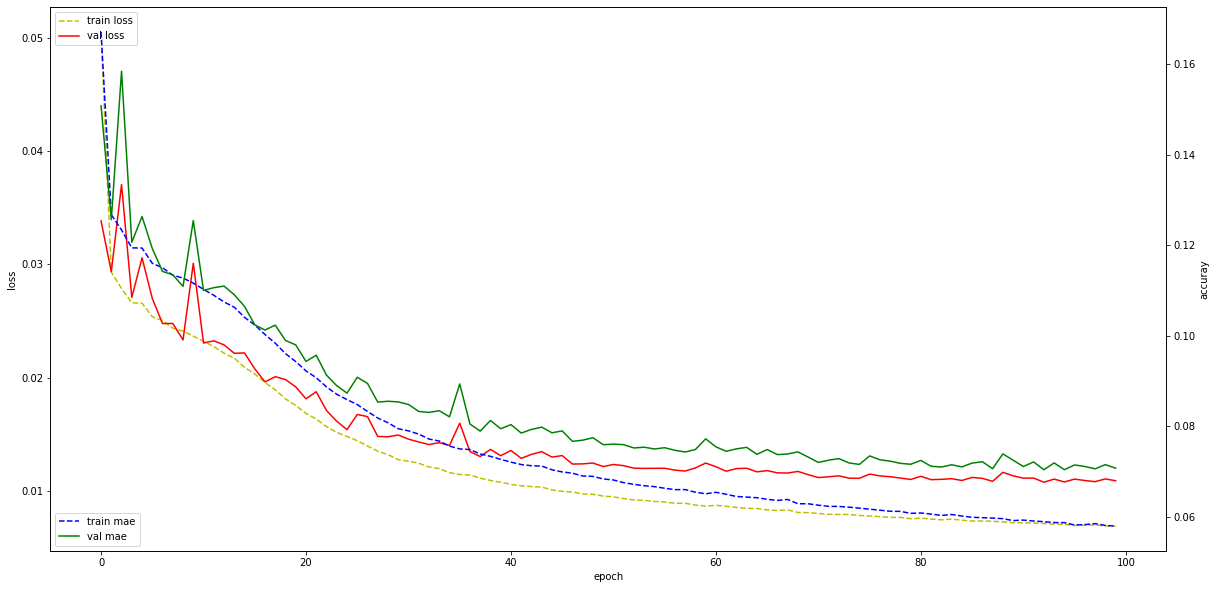

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(20,10))

#x-axis는 공유하지만 y-axis는 공유x
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', linestyle='dashed', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mean_absolute_error'], 'b', linestyle='dashed',label='train mae')
acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val mae')
#acc_ax.plot(hist.history[auc_key], 'b', linestyle='dashed',label='train auc')
#acc_ax.plot(hist.history['val_'+auc_key], 'g', label='val auc')



loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylim(0.2,1.0)
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### Model history plotting - Binary classification

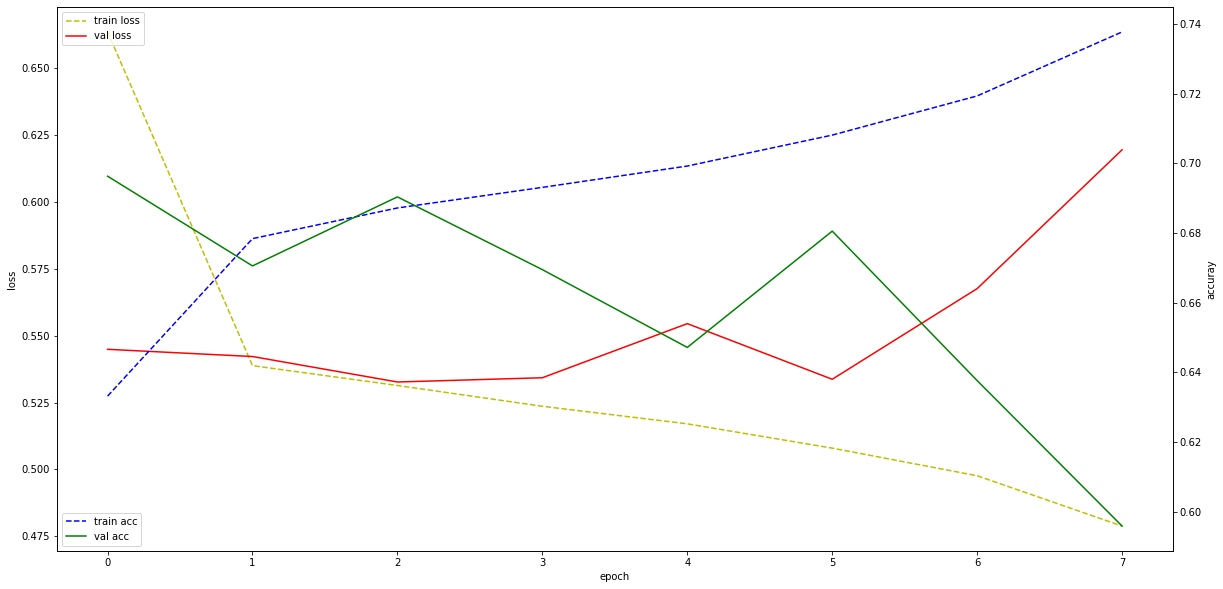

In [5]:
# model auroc 0.719짜리
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(20,10))

#x-axis는 공유하지만 y-axis는 공유x
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', linestyle='dashed', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

#acc_ax.plot(hist.history['mean_absolute_error'], 'b', linestyle='dashed',label='train mae')
#acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val mae')
acc_ax.plot(hist.history['acc'], 'b', linestyle='dashed',label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylim(0.2,1.0)
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [65]:
len(y_test)

19028

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


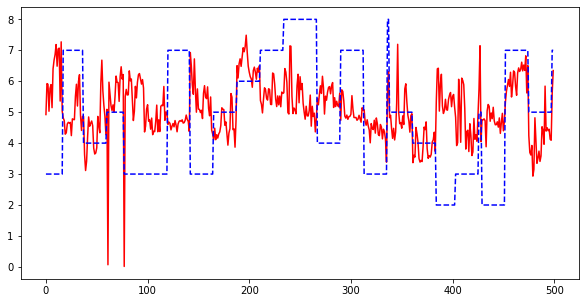

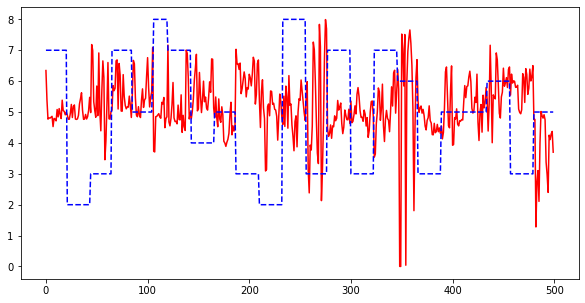

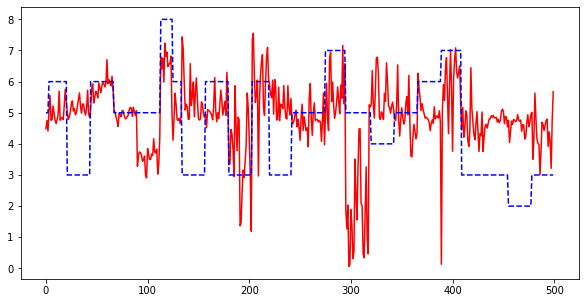

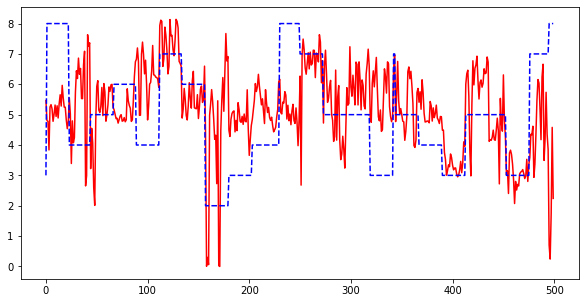

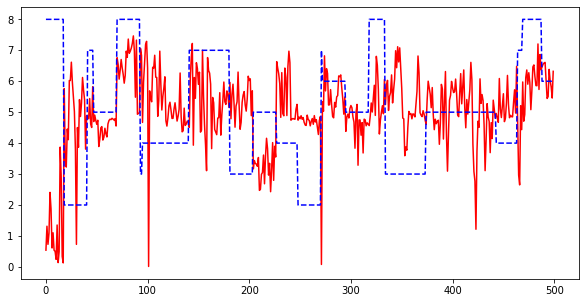

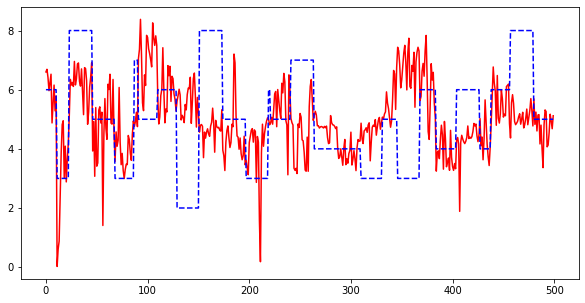

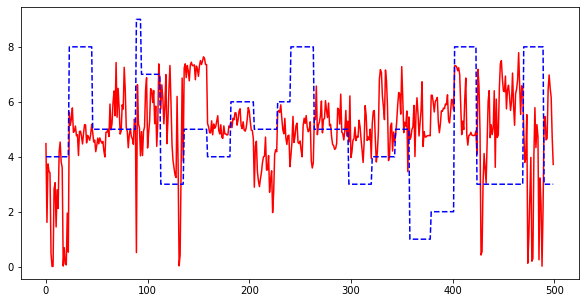

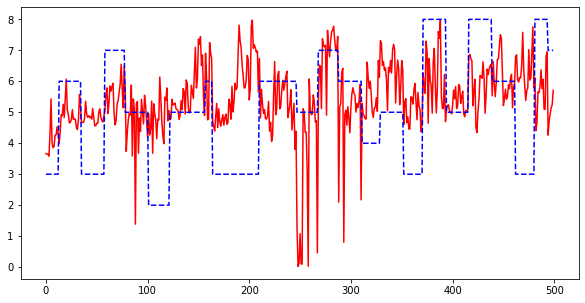

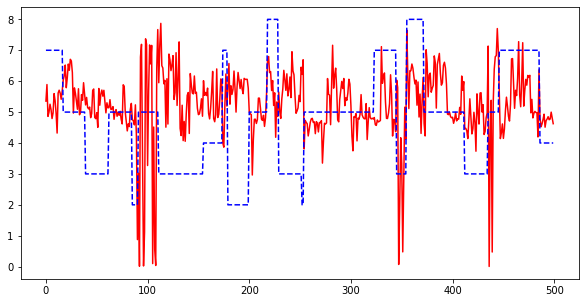

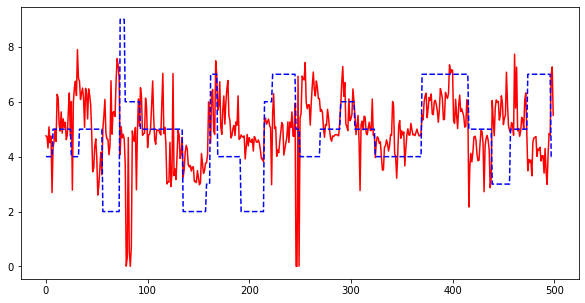

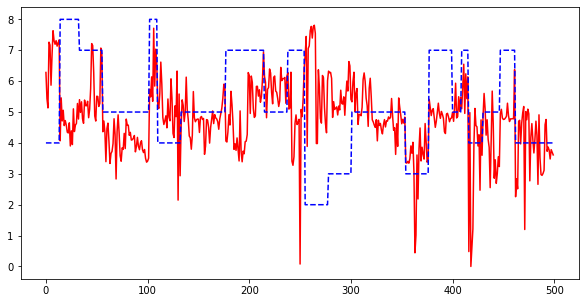

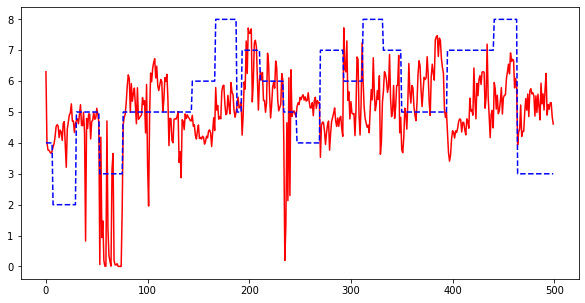

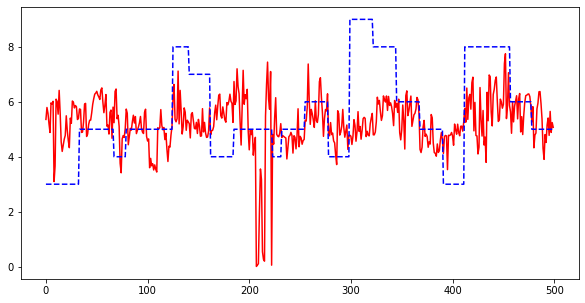

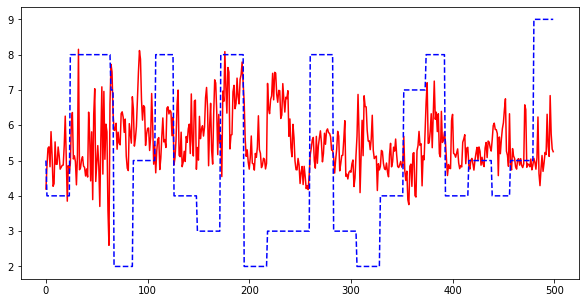

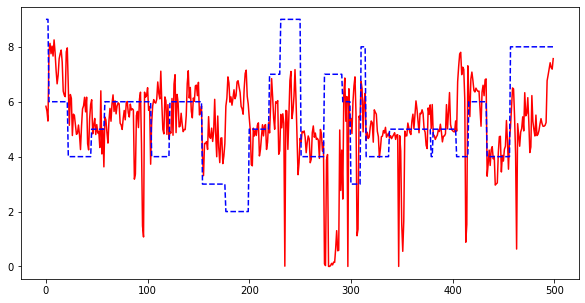

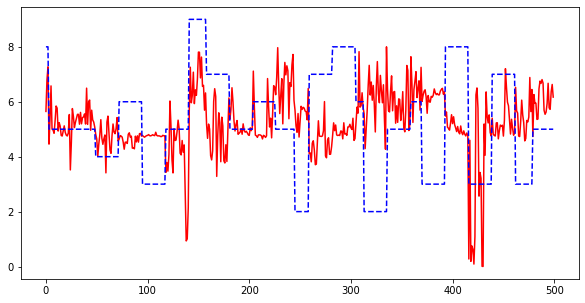

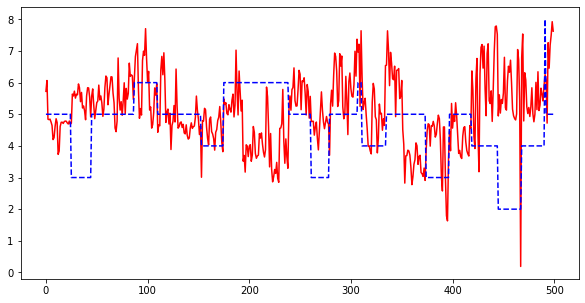

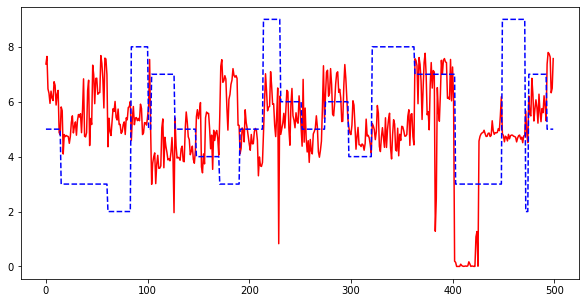

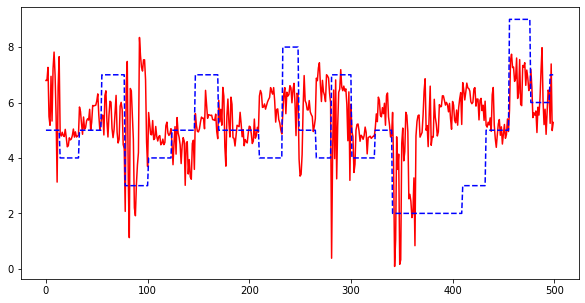

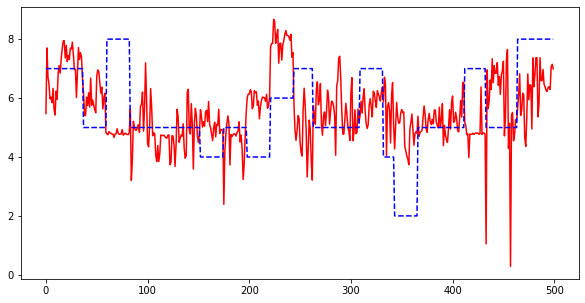

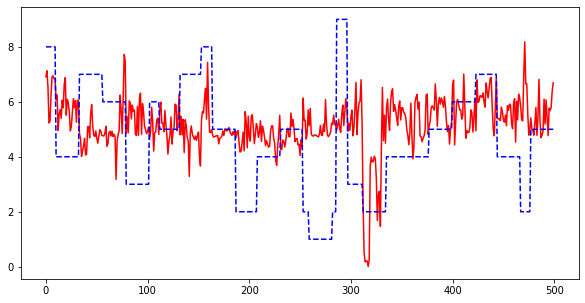

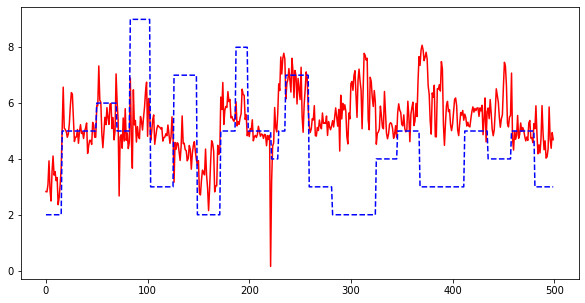

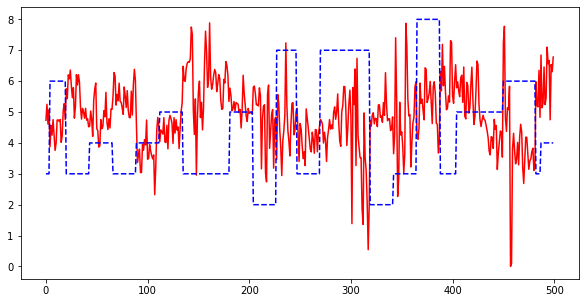

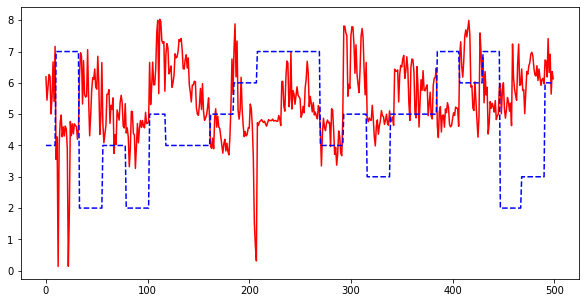

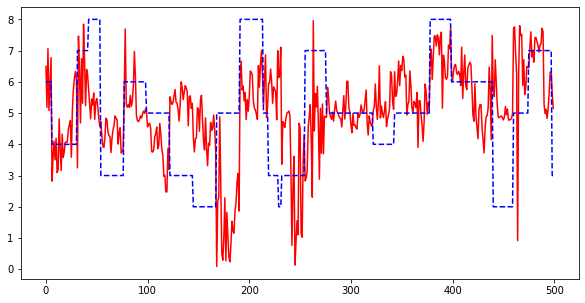

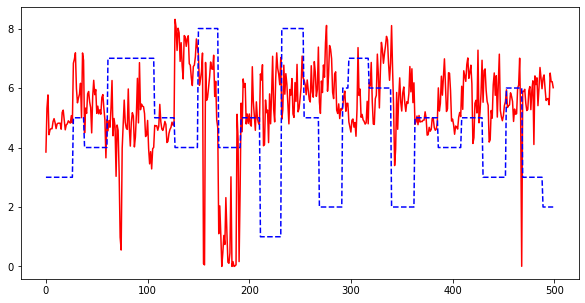

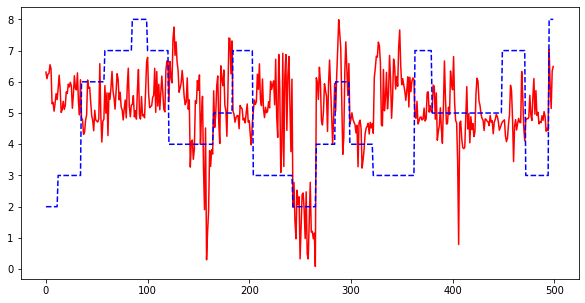

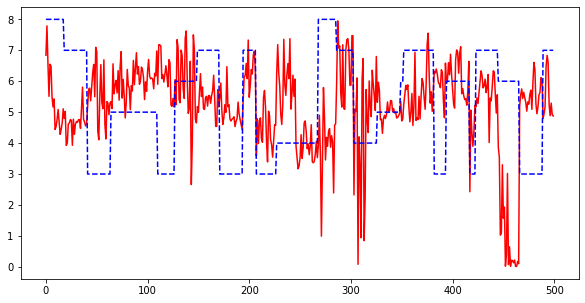

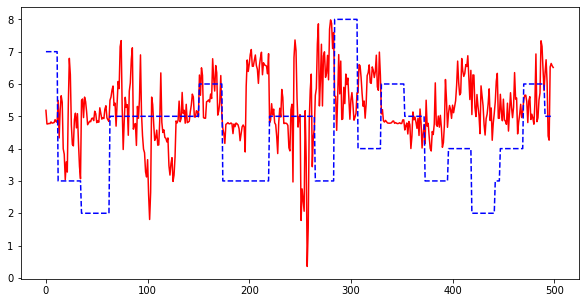

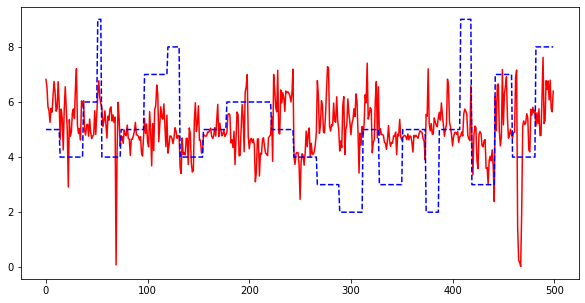

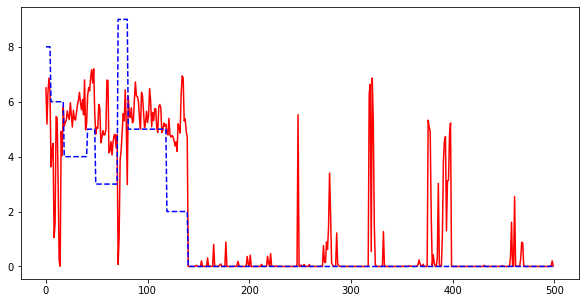

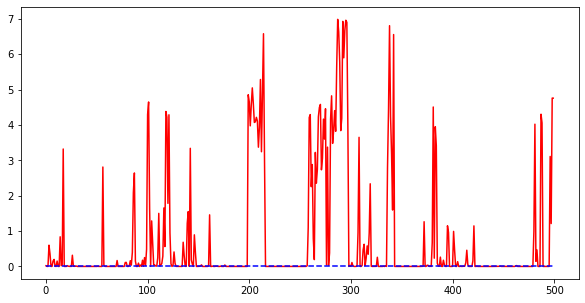

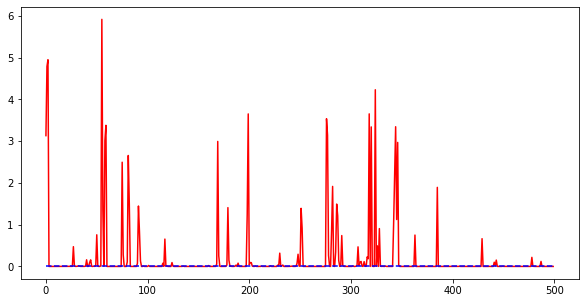

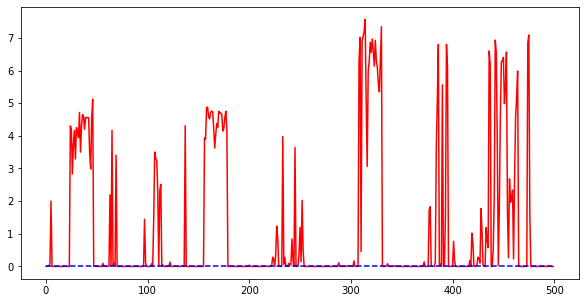

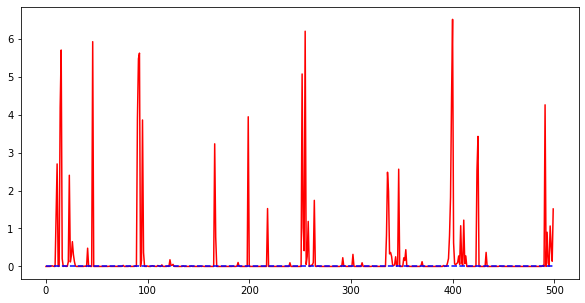

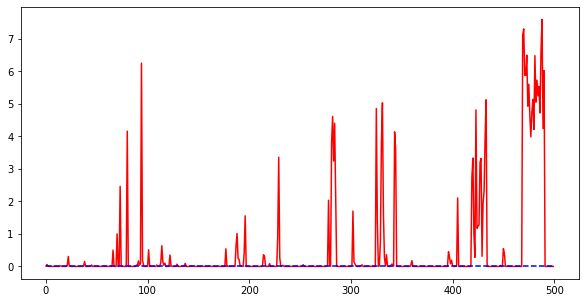

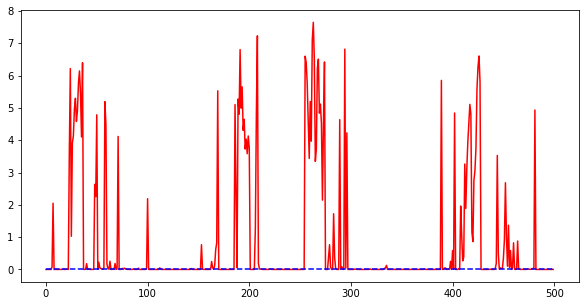

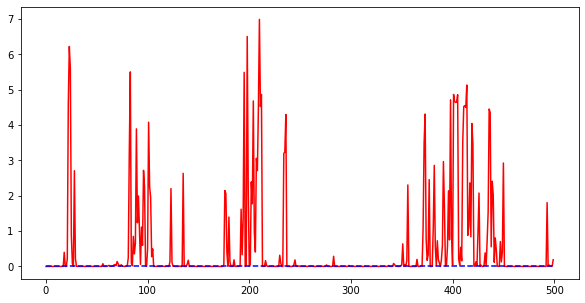

In [66]:
for i in range(int(len(y_test)/500)):
    plt.figure(figsize=(10,5))
    plt.plot(y_pred[i*500:(i+1)*500]*9, c = 'r')
    plt.plot(y_test[i*500:(i+1)*500], c = 'b', linestyle='dashed')

### Model Structure Visualization

In [121]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 991, 64)           1344      
_________________________________________________________________
batch_normalization_12 (Batc (None, 991, 64)           256       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 495, 64)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 486, 64)           41024     
_________________________________________________________________
batch_normalization_13 (Batc (None, 486, 64)           256       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 243, 64)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 234, 64)          

In [7]:
# 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
#tf.keras.utils.plot_model(model, to_file=save_path+'/plot_model', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


AttributeError: 'NoneType' object has no attribute 'create'

### 모델 이어서 학습시키기

In [10]:
from keras.models import model_from_json

#load_path = 'output/1D_CNN_model7'
load_path = save_path
load_weight_path = load_path+'/weights.hdf5'


# GPU 설정
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:2", "/gpu:3"])
with strategy.scope():
    # 저장한 모델 불러오기
    with open(save_path +"/model.json", 'r') as f_json:
        loaded_model_json = f_json.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(load_weight_path)
    
    # 불러온 모델 다시 학습시키기
    loaded_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.002), metrics=['accuracy', tf.keras.metrics.AUC()])
    hist_2 = loaded_model.fit(x_train, y_train_bin, validation_split=0.1, epochs=100, batch_size=BATCH_SIZE,# class_weight={0:1, 1:3}, 
                                callbacks=[ModelCheckpoint(monitor='val_loss', filepath=load_weight_path, verbose=1, save_best_only=True),
                                            EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


KeyError: "Unable to open object (object 'conv1d' doesn't exist)"

### 추가 학습시킨 모델 저장

In [28]:
#auc에 해당하는 이름이 조금씩 바뀜
for key in hist_2.history.keys():
    if 'auc' in key and not 'val' in key:
        auc = key
        
# 모델의 history 저장
pickle.dump((hist_2.history['loss'], hist_2.history['val_loss'], hist_2.history['accuracy'], hist_2.history['val_accuracy'], hist_2.history[auc], hist_2.history['val_'+auc]), open(load_path+'/history_epoch2', 'wb'))

# 모델의 아키텍처 및 구조 저장
open(load_path + "/model_epoch2.json", "wt").write(model.to_json())
model.load_weights(weight_path)

# 전체 test 샘플을 한번에 예측
y_pred = model.predict(x_test).flatten()

## Model Evaluation

test set auroc: 0.7003910066533907


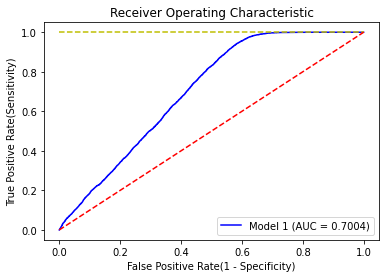

In [68]:
# Model Accuracy of test set
#print('test set accuracy:{:.2f}'.format(np.mean(y_pred>0.5==y_test_bin)))

# Model AUROC
from sklearn.metrics import roc_curve ,auc
from numpy import interp
#pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(solver='liblinear', penalty='12', random_state=1, C=100.0))

#cv = list(StratifiedKFold(n_splits=3, shuffle=True, random_state=1).split(x_))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_bin, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('test set auroc:', roc_auc)

plt.title('Receiver Operating Characteristic')
plt.xlabel("False Positive Rate(1 - Specificity)")
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model 1 (AUC = %0.4f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [82]:
train_result = model.evaluate(x=x_train, y=y_train_bin, batch_size=512, verbose=1, sample_weight=None, steps=None, callbacks=None)

340/340 [==============================] - 5s 14ms/step - loss: 0.5906 - accuracy: 0.6623 - auc_5: 0.7232


In [83]:
test_result = model.evaluate(x=x_test, y=y_test_bin, batch_size=512, verbose=1, sample_weight=None, steps=None, callbacks=None)

38/38 [==============================] - 0s 13ms/step - loss: 0.6004 - accuracy: 0.6497 - auc_5: 0.7115


## Plotting of model training

### Loading history

### Plotting history

#### Epoch 100 Plotting - Classification

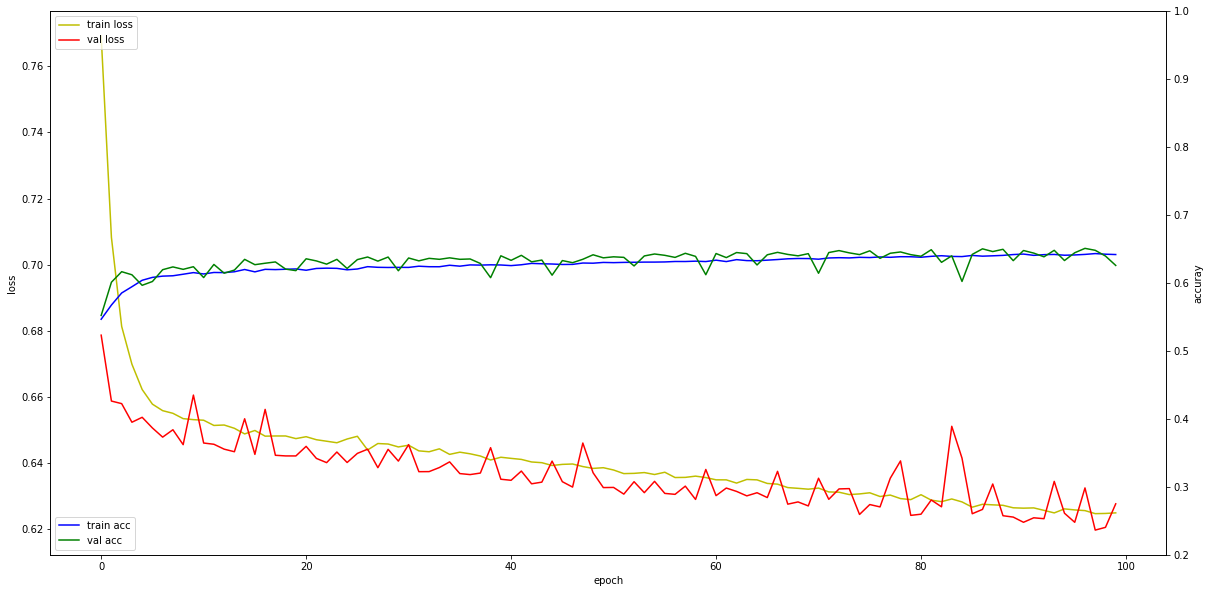

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(20,10))

#x-axis는 공유하지만 y-axis는 공유x
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylim(0.2,1.0)
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### Epoch 200 Plotting

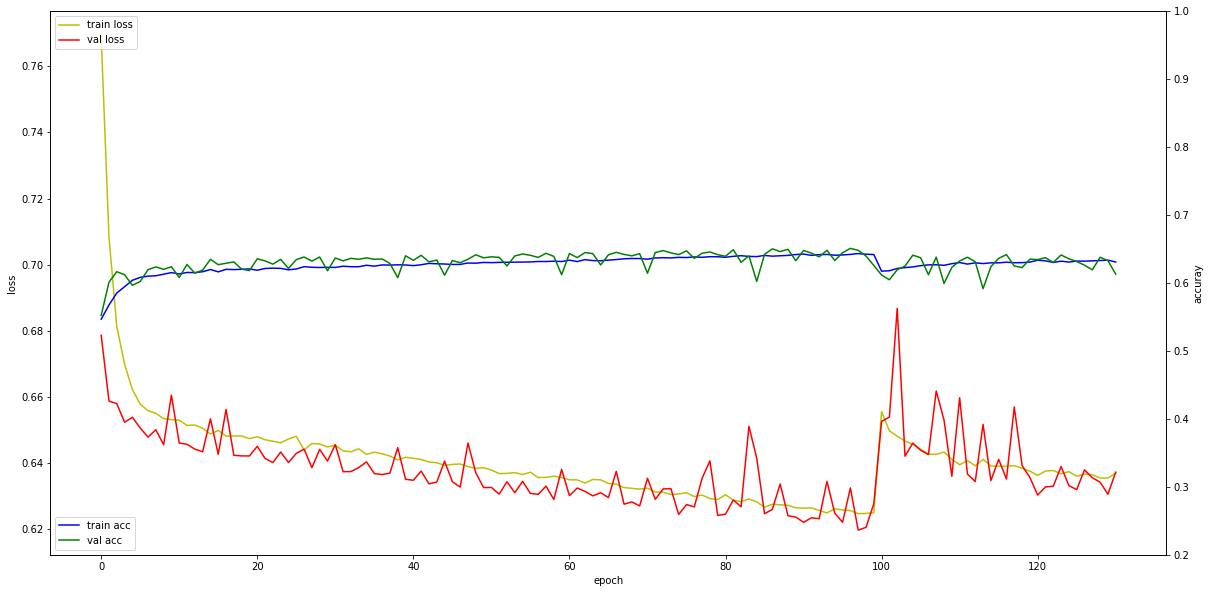

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(20,10))

#x-axis는 공유하지만 y-axis는 공유x
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss']+hist_2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss']+hist_2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy']+hist_2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy']+hist_2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylim(0.2,1.0)
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 저장된 모델 history plotting

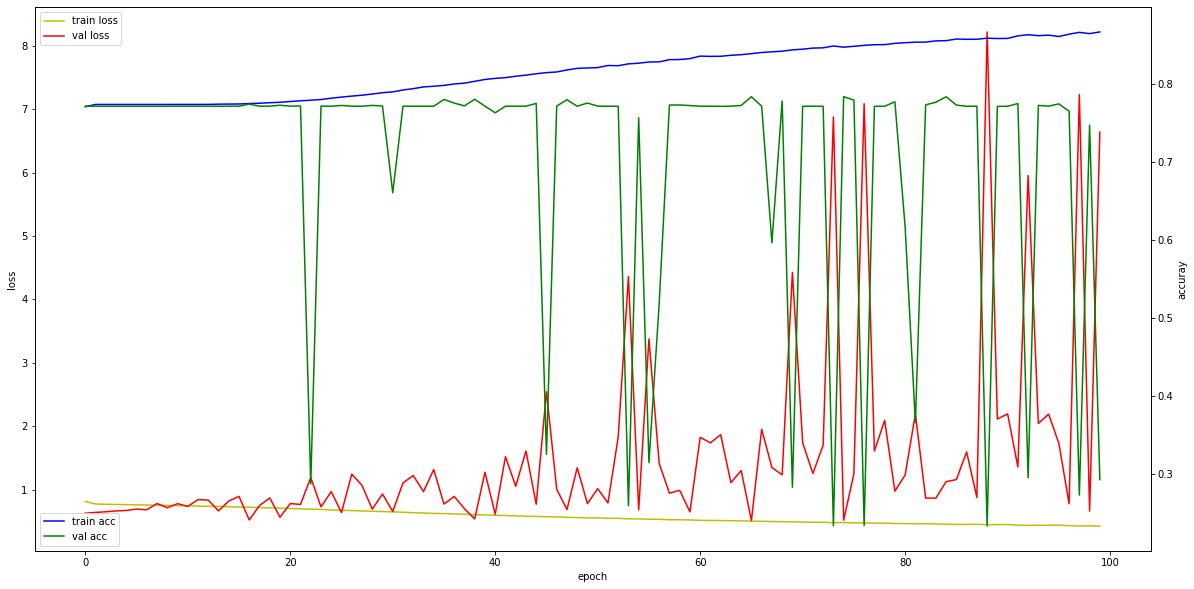

In [7]:
import pickle

cache_path = 'cache/model1_history'

if os.path.exists(cache_path):
    hist_loss, hist_val_loss, hist_acc, hist_val_acc, hist_auc, hist_val_auc = pickle.load(open(cache_path, 'rb'))
else:
    pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['accuracy'], hist.history['val_accuracy'], hist.history['auc'], hist.history['val_auc']), open(cache_path, 'wb'))

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(20,10))

#x-axis는 공유하지만 y-axis는 공유x
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_loss, 'y', label='train loss')
loss_ax.plot(hist_val_loss, 'r', label='val loss')

acc_ax.plot(hist_acc, 'b', label='train acc')
acc_ax.plot(hist_val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Best models

## 1D-CNN, input 1, 3conv layers

In [19]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


# hyperparamters
num_nodes = [512, 64, 128] #, 64, 64, 64]
kernel_size = [5, 15, 3]
pool_size = 2
BATCH_SIZE = 512
dense_node = 0
dropout_rate = 0.5
learning_rate = 0.001


testname = '-'.join([str(num_node) for num_node in num_nodes])
print(testname)

# 출력 폴더를 생성
model_name= 'model_reg_auc0.7339_c1nodes=512, c2nodes=64, c3nodes=128, c1filts=5, c2filts=15, c3filts=3, dnodes=0, dropout=0.5, conv_act=True_rmse4.2286_acc0.65'


#model_name = 'model_reg_{}_{}_{}_size{}_relu_bn_maxpool{}_globalmaxpool_dense32_dropout{}_batch{}_learning_rate{}'.format(num_nodes[0], num_nodes[1], num_nodes[2], kernel_size, pool_size, dropout_rate, BATCH_SIZE, learning_rate)
save_path = "best_model/1D_CNN_"+model_name

if not os.path.exists(save_path):
    os.mkdir(save_path)
weight_path = save_path + "/weights.hdf5"


# GPU 설정
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:2","/gpu:3"])
with strategy.scope():

    # build a model
    model = Sequential()

    # conv 1 layer
    model.add(Conv1D(filters=num_nodes[0], kernel_size=kernel_size[0], padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=pool_size))

    # conv 2 layer
    model.add(Conv1D(filters=num_nodes[1], kernel_size=kernel_size[1], padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=pool_size))

    model.add(GlobalMaxPool1D())

    if dense_node != 0:
        model.add(Dense(dense_node, activation='sigmoid'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))


    # model 학습 설정
    model.compile(loss='mse', optimizer=Adam(lr=learning_rate), metrics=["mean_absolute_error"])
    hist = model.fit(x_train, y_train/10, validation_split=0.1, epochs=100, batch_size=BATCH_SIZE, #class_weight={0:1, 1:3}, 
                            callbacks=[ModelCheckpoint(monitor='val_loss', filepath=weight_path, verbose=1, save_best_only=True),
                                        EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])

    #tf.keras.backend.clear_session()

model.load_weights(weight_path)
    
# 모델의 아키텍처 및 구조 저장
open(save_path + "/model.json", "wt").write(model.to_json())

# 전체 test 샘플을 한번에 예측
y_pred = model.predict(x_test).flatten()

# 결과를 저장
#np.savetxt(save_path+'/pred_y.txt', y_pred)


# 모델의 history log 저장 - binary classification
for key in hist.history.keys():
    if 'auc' in key and not 'val' in key:
        auc_key = key
#pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['accuracy'], hist.history['val_accuracy'], hist.history[auc], hist.history['val_'+auc]), open(save_path+'/history', 'wb'))

# 모델의 history log 저장 - regression
pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['mean_absolute_error'], hist.history['val_mean_absolute_error'], hist.history[auc_key], hist.history['val_'+auc_key]), open(save_path+'/history', 'wb'))


512-64-128
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Epoch 1/100
INFO:tensorflow:batch_all_reduce: 10 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 10 all-reduces with algorithm = nccl, num_packs = 1
305/306 [============================>.] - ETA: 0s - loss: 0.1321 - mean_absolute_error: 0.2933 - auc_3: 0.5725
Epoch 00001: val_loss improved from inf to 0.06439, saving model to best_model/1D_CNN_model_reg_auc0.7339_c1nodes=512, c2nodes=64, c3nodes=128, c1filts=5, c2filts=15, c3filts=3, dnodes=0, dropout=0.5, conv_act=True_rmse4.2286_acc0.65/weights.hdf5
306/306 [==============================] - 20s 66ms/step - loss: 0.1321 - mean_absolute_error: 0.2933 - auc_3: 0.5725 - val_loss: 0.0644 - val_mean_absolute_error: 0.2068 - val_auc_3: 0.7229
Epoch 2/100
305/306 [============================>.] - ETA: 0s - loss: 0.0611 - mean_absolute_error: 0.203

305/306 [============================>.] - ETA: 0s - loss: 0.0428 - mean_absolute_error: 0.1603 - auc_3: 0.9360
Epoch 00017: val_loss did not improve from 0.03997
306/306 [==============================] - 18s 58ms/step - loss: 0.0429 - mean_absolute_error: 0.1603 - auc_3: 0.9360 - val_loss: 0.0442 - val_mean_absolute_error: 0.1696 - val_auc_3: 0.9447
Epoch 18/100
305/306 [============================>.] - ETA: 0s - loss: 0.0422 - mean_absolute_error: 0.1589 - auc_3: 0.9392
Epoch 00018: val_loss did not improve from 0.03997
306/306 [==============================] - 18s 59ms/step - loss: 0.0422 - mean_absolute_error: 0.1589 - auc_3: 0.9391 - val_loss: 0.0419 - val_mean_absolute_error: 0.1652 - val_auc_3: 0.9552
Epoch 19/100
305/306 [============================>.] - ETA: 0s - loss: 0.0422 - mean_absolute_error: 0.1591 - auc_3: 0.9405
Epoch 00019: val_loss did not improve from 0.03997
306/306 [==============================] - 18s 58ms/step - loss: 0.0422 - mean_absolute_error: 0.1591 -

Epoch 36/100
305/306 [============================>.] - ETA: 0s - loss: 0.0358 - mean_absolute_error: 0.1457 - auc_3: 0.9665
Epoch 00036: val_loss did not improve from 0.03611
306/306 [==============================] - 18s 58ms/step - loss: 0.0358 - mean_absolute_error: 0.1457 - auc_3: 0.9665 - val_loss: 0.0395 - val_mean_absolute_error: 0.1585 - val_auc_3: 0.9597
Epoch 37/100
305/306 [============================>.] - ETA: 0s - loss: 0.0361 - mean_absolute_error: 0.1464 - auc_3: 0.9664
Epoch 00037: val_loss did not improve from 0.03611
306/306 [==============================] - 18s 58ms/step - loss: 0.0361 - mean_absolute_error: 0.1464 - auc_3: 0.9664 - val_loss: 0.0369 - val_mean_absolute_error: 0.1539 - val_auc_3: 0.9710
Epoch 38/100
305/306 [============================>.] - ETA: 0s - loss: 0.0353 - mean_absolute_error: 0.1443 - auc_3: 0.9685
Epoch 00038: val_loss improved from 0.03611 to 0.03398, saving model to best_model/1D_CNN_model_reg_auc0.7339_c1nodes=512, c2nodes=64, c3node

Epoch 75/100
305/306 [============================>.] - ETA: 0s - loss: 0.0308 - mean_absolute_error: 0.1336 - auc_3: 0.9765
Epoch 00075: val_loss did not improve from 0.02936
306/306 [==============================] - 18s 58ms/step - loss: 0.0308 - mean_absolute_error: 0.1336 - auc_3: 0.9765 - val_loss: 0.0322 - val_mean_absolute_error: 0.1370 - val_auc_3: 0.9783
Epoch 76/100
305/306 [============================>.] - ETA: 0s - loss: 0.0305 - mean_absolute_error: 0.1327 - auc_3: 0.9770
Epoch 00076: val_loss did not improve from 0.02936
306/306 [==============================] - 18s 58ms/step - loss: 0.0305 - mean_absolute_error: 0.1327 - auc_3: 0.9770 - val_loss: 0.0297 - val_mean_absolute_error: 0.1319 - val_auc_3: 0.9797
Epoch 77/100
305/306 [============================>.] - ETA: 0s - loss: 0.0309 - mean_absolute_error: 0.1337 - auc_3: 0.9760
Epoch 00077: val_loss did not improve from 0.02936
306/306 [==============================] - 18s 58ms/step - loss: 0.0309 - mean_absolute_er

### Evaluation

In [20]:
from sklearn.metrics import roc_curve, auc, r2_score
from numpy import interp
from keras import losses, metrics
import keras.backend as K

### Classification
# Model Accuracy of test set
#model_y = np.where(y_pred<0.5,0,1)
#print('test set accuracy:{:.2f}'.format(np.mean(model_y==y_test_bin)))

### Regression
# Model MSE of test set
#mse_val = K.eval(losses.mean_squared_error(y_test, y_pred))
model_err = metrics.RootMeanSquaredError()
model_err.update_state(y_test, y_pred)
rmse_val = model_err.result().numpy()
acc_val = np.mean((y_pred*9>=5)==y_test_bin)
print('test set mse:{:.2f}'.format(rmse_val))
print('test set accuracy:{:.2f}'.format(acc_val))


# Model AUROC
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_bin, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('test set auroc:', roc_auc)

# Model R_square
#print('test set R2:', r2_score(y_test, y_pred*9))


# Adding evaluation results to file name
# classification
#os.rename(save_path, save_path+'_auc{:.4f}_acc{:.4f}'.format(roc_auc,np.mean(model_y==y_test_bin)))

# regression
os.rename(save_path, save_path+'_auc{:.4f}_rmse{:.4f}_acc{:.2f}'.format(roc_auc,rmse_val,acc_val))

test set mse:4.32
test set accuracy:0.58
test set auroc: 0.7351159682675314


### Plot training

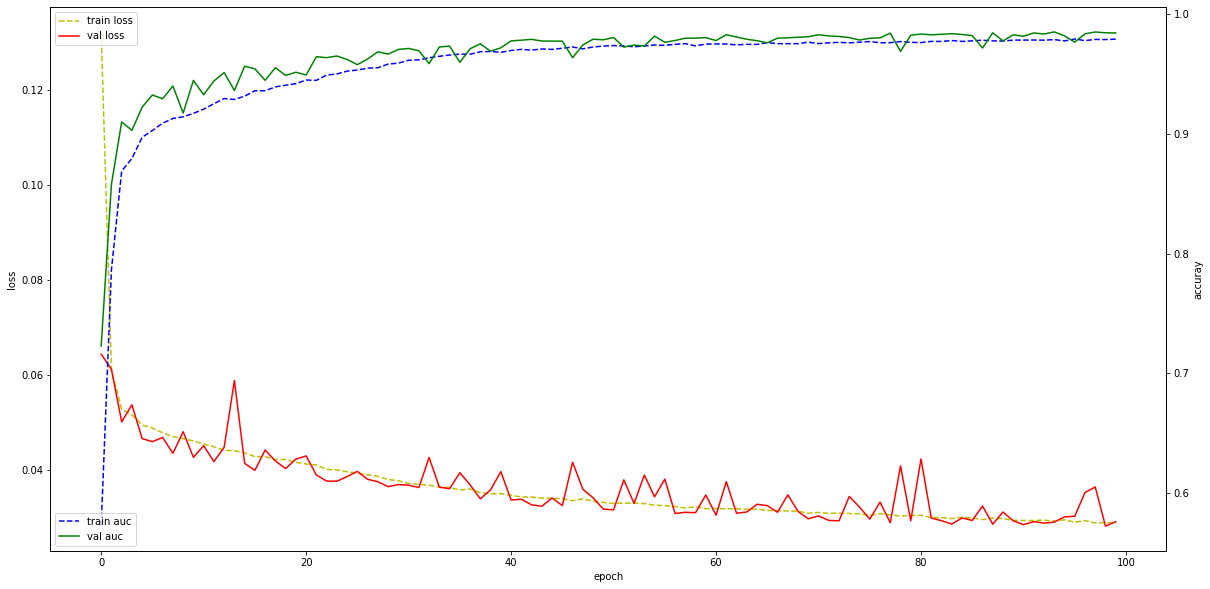

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(20,10))

#x-axis는 공유하지만 y-axis는 공유x
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', linestyle='dashed', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

#acc_ax.plot(hist.history['mean_absolute_error'], 'b', linestyle='dashed',label='train mae')
#acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val mae')
acc_ax.plot(hist.history[auc_key], 'b', linestyle='dashed',label='train auc')
acc_ax.plot(hist.history['val_'+auc_key], 'g', label='val auc')



loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylim(0.2,1.0)
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# GPU Handle

In [8]:
!nvidia-smi

Fri Nov 27 04:26:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  On   | 00000000:07:00.0  On |                    0 |
| N/A   43C    P0    50W / 300W |  32492MiB / 32505MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  On   | 00000000:08:00.0 Off |                    0 |
| N/A   

In [15]:
from numba import cuda
#device = cuda.get_current_device()
cuda.cudadrv.devices.reset()

In [9]:
!nvidia-smi

Fri Nov 27 07:38:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  On   | 00000000:07:00.0  On |                    0 |
| N/A   45C    P0    50W / 300W |  31895MiB / 32505MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  On   | 00000000:08:00.0 Off |                    0 |
| N/A   

In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#config = tf.compat.v1.ConfigProto(allow_soft_placement=True)

# tf v1 version
#config = tf.ConfigProto()
#tf.config.gpu_options.per_process_gpu_memory_fraction = 0.5
#tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

tf.config.gpu.set_per_process_memory_fraction(0.5)
tf.config.gpu.set_per_process_memory_growth(True)

Num GPUs Available:  4


AttributeError: module 'tensorflow._api.v2.compat.v1.config' has no attribute 'gpu_options'

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
# cudnn 버전 확인 8.0.4
!cat /usr/include/x86_64-linux-gnu/cudnn_v*.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 8
#define CUDNN_MINOR 0
#define CUDNN_PATCHLEVEL 4
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#endif /* CUDNN_VERSION_H */


In [11]:
!cat /etc/issue

Ubuntu 18.04.5 LTS \n \l



In [10]:
import tensorflow as tf

# cuda로 빌드되는지 확인
print(tf.test.is_built_with_cuda())

# cuda와 같은 gpu로 빌드되는지 확인
print(tf.test.is_built_with_gpu_support())

# 사용가능한 gpu 출력
tf.test.gpu_device_name()

True
True


'/device:GPU:0'

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        # 런타임에서 필요한 양만큼의 GPU 메모리 할당을 허용
        #tf.config.experimental.set_memory_growth(gpus[0], True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

Virtual devices cannot be modified after being initialized


In [13]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
tf.keras.backend.set_session(tf.Session(config=config));

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [14]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

RuntimeError: Physical devices cannot be modified after being initialized

In [15]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]